In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Introduction

**The flight dataset**

**Flight delays are inevitable. The data provided by the United States department of transportation tell us that 80% of flights are ontime and 20% are delayed. However there is a 15 minutes rule for being ontime: In the U.S. ontime is counted as any departure/arrival up to 15 minutes of the scheduled time. I choose 3 years to compare general data like arrival delay, departure delay , airlines etc. One year in the 90ies and 2004 and 2008 to see if there where any changes in this 10 year period for this variables. To make a brief comparison between the reasons for the delays (airline, wheather, late incoming aircraft etc.) I just used 2004 and 2008 data as these variables were not recorded in 1998. I want to explore whether there were changes in delays between airlines, years, airports etc and reasons for delays. Furthermore I want to explore the impact of the 15 minutes rule on delay times and statistics for airports and airlines.**



## Gather Data

In [2]:
# create data frames from csv files
df_2008 = pd.read_csv('2008.csv')

In [3]:
# create data frames from csv files
df_1998 = pd.read_csv('1998.csv')

In [4]:
# create data frames from csv files
df_2004 = pd.read_csv('2004.csv')

## Assess Data

In [5]:
# inspect data
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
# inspect data
df_1998.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715.0,715,840.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715.0,715,830.0,840,WN,76,...,2,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715.0,715,831.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715.0,715,836.0,840,WN,76,...,3,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715.0,715,836.0,840,WN,76,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
# inspect data
df_2004.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [8]:
# inspect data
df_1998.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384721 entries, 0 to 5384720
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     float64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(13), int64(12), object(4)
memory usage: 1.2+ GB


In [9]:
# inspect data
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(6), int64(18), object(5)
memory usage: 1.5+ GB


In [10]:
# inspect data
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


**Observations**

- 2004 CRSElapsedTime int => float
- 2008 TaxiIn float => int
- 2008 TaxiOut float => int
- 1998 Cancellation Code float => object
- 2004 Carrier Delay int => float
- 2004 Weather Delay int => float
- 2004 NASDelay int => float
- 2004 SecurityDelay int => float
- 2004 LateAircraft Delay int => float

In [11]:
# inspect data
df_1998.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               144509
CRSDepTime                 0
ArrTime               157670
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     157670
CRSElapsedTime          2386
AirTime               157670
ArrDelay              157670
DepDelay              144509
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5384721
Diverted                   0
CarrierDelay         5384721
WeatherDelay         5384721
NASDelay             5384721
SecurityDelay        5384721
LateAircraftDelay    5384721
dtype: int64

In [12]:
# inspect data
df_2004.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               127757
CRSDepTime                 0
ArrTime               141541
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                  127
ActualElapsedTime     141541
CRSElapsedTime             0
AirTime               141541
ArrDelay              141541
DepDelay              127757
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7001506
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [13]:
# inspect data
df_2008.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [14]:
# inspect data
df_1998['CancellationCode'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CancellationCode, dtype: float64

**Observations**

- Delete column Departure Time too many NaN values and variable not needed
- Delete column Arrival Time too many Nan values and variable not needed
- Delete column ActualElapsedTime too many NaN values and variable not needed
- Delete column CRSElapsedTime variable not needed
- Delete column Cancellation Code too many NaN values and variable not needed
- 2008 Fillna Delay columns


## Clean Data

- 2008 TaxiIn float => int
- 2008 TaxiOut float => int
- 2004 Carrier Delay int => float
- 2004 Weather Delay int => float
- 2004 NASDelay int => float
- 2004 SecurityDelay int => float
- 2004 LateAircraft Delay int => float
- Delete column Departure Time too many NaN values and variable not needed
- Delete column Arrival Time too many Nan values and variable not needed
- Delete column ActualElapsedTime too many NaN values and variable not needed
- Delete column CRSElapsedTime variable not needed
- Delete column Cancellation Code too many NaN values and variable not needed
- 2008 Fillna Delay columns

**Define**

**Delete 5 columns from each of the 3 data frames**

**Code**

In [15]:
# drop columns from single data frames
df_1998.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

In [16]:
# drop columns from single data frames
df_2004.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

In [17]:
# drop columns from single data frames
df_2008.drop(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode' ], axis=1, inplace=True)

**Test**

In [18]:
# inspect data
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1955,2225,WN,335,N712SW,116.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,735,1000,WN,3231,N772SW,113.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,620,750,WN,448,N428WN,76.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,930,1100,WN,1746,N612SW,78.0,...,515,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1755,1925,WN,3920,N464WN,77.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0


**Define**

**Drop NaN and cast values for specified columns in specified dataframes**

**Code**

In [19]:
# change dtype 2008 TaxiIn step 1
df_2008.dropna(subset = ['TaxiIn'], inplace=True)

In [20]:
# change dtype 2008 TaxiIn step 2
df_2008['TaxiIn'] = df_2008['TaxiIn'].astype(int, inplace=True)

**Test**

In [21]:
# inspect data
df_2008.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
CRSDepTime                 0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
AirTime                 3050
ArrDelay                3050
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay         5333344
WeatherDelay         5333344
NASDelay             5333344
SecurityDelay        5333344
LateAircraftDelay    5333344
dtype: int64

**Code**

In [22]:
# change dtype 2008 TaxiOut step1
df_2008.dropna(subset = ['TaxiOut'], inplace=True)

In [23]:
# change dtype 2008 TaxiOut step 2
df_2008['TaxiOut'] = df_2008['TaxiOut'].astype(int, inplace=True)

**Test**

In [24]:
# inspect data
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858079 entries, 0 to 7009727
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(8), int64(12), object(4)
memory usage: 1.3+ GB


**Code**

In [25]:
# cast values of 2004 delay columns to float
df_2004[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']] = df_2004[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].astype(float, inplace=True)

**Test**

In [26]:
# inspect data
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 24 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(8), int64(12), object(4)
memory usage: 1.3+ GB


**Define**

**Fillna in delay columns in 2008 dataframe**

**Code**

In [27]:
# fillna delay columns with 0
values = {'CarrierDelay': 0, 'WeatherDelay': 0, 'NASDelay' : 0, 'SecurityDelay' : 0, 'LateAircraftDelay' : 0}
df_2008.fillna(value=values, inplace=True)

**Test**

In [28]:
# NaN values in data frame 2008
df_2008.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
CRSDepTime              0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
AirTime              3050
ArrDelay             3050
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [29]:
# NaN values in data frame 2004
df_2004.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                 127
AirTime              141541
ArrDelay             141541
DepDelay             127757
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

In [30]:
# NaN values in data frame 1998
df_1998.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
CRSDepTime                 0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
AirTime               157670
ArrDelay              157670
DepDelay              144509
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay         5384721
WeatherDelay         5384721
NASDelay             5384721
SecurityDelay        5384721
LateAircraftDelay    5384721
dtype: int64

**Define**

**Concatenate Dataframes and drop NaN values except delay columns 1998**

**Code**

In [31]:
# concat cleaned data frames
df_cct = pd.concat([df_1998, df_2004, df_2008], ignore_index=True)

**Test**

In [32]:
# inspect data
df_cct.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715,840,WN,76,N520,137.0,...,872,3,5,0,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715,840,WN,76,N302,127.0,...,872,2,6,0,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715,840,WN,76,N315,128.0,...,872,3,5,0,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715,840,WN,76,N372,126.0,...,872,3,12,0,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715,840,WN,76,N367,132.0,...,872,3,6,0,0,NaN,NaN,NaN,NaN,NaN


In [33]:
# inspect data
df_cct.tail()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
19372065,2008,12,13,6,959,1150,DL,1636,N646DL,71.0,...,533,6,45,0,0,0.0,0.0,0.0,0.0,0.0
19372066,2008,12,13,6,835,1023,DL,1637,N908DL,139.0,...,874,5,23,0,0,0.0,0.0,0.0,0.0,0.0
19372067,2008,12,13,6,700,856,DL,1638,N671DN,85.0,...,545,24,12,0,0,0.0,0.0,0.0,0.0,0.0
19372068,2008,12,13,6,1240,1437,DL,1639,N646DL,89.0,...,533,13,13,0,0,0.0,0.0,0.0,0.0,0.0
19372069,2008,12,13,6,1103,1418,DL,1641,N908DL,104.0,...,874,8,11,0,0,0.0,0.0,0.0,0.0,0.0


In [34]:
# inspect data
df_cct.shape

(19372070, 24)

**Code**

In [35]:
# drop NaN values except for delay columns
df_cct.dropna(subset = ['TailNum', 'AirTime', 'ArrDelay', 'DepDelay'], inplace=True)

**Test**

In [36]:
# inspect data
df_cct.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
CRSDepTime                 0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay         5227051
WeatherDelay         5227051
NASDelay             5227051
SecurityDelay        5227051
LateAircraftDelay    5227051
dtype: int64

**Define**

**Check once again variables of interest**

**Code**

In [37]:
# inspect ArrDelay
df_cct['ArrDelay'].describe()

count    1.906980e+07
mean     7.400637e+00
std      3.478037e+01
min     -1.302000e+03
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [38]:
# inspect DepDelay
df_cct['DepDelay'].describe()

count    1.906980e+07
mean     8.905173e+00
std      3.211515e+01
min     -1.197000e+03
25%     -3.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      2.467000e+03
Name: DepDelay, dtype: float64

In [39]:
# inspect Distance
df_cct['Distance'].describe()

count    1.906980e+07
mean     7.272035e+02
std      5.655852e+02
min      8.000000e+00
25%      3.210000e+02
50%      5.700000e+02
75%      9.540000e+02
max      4.962000e+03
Name: Distance, dtype: float64

In [40]:
# inspect AirTime
df_cct['AirTime'].describe()

count    1.906980e+07
mean     1.030623e+02
std      7.390308e+01
min     -3.818000e+03
25%      5.400000e+01
50%      8.500000e+01
75%      1.330000e+02
max      1.936000e+03
Name: AirTime, dtype: float64

In [41]:
# inspect TaxiIn
df_cct['TaxiIn'].describe()

count    1.906980e+07
mean     6.972128e+00
std      2.830882e+01
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.473000e+03
Name: TaxiIn, dtype: float64

In [42]:
# inspect TaxiOut
df_cct['TaxiOut'].describe()

count    1.906980e+07
mean     1.583914e+01
std      1.254155e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.800000e+01
max      3.905000e+03
Name: TaxiOut, dtype: float64

In [43]:
# inspect Cancelled
df_cct['Cancelled'].unique()

array([0])

In [44]:
# inspect Diverted
df_cct['Diverted'].unique()

array([0])

**Observations**

- Cancelled column does not convey any information - delete
- Diverted column does not convey any information - delete
- Taxi Out analyze thoroughly neither 0 nor 3905 seem reasonable
- Taxi In analyze thoroughly neither 0 nor 1473 seem reasonable
- Air Time has negative numbers and a max of 30 hours plus for distances of max 4962 miles - delete
- Distance analyze thoroughly because 8 miles seem unreasonable for flights
- DepDelay analyze thoroughly because of extreme negative and positive values
- ArrDelay analyze thoroughly because of extreme negative and positive values

**Define**

**Delete columns AirTime, Cancelled and Diverted**

In [45]:
# delete not needed columns
df_cct.drop(['AirTime', 'Cancelled', 'Diverted'], axis=1, inplace=True)

**Test**

In [46]:
# inspect data
df_cct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19069804 entries, 0 to 19372069
Data columns (total 21 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(7), int64(10), object(4)
memory usage: 3.1+ GB


## EDA

**Analysis**

**Univariate Analysis**
- 1)  Explore arrival delay Data
- 2)  Explore departure delay data
- 3)  Explore distance data
- 4)  Explore taxi in data
- 5)  Explore taxi out data
- 6)  Explore day of week data
- 7)  Explore month data
- 8)  Explore unique carrier data
- 9)  Explore origin data
- 10) Explore destination data
- 11) Explore carrier delay
- 12) Explore Weather delay
- 13) Explore NAS delay
- 14) Explore Security delay
- 15) Explore Late aircraft delay

**Bivariate Analysis**
- 16) Month and departure delay and arrival delay
- 17) Day of week and departure delay and arrival delay
- 18) Unique carrier and departure delay and arrival delay
- 19) Origin and departure delay
- 20) Destination and arrival delay
- 21) Distance and arrival delay and departure delay
- 22) Distance and Unique carrier
- 23) Year and arrival and departure delay
- 24) Year and Carrier delay
- 25) Year and Late aircraft delay
- 26) Year and weather delay
- 27) Unique carrier and carrier delay
- 28) Unique carrier and late aircraft delay
- 29) Unique carrier and weather dealy
- 30) Unique carrier and percentage of flights delayed
- 31) Origin airport and percentage of flights delayed

**Multivariate Analysis**
- 32) Origin airport - unique carrier - departure delay
- 33) Unique carrier - distance range - arrival delay
- 34) Unique carrier - number of flights - arrival delay
- 35) Unique carrier - delayed - arrival delay


### Univariate Analysis

### 1) Explore Arrival Delay data

In [47]:
# descriptive statistics of data 
df_cct['ArrDelay'].describe()

count    1.906980e+07
mean     7.400637e+00
std      3.478037e+01
min     -1.302000e+03
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

**Discussion**

**Data spread out over a wide range. An early arrival of more than 20 hours seems unlikely. Also a delay of 40 hours does not fell like a "normal" delay but more like a cancellation. Let's see if we will skip these outliers.**

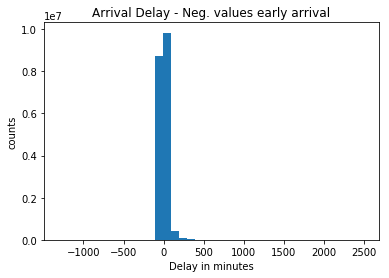

In [48]:
# draw histogram of data
bin_edges = np.arange(df_cct['ArrDelay'].min(), df_cct['ArrDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='ArrDelay', bins=bin_edges);
plt.xlabel('Delay in minutes')
plt.ylabel('counts')
plt.title('Arrival Delay - Neg. values early arrival');

**Discussion**

**To visualize all the data I will log  the y axis as there is an enormous span within the bins between just a few and million datapoints**

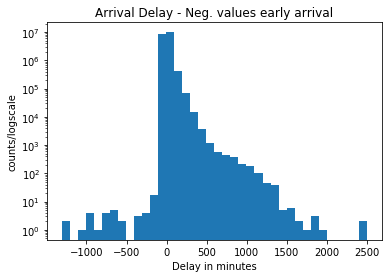

In [49]:
# log scale y axis to get better visualization of data
bin_edges = np.arange(df_cct['ArrDelay'].min(), df_cct['ArrDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='ArrDelay', bins=bin_edges);
plt.xlabel('Delay in minutes')
plt.ylabel('counts/logscale')
plt.yscale('log')
plt.title('Arrival Delay - Neg. values early arrival');

**Discussion**

**As there are negative values in the arrival delay series I cannot use a log transform. Furthermore a question is if an early arrival of more than a few minutes is possible because an early arrival of more than one hour would imply an early start of the plane (depending on the flight distance) which for a commercial carrier is not possible. I will also check delays as a delay of more than 12 hours could be a new flight already. I will also check for the distribution of delays among years and carriers to see whether these outliers are attributable to time or carrier.**

In [50]:
# is it possible to have an early arrival of > 20 hours (> 1300 minutes) according to distance 
df_cct[df_cct['ArrDelay'] < -1300]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
12068842,2004,12,30,4,1922,2103,NW,1475,N610NW,-1302.0,...,DTW,MSY,926,13,20,0.0,0.0,0.0,0.0,0.0


**Discussion**

**For a distance of 926 miles an early arrival of more than 20 hours is impossible. This is clearly incorrect and this data point should not be used in the analysis. What about data points of < -45 min.**  

In [51]:
# avg distance for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -45]['Distance'].mean()

1786.4392069593364

In [52]:
# avg early arrival for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -45]['ArrDelay'].mean()

-53.081934048148895

**Discussion**

**I do not think that an early arrival of 53 minutes is possible with an average distance of 1786 miles (flight time of 3-4 hours app.). Therefore inspect data visually.**

In [53]:
# inspect data for early arrival > 45 min
df_cct[df_cct['ArrDelay'] < -45]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
43723,1998,1,24,6,0,0,AA,1079,N2BNAA,-46.0,...,ORD,SAT,1041,3,11,NaN,NaN,NaN,NaN,NaN
49384,1998,1,16,5,1430,2154,NW,924,N225NW,-55.0,...,HNL,SEA,2677,4,12,NaN,NaN,NaN,NaN,NaN
49391,1998,1,23,5,1430,2154,NW,924,N235NW,-46.0,...,HNL,SEA,2677,5,18,NaN,NaN,NaN,NaN,NaN
51521,1998,1,20,2,0,0,AA,1163,N438AA,-50.0,...,ORD,SEA,1721,5,8,NaN,NaN,NaN,NaN,NaN
51551,1998,1,19,1,0,0,AA,1387,N573AA,-50.0,...,ORD,SEA,1721,4,13,NaN,NaN,NaN,NaN,NaN
51552,1998,1,20,2,0,0,AA,1387,N294AA,-55.0,...,ORD,SEA,1721,2,15,NaN,NaN,NaN,NaN,NaN
52129,1998,1,31,6,1735,2046,US,105,N610AU,-46.0,...,PHL,SEA,2378,5,15,NaN,NaN,NaN,NaN,NaN
55260,1998,1,17,6,0,0,AA,195,N632AA,-49.0,...,BOS,SFO,2704,3,12,NaN,NaN,NaN,NaN,NaN
55263,1998,1,20,2,0,0,AA,195,N634AA,-46.0,...,BOS,SFO,2704,4,10,NaN,NaN,NaN,NaN,NaN
55264,1998,1,21,3,0,0,AA,195,N611AA,-47.0,...,BOS,SFO,2704,4,13,NaN,NaN,NaN,NaN,NaN


**Discussion**

**Check Distance versus ArrDelay to see if there are more insights in a bivariate plot**

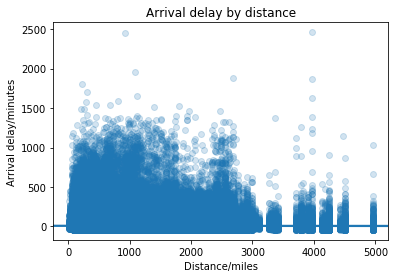

In [192]:
# scatterplot of distance versus arrival delay
sns.regplot(data=df_cct, x='Distance', y='ArrDelay', x_jitter=0.3, scatter_kws={'alpha': 0.2} )
plt.title('Arrival delay by distance')
plt.ylabel('Arrival delay/minutes')
plt.xlabel('Distance/miles');

**Discussion**

**High values of early arrival times are not associated with long distances but seem to be particularely clustered in distances up to 1000 miles. This seems to be unreasonable and the data points are probably incorrect outliers.**

**Next inspect delay data points.**

In [54]:
# what about delays > 24 hours 
df_cct[df_cct['ArrDelay'] > 1440]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1479584,1998,4,24,5,1425,1727,NW,568,N532US,1541.0,...,DEN,MSP,680,6,11,NaN,NaN,NaN,NaN,NaN
4291628,1998,10,9,5,905,1114,NW,1004,N712RC,1808.0,...,IND,DTW,231,19,17,NaN,NaN,NaN,NaN,NaN
5536331,2004,1,5,1,1420,2149,NW,924,N239NW,1879.0,...,HNL,SEA,2677,7,21,1879.0,0.0,0.0,0.0,0.0
8469728,2004,6,15,2,1140,1240,NW,1799,N8908E,1491.0,...,XNA,MEM,258,4,9,1491.0,0.0,0.0,0.0,0.0
9061041,2004,7,3,6,1206,1425,NW,1585,N752NW,1584.0,...,JAX,DTW,814,4,13,1584.0,0.0,0.0,0.0,0.0
9341758,2004,7,29,4,845,1609,NW,390,N318NB,1468.0,...,SNA,DTW,1960,9,13,1468.0,0.0,0.0,0.0,0.0
9661467,2004,8,28,6,900,1722,NW,862,N557NW,1457.0,...,FAI,MSP,2466,8,20,1457.0,0.0,0.0,0.0,0.0
12342157,2004,12,19,7,1830,602,NW,98,N230NW,1864.0,...,HNL,MSP,3972,17,24,695.0,0.0,47.0,0.0,1122.0
12342162,2004,12,24,5,1830,602,NW,98,N230NW,1625.0,...,HNL,MSP,3972,5,16,1625.0,0.0,0.0,0.0,0.0
13024650,2008,1,5,6,1045,1327,AA,2398,N622AA,1525.0,...,EGE,MIA,1811,14,71,1158.0,0.0,117.0,0.0,250.0


In [17]:
# what about arrival delays > 30 hours 
df_cct[df_cct['ArrDelay'] > 2000]

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13497533,2008,2,3,7,1820,555,NW,808,N817NW,2461.0,...,HNL,MSP,3972,6,16,1455.0,0.0,4.0,0.0,1002.0
14684734,2008,4,10,4,1417,1605,NW,1699,N3324L,2453.0,...,CLT,MSP,930,8,14,2436.0,0.0,0.0,0.0,17.0


In [22]:
# is ArrDelay the sum of CarrierDelay, WeatherDelay, NASDelay, Securitydelay and LateAircraftDelay
df_cct.loc[12342157, :]

Year                   2004
Month                    12
DayofMonth               19
DayOfWeek                 7
CRSDepTime             1830
CRSArrTime              602
UniqueCarrier            NW
FlightNum                98
TailNum              N230NW
ArrDelay               1864
DepDelay               1817
Origin                  HNL
Dest                    MSP
Distance               3972
TaxiIn                   17
TaxiOut                  24
CarrierDelay            695
WeatherDelay              0
NASDelay                 47
SecurityDelay             0
LateAircraftDelay      1122
Name: 12342157, dtype: object

**Discussion**

**As I cannot rule out at this timepoint that these delays are accurate numbers and as most of the extreme delays are associated with specific airlines I will keep these data for further analysis. Next make boxplots for the different years to see what can be inferred from this visualization for outliers.**

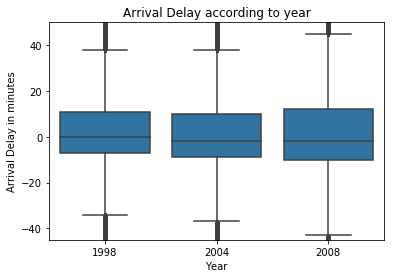

In [55]:
# draw boxplot of data
base_col = sns.color_palette()[0]
sns.boxplot(data=df_cct,x='Year', y='ArrDelay', color=base_col)
plt.ylim(-45, 50)
plt.ylabel('Arrival Delay in minutes')
plt.title('Arrival Delay according to year');

**Discussion**

**99.3 % of the data (whisker to whisker) are contained in a relatively small zone between -45 and +45 minutes. Outliers do not seem to be attributable to a specific year. The median of delays seems to decrease with time and is a negative number for 2004 and 2008. Delay rates seem to improve over time. In 2008 the IQR increases and the maximum and minimum increases. So in 2008 there is a greater spread and variability in the data.**

**Next look at patterns in single carrier and early arrivals.**

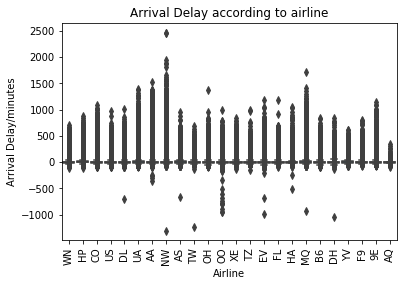

In [57]:
# draw boxplot of data
base_col = sns.color_palette()[0]
sns.boxplot(data=df_cct,x='UniqueCarrier', y='ArrDelay', color=base_col)
#plt.ylim(-100, 200)
plt.ylabel('Arrival Delay/minutes')
plt.xlabel('Airline')
plt.xticks(rotation=90)
#plt.ylim(-60, 60)
plt.title('Arrival Delay according to airline');

**Discussion**

**Outliers for extrem early arrival seem to be attributable to 9 out of 24 carriers. One of these namely SkyWest Airlines (OO) very prominent with lots of extreme early arrivals. Therefore for early arrivals I will delete datapoints that are marked as outliers in the boxplot as I am interested in delays and not in early arrivals.**

**First before changing the ArrDelay variable I will compare it to the DepDelay variable. As the dataset is very big I will use a random sample for comparison.**

In [58]:
# generate random sample of 10 % of data
df_cct_10 = df_cct.sample(frac=0.1)

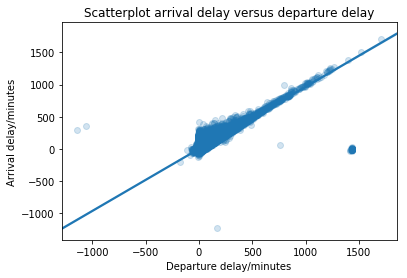

In [59]:
# scatterplot of ArrDelay versus DepDelay
sns.regplot(data=df_cct_10, x='DepDelay', y='ArrDelay', scatter_kws={'alpha': 0.2} )
plt.title('Scatterplot arrival delay versus departure delay')
plt.ylabel('Arrival delay/minutes')
plt.xlabel('Departure delay/minutes');

**Discussion**

**There seems to be a strong positive correlation between departure delay and arrival delay especially for the values > 500 minutes. Lower values of departure delays often correlate with higher values of arrival delays which makes perfect sence as weather conditions, air traffic conditions and technical problems might lead to late arrival although the departure was on time.We have incorrect outliers as well as a departure delay of 1500 minutes cannot lead to an early arrival or an arrival on time. Consider to delete data points were departure delays of more than 120 minutes (arbitrarelly chosen) lead to an on time arrival or early arrival.** 

**Discussion**

- Delete early arrivals more than 45 minutes
- Delete data with departure delay greater than 2 hours and on time arrival or early arrival


**For reasons of documentation flow for the project I will do the cleaning steps here in the exploratory section.**

**Clean**

**Define**

**Delete early arrivals > 45 minutes**

**Code**

In [60]:
# delete early arrivals > 45 minutes
df_cct = df_cct.query('ArrDelay > -45')

**Test**

In [61]:
# inspect data
df_cct.shape

(19057833, 21)

**Define**

**Delete data points with early arrival and a departure delay of more than 2 hours**

**Code**

In [62]:
# create mask for filtering data points with early and ontime arrival and departure delay of > 120 minutes
mask = (df_cct['ArrDelay']<=0) & (df_cct['DepDelay']>120)

In [63]:
# delete filtered datapoints with inversion of mask
df_cct = df_cct[~mask]

**Test**

In [64]:
# inspect data
df_cct.shape

(19057514, 21)

## Continue EDA

In [65]:
# create a function for cubic root transformation and reversal
def cbrt_trans(x, inverse=False):
    if not inverse:
        return np.cbrt(x)
    else:
        return x**3


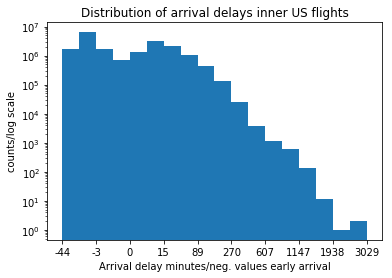

In [71]:
# apply transformation and plot data
bin_edges = np.arange(cbrt_trans(df_cct['ArrDelay'].min()),cbrt_trans(df_cct['ArrDelay'].max())+1, 1)
plt.hist(df_cct['ArrDelay'].apply(cbrt_trans), bins=bin_edges)
tic_locs = np.arange(cbrt_trans(df_cct['ArrDelay'].min()), cbrt_trans(df_cct['ArrDelay'].max())+2, 2)
plt.xticks(tic_locs, cbrt_trans(tic_locs, inverse=True).astype(int))
plt.yscale('log')
plt.ylabel('counts/log scale')
plt.xlabel('Arrival delay minutes/neg. values early arrival')
plt.title('Distribution of arrival delays inner US flights');

In [67]:
# 5 number statistics for arrival delay after eliminating outliers
df_cct['ArrDelay'].describe()

count    1.905751e+07
mean     7.438045e+00
std      3.474998e+01
min     -4.400000e+01
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [68]:
# how many flights are in time according to definition that up to 15 minutes flights are counted as on time
(df_cct['ArrDelay'] <=15).sum()/df_cct.shape[0]

0.7983414311016641

**Discussion**

**The median of the resulting arrival delay variable is -1 ie. more than 50 % of flights arrive early. Exactely  55 % of flights arrive ontime or early. If we take the 15 minute rule into account 80% of the flights are ontime or early. The distribution of the resulting data is bimodal with a peak around -15 minutes and a peak around + 15 minutes. The mean is much higher than the median that is the resulting variable has a right skewed distribution.** 

###  2) Explore departure delay data

In [69]:
# get 5 number statistics
df_cct['DepDelay'].describe()

count    1.905751e+07
mean     8.890124e+00
std      3.158998e+01
min     -1.197000e+03
25%     -3.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      2.467000e+03
Name: DepDelay, dtype: float64

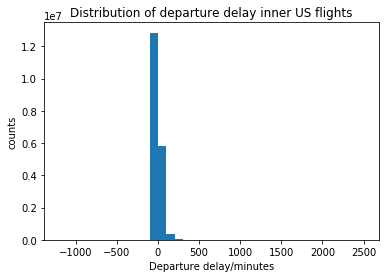

In [72]:
# draw histogram of data
bin_edges = np.arange(df_cct['DepDelay'].min(), df_cct['DepDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='DepDelay', bins=bin_edges);
plt.xlabel('Departure delay/minutes')
plt.ylabel('counts')
plt.title('Distribution of departure delay inner US flights');

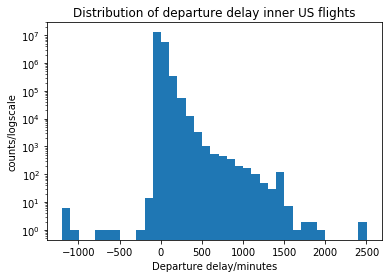

In [73]:
# draw histogram of data with log y axis
bin_edges = np.arange(df_cct['DepDelay'].min(), df_cct['DepDelay'].max()+ 100 , 100)
plt.hist(data=df_cct, x='DepDelay', bins=bin_edges)
plt.yscale('log')
plt.xlabel('Departure delay/minutes')
plt.ylabel('counts/logscale')
plt.title('Distribution of departure delay inner US flights');

**Discussion**

**An early departure of 10 and more hours seem very unlikely to me. Therefore I believe that these datapoints are outliers. Upon querying various sources in the internet an early departure of more than 10 minutes is unlikely. Therefore I will restrict this variable to data points with 10 minutes early departure or less.**

**Define**

**Delete data with early departure times of more than 10 minutes.**

**Code**

In [74]:
# how many data points have an early departure of more than 10 minutes
(df_cct['DepDelay'] < -10).sum()

226562

In [75]:
# baseline of number of datapoints
df_cct.shape

(19057514, 21)

In [76]:
# delete early departures of more than 10 minutes
df_cct = df_cct.query('DepDelay >= -10')

**Test**

In [77]:
# inspect data
df_cct.shape

(18830952, 21)

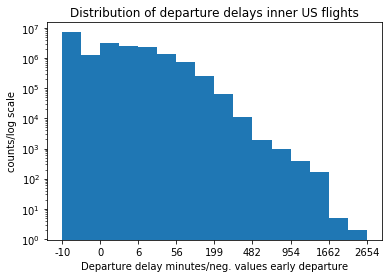

In [78]:
# cubic root transformation of data
bin_edges = np.arange(cbrt_trans(df_cct['DepDelay'].min()),cbrt_trans(df_cct['DepDelay'].max())+1, 1)
plt.hist(df_cct['DepDelay'].apply(cbrt_trans), bins=bin_edges)
tic_locs = np.arange(cbrt_trans(df_cct['DepDelay'].min()), cbrt_trans(df_cct['DepDelay'].max())+2, 2)
plt.xticks(tic_locs, cbrt_trans(tic_locs, inverse=True).astype(int))
plt.yscale('log')
plt.ylabel('counts/log scale')
plt.xlabel('Departure delay minutes/neg. values early departure')
plt.title('Distribution of departure delays inner US flights');

In [79]:
# 5 number statistics
df_cct['DepDelay'].describe()

count    1.883095e+07
mean     9.153001e+00
std      3.167764e+01
min     -1.000000e+01
25%     -3.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      2.467000e+03
Name: DepDelay, dtype: float64

In [80]:
# percent on time if you take 15 minute rule into account
(df_cct['DepDelay'] < 15).sum()/df_cct.shape[0]

0.8210635341219074

**Discussion**

**The median of the resulting departure delay variable is 0 ie. exactely 50 % of flights depart early or on time. Exactely  55 % of flights arrive ontime or early. Therefore additional time is won for some flights after departure. The mean is higher than the median i.e. the resulting variable has a right skewed distribution. It is interesting that for these 3 years 50% of the flights are ontime and 50 % are delayed regarding their departure. According to the 2016 data of planestats.com 82% of the flights have an on time departure. This is also true for the data here when we take the 15 minutes rule into account. So 32% of the flights are delayed up to 15 minutes but are regarded as beeing ontime.** 

### 3) Explore distance data

In [81]:
# get 5 number statistics
df_cct['Distance'].describe()

count    1.883095e+07
mean     7.275627e+02
std      5.645938e+02
min      8.000000e+00
25%      3.230000e+02
50%      5.710000e+02
75%      9.540000e+02
max      4.962000e+03
Name: Distance, dtype: float64

**Discussion**

**8 miles as the minimum distance is between two airports in Killeen Texas and therefore a valid datapoint. The distances above 4500 miles are predominantly to and from Honolulu and are therefore valid datapoints.**

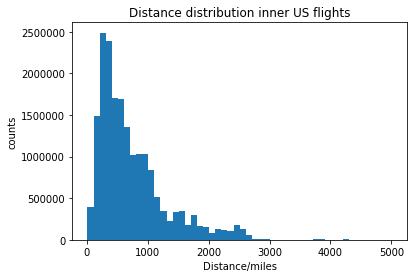

In [82]:
# draw histogram of data
bin_edges = np.arange(df_cct['Distance'].min(), df_cct['Distance'].max()+ 100 , 100)
plt.hist(data=df_cct, x='Distance', bins=bin_edges);
plt.xlabel('Distance/miles')
plt.ylabel('counts')
plt.title('Distance distribution inner US flights');

**Discussion**

**75% of the data are less than 954 miles. Average distance is 726 miles. Most of our data points are short and medium distance flights.**

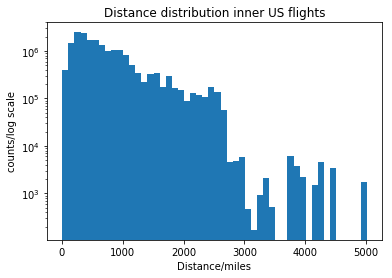

In [83]:
# draw histogram of data with log y to show also data points with smaller number of data
bin_edges = np.arange(df_cct['Distance'].min(), df_cct['Distance'].max()+ 100 , 100)
plt.hist(data=df_cct, x='Distance', bins=bin_edges);
plt.xlabel('Distance/miles')
plt.ylabel('counts/log scale')
plt.yscale('log')
plt.title('Distance distribution inner US flights');

In [84]:
# log 10 of 5 number statistics
np.log10(df_cct['Distance'].describe())

count    7.274872
mean     2.861870
std      2.751736
min      0.903090
25%      2.509203
50%      2.756636
75%      2.979548
max      3.695657
Name: Distance, dtype: float64

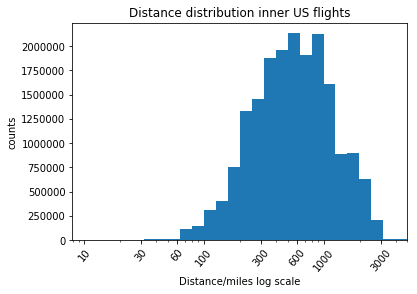

In [87]:
# log transform distance data
bin_edges = 10 ** np.arange(0.9, 3.69 + 0.1, 0.1 )
plt.hist(data = df_cct, x = 'Distance', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 10, 30, 60, 100, 300, 600, 1000, 3000, 6000, 10000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=50);
plt.xlim(0,5000);
plt.xlabel('Distance/miles log scale')
plt.ylabel('counts')
plt.title('Distance distribution inner US flights');

**Discussion**

**Distance can be transformed into a good enough normal shaped distribution. The peaks are at 500 miles and 800 miles. 75% of the flights cover distances below 954 miles. There is a wide spread of distances between 8 miles and more than 4500 miles.**

### 4) Explore TaxiIn data

In [88]:
# get 5 number statistics
df_cct['TaxiIn'].describe()

count    1.883095e+07
mean     6.959175e+00
std      2.832477e+01
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.473000e+03
Name: TaxiIn, dtype: float64

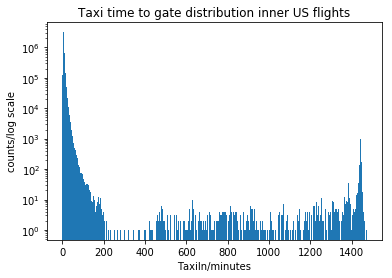

In [90]:
# draw histogram of data
bin_edges = np.arange(df_cct['TaxiIn'].min(), df_cct['TaxiIn'].max()+ 1 , 1)
plt.hist(data=df_cct, x='TaxiIn', bins=bin_edges)
plt.yscale('log')
plt.xlabel('TaxiIn/minutes')
plt.ylabel('counts/log scale')
plt.title('Taxi time to gate distribution inner US flights');

**Discussion**

**A taxi time to the gate of 0 minutes is not reasonable as well as taxi times of several hours. Upon querying the internet (planestats.com) I found that the maximum average taxi in time is found for Los Angeles airport with 12 minutes and the smallest for Bangor with 2 minutes. I will check how many datapoints would be affected if we restrict our data set to TaxiIn between 2 and 12 minutes.** 

In [91]:
# LAX datapoints with TaxiIn > 12 minutes
(df_cct['TaxiIn'] > 12).sum()

1275739

In [92]:
# Bangor BGR datapoints with TaxiIn < 2 minutes
(df_cct['TaxiIn'] < 2).sum()

122613

**Discussion**

**As I would lose a substantial percentage of data and I know that TaxiIn is not correlated with delays I will not delete these data as I do not think that I will use the TaxiIn parameter for further exploration.**

### 5) Explore TaxiOut data

In [93]:
# get 5 number statistics
df_cct['TaxiOut'].describe()

count    1.883095e+07
mean     1.584979e+01
std      1.255779e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.800000e+01
max      3.905000e+03
Name: TaxiOut, dtype: float64

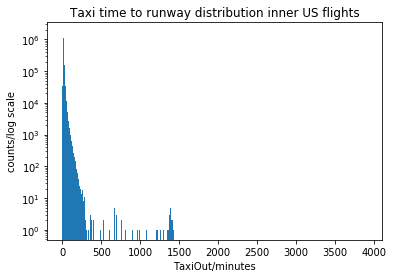

In [94]:
# draw histogram of data
bin_edges = np.arange(df_cct['TaxiOut'].min(), df_cct['TaxiOut'].max()+ 1 , 1)
plt.hist(data=df_cct, x='TaxiOut', bins=bin_edges)
plt.yscale('log')
plt.xlabel('TaxiOut/minutes')
plt.ylabel('counts/log scale')
plt.title('Taxi time to runway distribution inner US flights');

**Discussion**

**A taxi time to takeoff of 0 minutes seems not reasonable as well as a time of several hours. Upon querying the internet (plaestats.com) I found that the maximum average taxi out number is 27 minutes for LA Guardia and the minimum number  is 5 minutes for Nome. I will check how many data points would be affected if we restrict our data set to data points between 5 and 27 minutes TaxiOut time.**

In [95]:
# La Guardia datapoints with TaxiOut > 27 minutes
(df_cct['TaxiOut'] > 27).sum()

1599922

In [96]:
# Nome datapoints with TaxiOut < 5 minutes
(df_cct['TaxiOut'] < 5).sum()

132281

**Discussion**

**As I would lose a substantial percentage of data and I know that TaxiOut is not correlated with delays I will not delete these data as I do not think that I will use the TaxiOut parameter for further exploration.**

### 6) Explore Day of week data

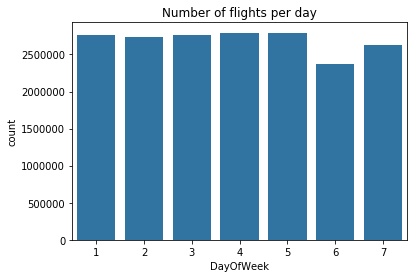

In [97]:
# create bar chart with number of flights per weekday
base_color = sns.color_palette()[0]
sns.countplot(data = df_cct, x = 'DayOfWeek', color = base_color)
plt.title('Number of flights per day');

**Discussion**

**The distribution of the flights on single weekdays is as expected. From Monday to Friday we have an even distribution of flights. During weekends the  number of flights is less than during workdays with Saturdays having the lest number of flights.**

### 7) Explore month data

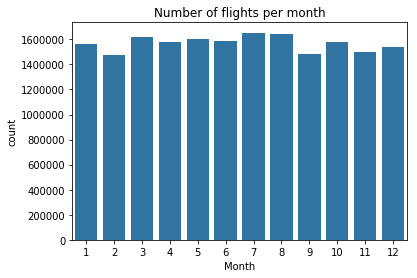

In [98]:
# create bar chart with number of flights per month
base_color = sns.color_palette()[0]
sns.countplot(data = df_cct, x = 'Month', color = base_color)
plt.title('Number of flights per month');

**Discussion**

**February is the shortest month with the least number of flights. July and August have the maximum number of flights probably because of the holiday season. March, May and October are also strong month. Nothing unexpected at first glance.**

### 8) Explore unique carrier data

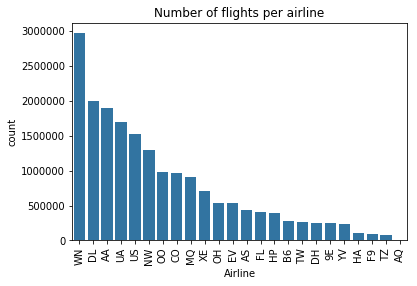

In [100]:
# create bar chart with number of flights per carrier
base_color = sns.color_palette()[0]
gen_order = df_cct['UniqueCarrier'].value_counts().index
sns.countplot(data = df_cct, x = 'UniqueCarrier', color = base_color, order=gen_order)
plt.xticks(rotation=90)
plt.title('Number of flights per airline')
plt.xlabel('Airline');

**Discussion**

**There is an uneven distribution between the number of flights between airlines. The intercarrier spread is very high. This has to be taken into account for further analysis if mean is not taken into account.**

### 9) Explore origin data

In [101]:
# number of flights per origin airport
df_cct['Origin'].value_counts()

ATL    1063615
ORD     978012
DFW     847187
LAX     616759
PHX     529933
DEN     522965
IAH     502563
DTW     442958
LAS     441062
EWR     399348
MSP     396739
SFO     395024
CVG     368021
SLC     354954
CLT     349634
BOS     331783
MCO     323785
PHL     321574
LGA     320306
SEA     309084
STL     291325
BWI     274138
DCA     251425
IAD     243215
JFK     242430
SAN     238296
MDW     219831
CLE     212494
PIT     208161
TPA     199124
        ...   
LWS        594
DUT        579
OTH        495
LMT        464
SLE        453
LWB        405
WYS        388
MKG        331
YKM        330
RFD        281
CMX        276
ALO        265
GST        246
PLN        243
MKK        208
RHI        192
LNY        192
ADK        155
TEX        149
APF        137
BLI         92
INL         67
BJI         65
TUP          8
CKB          5
PIR          5
OGD          4
PUB          4
FMN          1
PVU          1
Name: Origin, Length: 317, dtype: int64

**Discussion**

**There are too many datapoints to reasonably present it in a chart. Also the spread is too wide. Therefore I will plot as an example the 20 airports with the highest flight frequency.**

In [102]:
# get the origin airports with the 20 highest flight frequencies
high_frequency_origin = df_cct['Origin'].value_counts()[:20]

In [103]:
# get a list of the airport names
high_frequency_list = high_frequency_origin.index.tolist()

In [104]:
# create data frame with only 20 airports with highest flight frequencies
df_hf_origin = df_cct[df_cct['Origin'].isin(high_frequency_list)]

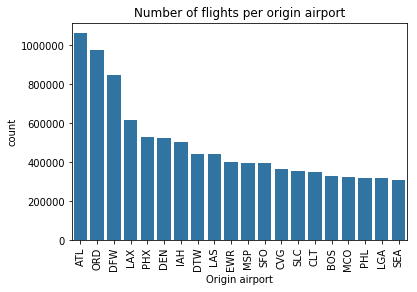

In [105]:
# create bar chart with number of flights per origin airport
base_color = sns.color_palette()[0]
gen_order = df_hf_origin['Origin'].value_counts().index
sns.countplot(data = df_hf_origin, x = 'Origin', color = base_color, order=gen_order)
plt.xticks(rotation=90)
plt.title('Number of flights per origin airport')
plt.xlabel('Origin airport');

**Discussion**

**The spread for the number of flights  originating from an airport is very wide ranging from more than 1 million to 1. Even in the 20 airports with the highest flight frequency the difference between number one and number twenty is more than twofold.**

### 10) Explore destination data

In [106]:
# number of flights per destination airport
df_cct['Dest'].value_counts()

ATL    1050480
ORD     960361
DFW     833233
LAX     611345
PHX     527332
DEN     513791
IAH     495434
LAS     442572
DTW     433898
EWR     396471
SFO     393628
MSP     388476
CVG     361789
SLC     347661
CLT     345364
BOS     333056
MCO     324044
LGA     323709
PHL     321121
SEA     302130
STL     291160
BWI     275807
DCA     252751
JFK     243749
SAN     242204
IAD     239373
MDW     220581
CLE     211929
PIT     207775
TPA     200811
        ...   
HVN        635
LWS        627
VIS        608
DUT        590
OTH        496
LMT        492
WYS        485
SLE        453
LWB        424
MKG        369
YKM        330
CMX        282
RFD        281
ALO        272
GST        261
PLN        252
LNY        222
RHI        208
MKK        192
ADK        163
TEX        153
APF        124
BLI        114
BJI         74
INL         69
TUP          9
CKB          6
PIR          5
PVU          2
CBM          1
Name: Dest, Length: 315, dtype: int64

**Discussion**

**There are too many datapoints to reasonably present it in a chart. Also the spread is too wide. Therefore I will plot as an example the 20 airports with the highest flight frequency.**

In [107]:
# get the destination airports with the 20 highest flight frequencies
high_frequency_dest = df_cct['Dest'].value_counts()[:20]

In [108]:
# get a list of the airport names
high_frequency_list_dest = high_frequency_dest.index.tolist()

In [109]:
# create data frame with only 20 airports with highest flight frequencies
df_hf_dest = df_cct[df_cct['Dest'].isin(high_frequency_list_dest)]

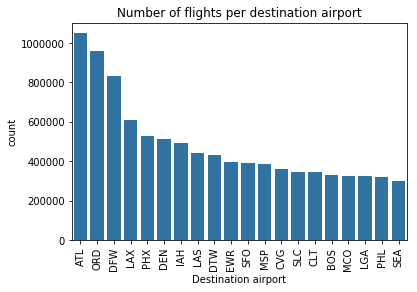

In [110]:
# create bar chart with number of flights per destination airport
base_color = sns.color_palette()[0]
gen_order = df_hf_dest['Dest'].value_counts().index
sns.countplot(data = df_hf_dest, x = 'Dest', color = base_color, order=gen_order)
plt.xticks(rotation=90)
plt.title('Number of flights per destination airport')
plt.xlabel('Destination airport');

**Discussion**

**The spread for the number of flights  landing at an airport is very wide ranging from more than 1 million to 1. Even in the 20 airports with the highest flight frequency the difference between number one and number twenty is more than twofold.**

### 11) Explore carrier delay data

In [111]:
# create data set without 1998 data as there were no records taken
df_cct_0408 = df_cct.query('Year > 1998')

In [112]:
# inspect data
df_cct_0408.shape

(13615292, 21)

In [113]:
# percentage of positive delay data
(df_cct_0408['ArrDelay'][df_cct_0408['ArrDelay']>0].count())/df_cct_0408.shape[0]

0.43875012008556263

In [114]:
# inspect data
df_cct_0408

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5384721,2004,1,12,1,630,915,UA,462,N805UA,-14.0,...,ORD,CLT,599,7,11,0.0,0.0,0.0,0.0,0.0
5384722,2004,1,13,2,630,915,UA,462,N851UA,-4.0,...,ORD,CLT,599,16,16,0.0,0.0,0.0,0.0,0.0
5384723,2004,1,14,3,630,915,UA,462,N436UA,5.0,...,ORD,CLT,599,4,15,0.0,0.0,0.0,0.0,0.0
5384724,2004,1,15,4,630,915,UA,462,N828UA,-16.0,...,ORD,CLT,599,4,10,0.0,0.0,0.0,0.0,0.0
5384725,2004,1,16,5,630,915,UA,462,N831UA,3.0,...,ORD,CLT,599,3,13,0.0,0.0,0.0,0.0,0.0
5384726,2004,1,17,6,630,915,UA,462,N834UA,-10.0,...,ORD,CLT,599,5,11,0.0,0.0,0.0,0.0,0.0
5384727,2004,1,19,1,630,915,UA,462,N840UA,29.0,...,ORD,CLT,599,3,11,20.0,0.0,9.0,0.0,0.0
5384728,2004,1,20,2,630,915,UA,462,N454UA,-11.0,...,ORD,CLT,599,3,10,0.0,0.0,0.0,0.0,0.0
5384729,2004,1,21,3,630,915,UA,462,N808UA,-12.0,...,ORD,CLT,599,16,8,0.0,0.0,0.0,0.0,0.0
5384730,2004,1,22,4,630,915,UA,462,N832UA,-14.0,...,ORD,CLT,599,4,14,0.0,0.0,0.0,0.0,0.0


In [115]:
# create data set with nonnull values only
df_cct_0408_pos = df_cct_0408.query('CarrierDelay > 0')

In [116]:
# inspect data
df_cct_0408_pos['CarrierDelay'].describe()

count    1.241718e+06
mean     3.453068e+01
std      5.158875e+01
min      1.000000e+00
25%      9.000000e+00
50%      1.900000e+01
75%      3.900000e+01
max      2.436000e+03
Name: CarrierDelay, dtype: float64

In [117]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_0408_pos['CarrierDelay'].describe())

count    6.094023
mean     1.538205
std      1.712555
min      0.000000
25%      0.954243
50%      1.278754
75%      1.591065
max      3.386677
Name: CarrierDelay, dtype: float64

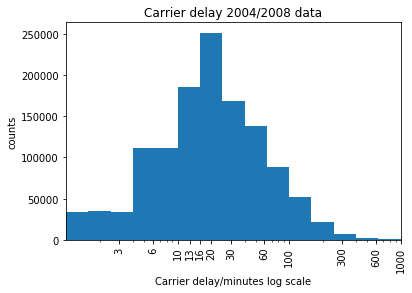

In [118]:
# log transform carrier delay data
bin_edges = 10 ** np.arange(0, 3.39 + 0.2, 0.2 )
plt.hist(data = df_cct_0408_pos, x = 'CarrierDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('Carrier delay/minutes log scale')
plt.ylabel('counts')
plt.title('Carrier delay 2004/2008 data');

**Discussion**

**For real(=positive) delay data carrier delay has it's peak at around 20 minutes. The datapoints used for this statistic represent only app. 9 % of the 0408 data set. 44% of the whole 0408 dataset do have a positive delay.**

### 12) Explore weather delay data

In [119]:
# create data set with nonnull values only
df_cct_0408_posw = df_cct_0408.query('WeatherDelay > 0')

In [120]:
# inspect data
df_cct_0408_posw['WeatherDelay'].describe()

count    215971.000000
mean         44.778461
std          56.746344
min           1.000000
25%          12.000000
50%          26.000000
75%          56.000000
max        1352.000000
Name: WeatherDelay, dtype: float64

In [121]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_0408_posw['WeatherDelay'].describe())

count    5.334395
mean     1.651069
std      1.753938
min      0.000000
25%      1.079181
50%      1.414973
75%      1.748188
max      3.130977
Name: WeatherDelay, dtype: float64

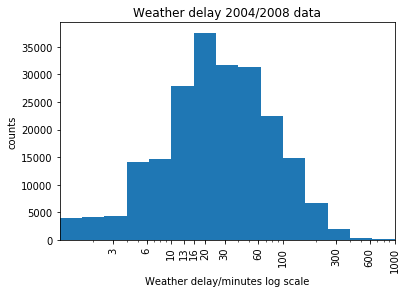

In [122]:
# log transform weather delay data
bin_edges = 10 ** np.arange(0, 3.13 + 0.2, 0.2 )
plt.hist(data = df_cct_0408_posw, x = 'WeatherDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('Weather delay/minutes log scale')
plt.ylabel('counts')
plt.title('Weather delay 2004/2008 data');

**Discussion**

**The weather delay data look very similar to the carrier delay data with a peak at around 20 minutes and a distribution almost exactly like the carrier delay data. The datapoints used for this analysis represent only 1.6 % of the 0408 data.**

### 13) Explore NAS delay data

In [123]:
# create data set with nonnull values only
df_cct_0408_posn = df_cct_0408.query('NASDelay > 0')

In [124]:
# inspect data
df_cct_0408_posn['NASDelay'].describe()

count    1.821125e+06
mean     2.771958e+01
std      3.507464e+01
min      1.000000e+00
25%      9.000000e+00
50%      1.800000e+01
75%      3.100000e+01
max      1.380000e+03
Name: NASDelay, dtype: float64

In [125]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_0408_posn['NASDelay'].describe())

count    6.260340
mean     1.442787
std      1.544993
min      0.000000
25%      0.954243
50%      1.255273
75%      1.491362
max      3.139879
Name: NASDelay, dtype: float64

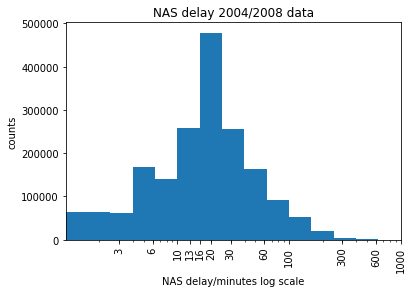

In [126]:
# log transform NAS delay data
bin_edges = 10 ** np.arange(0, 3.14 + 0.2, 0.2 )
plt.hist(data = df_cct_0408_posn, x = 'NASDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('NAS delay/minutes log scale')
plt.ylabel('counts')
plt.title('NAS delay 2004/2008 data');

**Discussion**

**NAS delay peaks around below 20 minutes. Around 13 % of the datapoints of the 0408 dataset contributed to this statistic.**

### 14) Explore security delay

In [127]:
# create data set with nonnull values only
df_cct_0408_poss = df_cct_0408.query('SecurityDelay > 0')

In [128]:
# inspect data
df_cct_0408_poss['SecurityDelay'].describe()

count    14360.000000
mean        20.441156
std         26.674709
min          1.000000
25%          7.000000
50%         14.000000
75%         23.000000
max        533.000000
Name: SecurityDelay, dtype: float64

In [129]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_0408_poss['SecurityDelay'].describe())

count    4.157154
mean     1.310505
std      1.426100
min      0.000000
25%      0.845098
50%      1.146128
75%      1.361728
max      2.726727
Name: SecurityDelay, dtype: float64

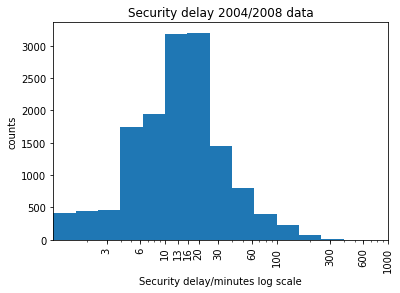

In [130]:
# log transform security delay data
bin_edges = 10 ** np.arange(0, 2.73 + 0.2, 0.2 )
plt.hist(data = df_cct_0408_poss, x = 'SecurityDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('Security delay/minutes log scale')
plt.ylabel('counts')
plt.title('Security delay 2004/2008 data');

**Discussion**

**Again a similar distribution to the other delay columns. 0.11 % of the original data were used.**

### 15) Explore Late aircraft delay

In [131]:
# create data set with nonnull values only
df_cct_0408_posa = df_cct_0408.query('LateAircraftDelay > 0')

In [132]:
# inspect data
df_cct_0408_posa['LateAircraftDelay'].describe()

count    1.293197e+06
mean     4.348259e+01
std      4.542343e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.800000e+01
75%      5.500000e+01
max      1.344000e+03
Name: LateAircraftDelay, dtype: float64

In [133]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_0408_posa['LateAircraftDelay'].describe())

count    6.111665
mean     1.638315
std      1.657280
min      0.000000
25%      1.176091
50%      1.447158
75%      1.740363
max      3.128399
Name: LateAircraftDelay, dtype: float64

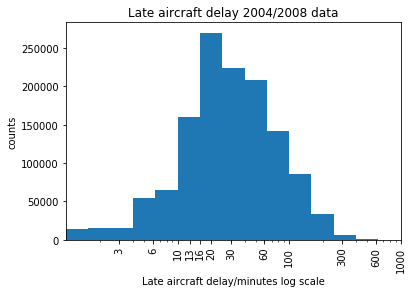

In [134]:
# log transform late aircraft delay data
bin_edges = 10 ** np.arange(0, 3.13 + 0.2, 0.2 )
plt.hist(data = df_cct_0408_posa, x = 'LateAircraftDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('Late aircraft delay/minutes log scale')
plt.ylabel('counts')
plt.title('Late aircraft delay 2004/2008 data');

**Discussion**

**And again a very familiar looking plot for late aircraft delay. Around 9,5 % of the data were used.**

**In order to see wether this similar distribution is also reflected in the arrival delay variable of the whole data set I will also plot the positive delays for the whole dataset.**

In [135]:
# create dataset with nonnull values only
df_cct_arr_pos = df_cct.query('ArrDelay > 0')

In [136]:
# log 5 number statistic because of wide range of data
np.log10(df_cct_arr_pos['ArrDelay'].describe())

count    6.928663
mean     1.453145
std      1.633907
min      0.000000
25%      0.698970
50%      1.113943
75%      1.518514
max      3.391112
Name: ArrDelay, dtype: float64

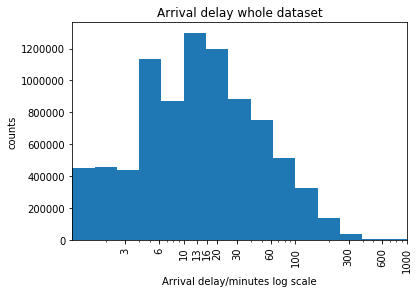

In [137]:
# log transform arrival delay data
bin_edges = 10 ** np.arange(0, 3.39 + 0.2, 0.2 )
plt.hist(data = df_cct_arr_pos, x = 'ArrDelay', bins = bin_edges);
plt.xscale('log');
tic_loc = [0, 3, 6, 10, 13, 16, 20, 30, 60, 100, 300, 600, 1000]
plt.xticks(tic_loc, tic_loc)
plt.xticks(rotation=90);
plt.xlim(0,1000);
plt.xlabel('Arrival delay/minutes log scale')
plt.ylabel('counts')
plt.title('Arrival delay whole dataset');

**Discussion**

**The whole dataset has a bimodal distribution with one peak at 5 and one peak at around 15 minutes. Up to 15 minutes flights count as beeing in time. I do think that airlines want to have their data within this range and maybe tweak it a little bit. In the data columns where the delay data are broken down into subsets the predominant delay bin is around 20 minutes. These were the main quantitative and qualitative variables for which a univariate analysis was interesting. Therefore I now will start bivariate analyses.**  

### Bivariate Analysis

**Discussion**

**First of all I will explore if I can work with a random sample in order to save calculation time for plots.**

In [138]:
# info about columns and dtypes
df_cct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18830952 entries, 0 to 19372069
Data columns (total 21 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
CRSDepTime           int64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(7), int64(10), object(4)
memory usage: 3.7+ GB


In [139]:
# create list of quantitative data
df_cct_stats = ['DayOfWeek', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']

In [140]:
# create list of quantitative data for 0408 data set
df_cct_stats_0408 = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','DayOfWeek', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut' ]

**Discussion**

**Explore if a random sample of the data gives the same correlation coefficient as the whole data.**

In [141]:
df_cct_10 = df_cct.sample(frac=0.1)

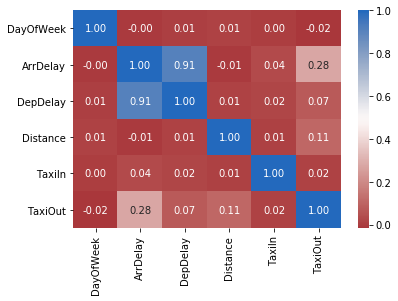

In [142]:
# create heatmap of correaltion between main variables of interest for random sample
sns.heatmap(df_cct_10[df_cct_stats].corr(), annot=True, fmt='.2f',cmap='vlag_r');

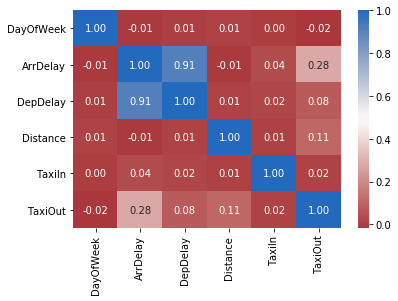

In [143]:
# create heatmap of correaltion between main variables of interest for whole dataset
sns.heatmap(df_cct[df_cct_stats].corr(), annot=True, fmt='.2f',cmap='vlag_r');

**Discussion**

**As departure and arrival delay are highly correlated I can use them interchangeably for drawing conclusion on general delay inspections.**

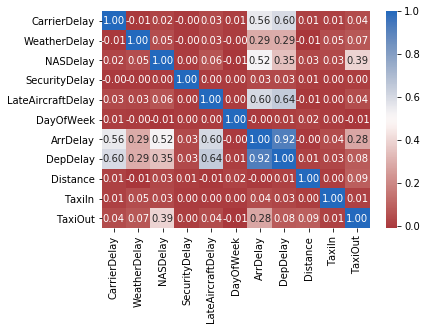

In [144]:
# create heatmap of correaltion between main variables of interest for 0408 dataset 
sns.heatmap(df_cct_0408[df_cct_stats_0408].corr(), annot=True, fmt='.2f',cmap='vlag_r');

**Discussion**

**The correlation matrix is nearly identical. Therefore we can work with this reduced dataset for scatterplots etc.**

### 16) Month and departure delay and arrival delay

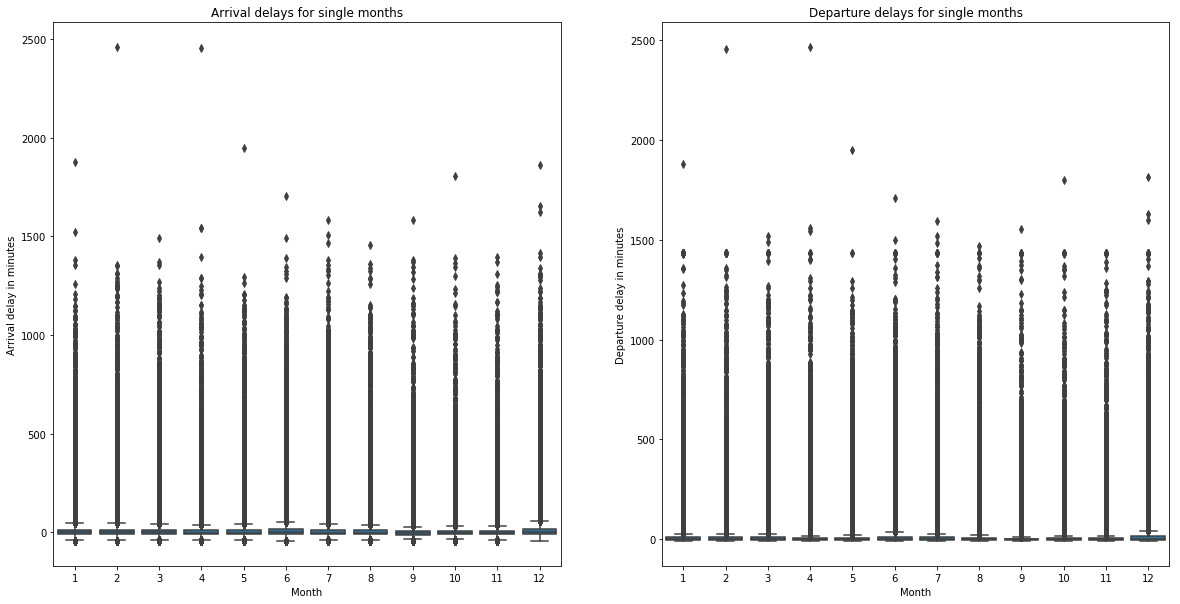

In [145]:
# boxplot for arrival delay and departure delay for single months 
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Month', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays for single months')
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Month', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays for single months');

**Discussion**

**There seems to be no major difference between box plots and outliers in different months for arrival delays and departure delays. The very high correlation between arrival delay and departure delay can also be seen for the outliers in these two datasets. As the pictures are dominated by the outliers I will limit the y axis to see the box plots clearer.**

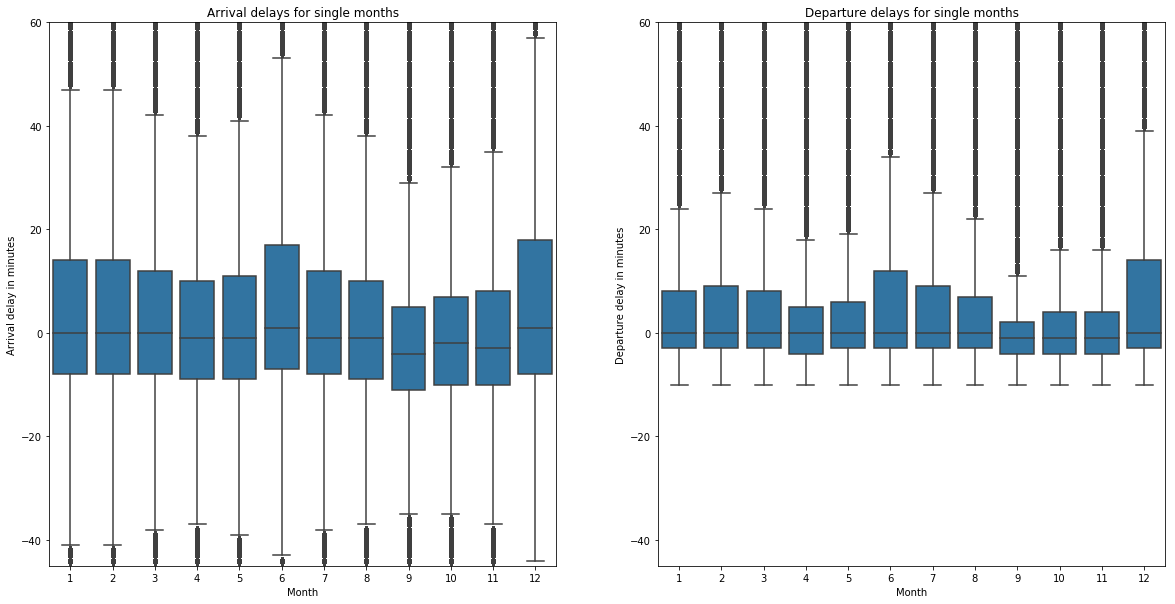

In [146]:
# boxplot for arrival delay and departure delay for single months with limited y axis
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Month', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays for single months')
plt.ylim(-45, 60)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Month', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays for single months')
plt.ylim(-45, 60);

**Discussion**

**There seems to be no statistical significant differences between delays in single months of the year. June and December are the months with median highest delays which is surprising for me as I would have expected this to be July and August because of the holiday season. September seems to be the month with in comparison smaller delays. As these data still incorporate ontime and early arrivals and departures I will now see if there is a change if I only incorporate real (= positive) delay data.**

In [147]:
# create data frame with real arrival delay data
df_cct_posAD = df_cct.query('ArrDelay > 0')

In [148]:
# create data frame with real departure delay data
df_cct_posDD = df_cct.query('DepDelay > 0')

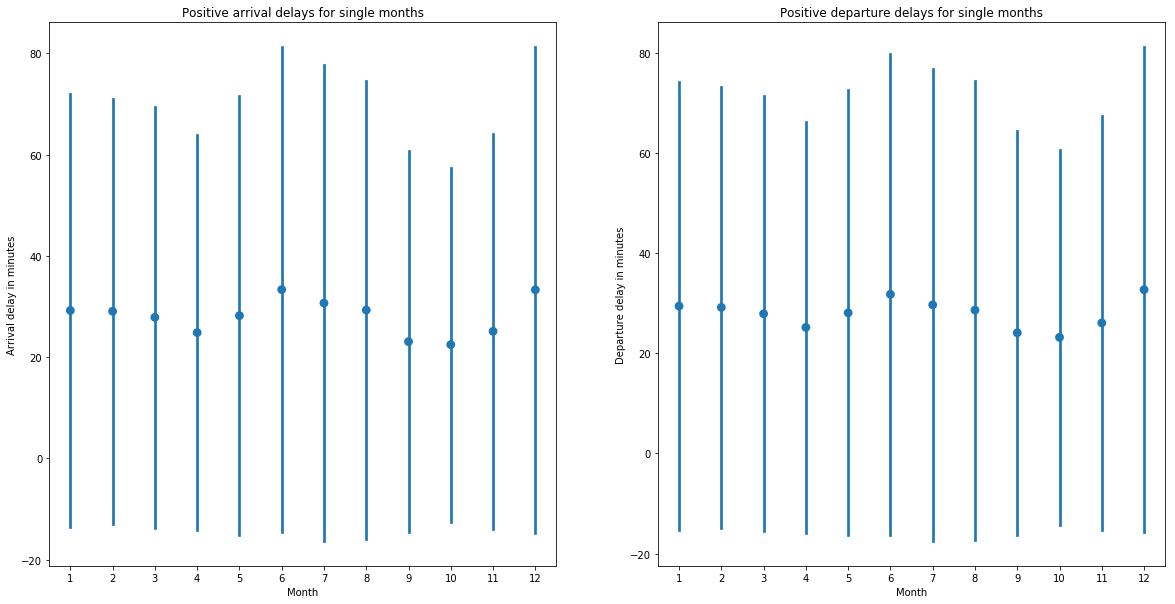

In [149]:
# create pointplots of arrival and departure delay for single months with real delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_posAD, x='Month', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay in minutes')
plt.title('Positive arrival delays for single months')
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_posDD, x='Month', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay in minutes')
plt.title('Positive departure delays for single months');

**Discussion**

**Here we get a similar picture as with the previous box plots. There are no statistically significant differences according to the plot between delays for various months. June and December are the months with the highest delays in average and September, October and April are the months with the lowest delays in average. As for the boxplots September seems to be lower than October and April this can be explained by the ontime and early arrivals in case of the boxplot data. I want to explore how the distribution looks for high delays over 45 minutes.**

In [150]:
# create data frame with high arrival delay data
df_cct_highAD = df_cct.query('ArrDelay > 45')

In [151]:
# create data frame with high departure delay data
df_cct_highDD = df_cct.query('DepDelay > 45')

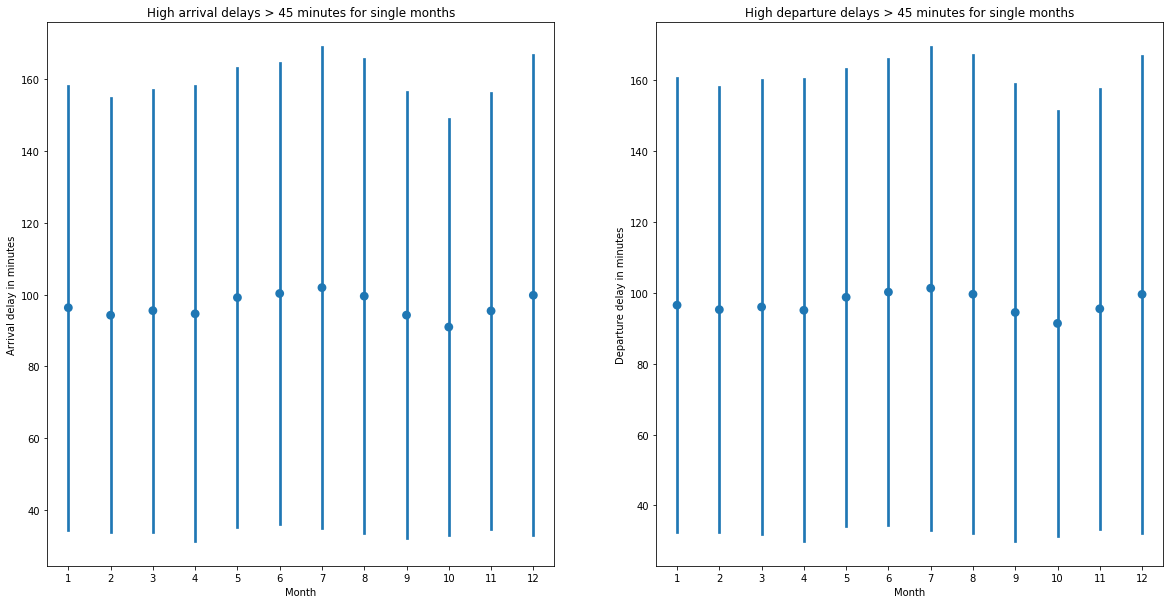

In [152]:
# create pointplots of arrival and departure delay for single months with real delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_highAD, x='Month', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay in minutes')
plt.title('High arrival delays > 45 minutes for single months')
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_highDD, x='Month', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay in minutes')
plt.title('High departure delays > 45 minutes for single months');

**Discussion**

**July and August are among the months with the highest delays which I would have expected but they are so with May, June and December. In general the data are similar to the real (=positive) delay data and the box plots for the whole data set including ontime and early arrival data. So there is no specific pattern for different months to find within these data.**

### 17) Day of week and arrival and departure delay

In [153]:
# cast values of DayOfWeek to string
df_cct['DayOfWeek'] = df_cct['DayOfWeek'].apply(str)

In [154]:
# name the weekdays for plotting
df_cct['Weekday'] = ['Monday' if '1' in text
                     else 'Tuesday' if '2' in text
                     else 'Wednesday' if '3' in text
                     else 'Thursday' if '4' in text
                     else 'Friday' if '5' in text
                    else 'Saturday' if '6' in text
                    else 'Sunday' for text in df_cct['DayOfWeek']]

In [155]:
# get airline abbreviations
df_cct['UniqueCarrier'].unique()

array(['WN', 'HP', 'CO', 'US', 'DL', 'UA', 'AA', 'NW', 'AS', 'TW', 'OH',
       'OO', 'XE', 'TZ', 'EV', 'FL', 'HA', 'MQ', 'B6', 'DH', 'YV', 'F9',
       '9E', 'AQ'], dtype=object)

In [156]:
# convert Weekday and unique carrier into ordered categorical types
ordinal_var_dict = {'Weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'],
                    'UniqueCarrier': ['WN', 'HP', 'CO', 'US', 'DL', 'UA', 'AA', 'NW', 'AS', 'TW', 'OH', 'OO', 'XE', 'TZ', 'EV', 'FL', 'HA', 'MQ', 'B6', 'DH', 'YV', 'F9', '9E', 'AQ']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df_cct[var] = df_cct[var].astype(ordered_var)
    else: # pre-v0.21
        df_cct[var] = df_cct[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

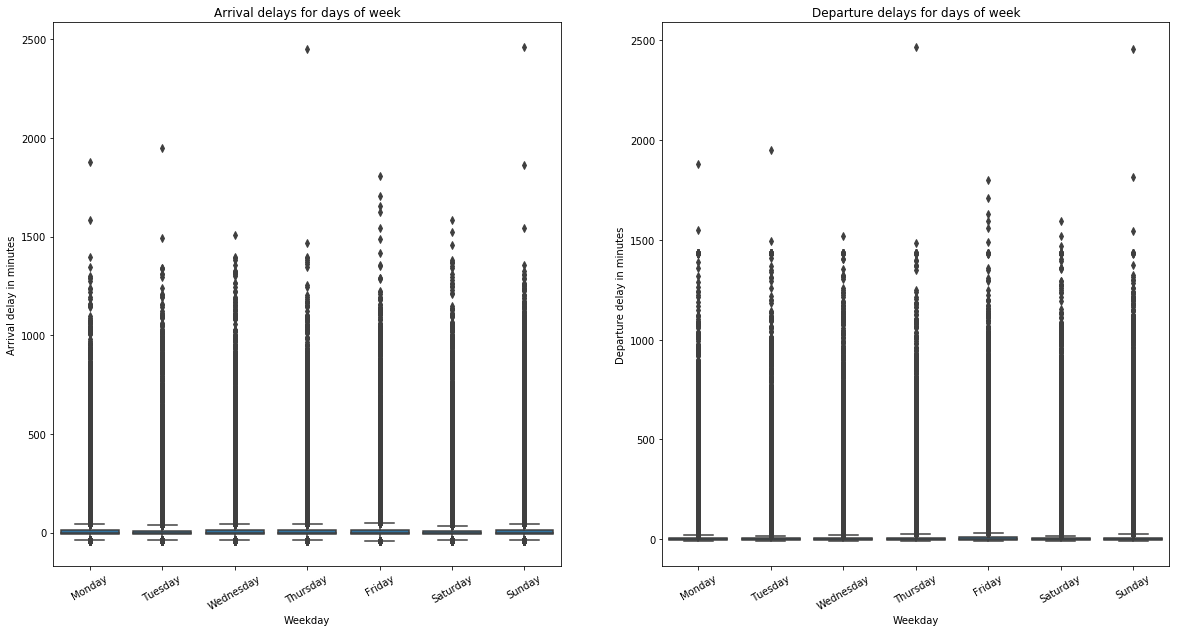

In [157]:
# boxplot for arrival delay and departure delay for weekdays 
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Weekday', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays for days of week')
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Weekday', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.xticks(rotation=30)
plt.title('Departure delays for days of week');

**Discussion**

**Like for the months data there seems to be no major difference between box plots and outliers for different days for arrival delays and departure delays. The very high correlation between arrival delay and departure delay can also be seen for the outliers in these two datasets. As the pictures are dominated by the outliers I will limit the y axis to see the box plots clearer.**

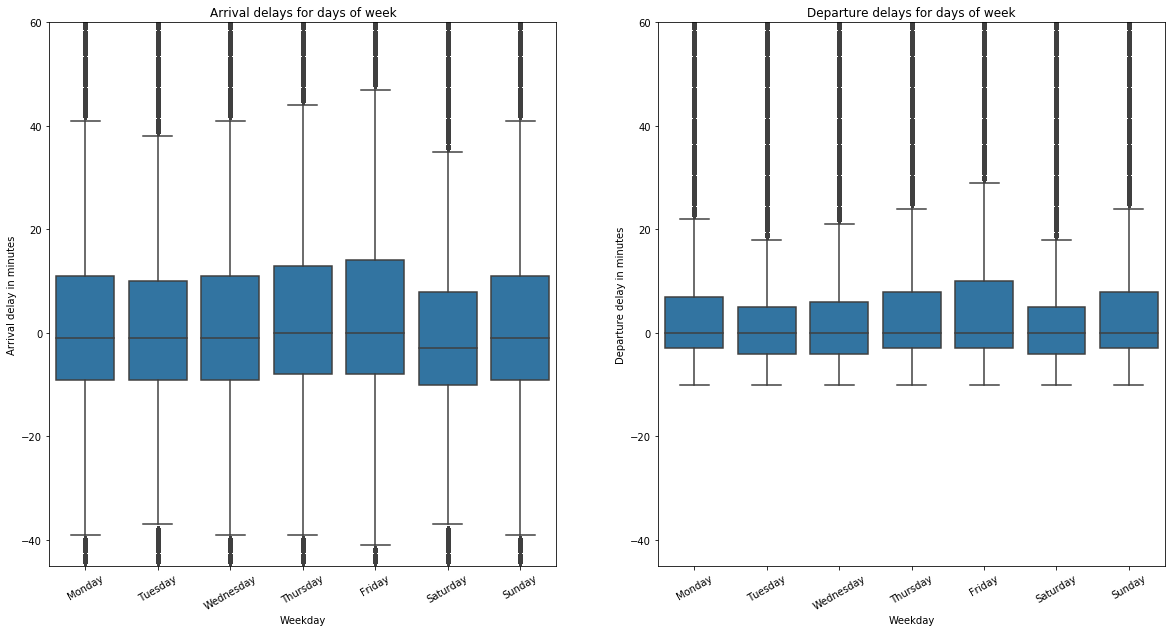

In [158]:
# boxplot for arrival delay and departure delay for weekdays with limited y axis
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Weekday', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays for days of week')
plt.xticks(rotation=30)
plt.ylim(-45, 60)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Weekday', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays for days of week')
plt.xticks(rotation=30)
plt.ylim(-45, 60);

**Discussion**

**There seem to be no statistical significant differences between delays for certain weekdays. Saturday seems to have the lowest delays. Saturday is also the day with the lowest flight frequency. Thursday and Friday have a tendency to a greater variation in delays and a tendency to higher median delays. As these data still incorporate on time and early arrivals and departures I will now see if there is a change if I only incorporate real (= positive) delay data.**

In [159]:
# create data frame with real arrival delay data
df_cct_posAD = df_cct.query('ArrDelay > 0')

In [160]:
# create data frame with real arrival delay data
df_cct_posDD = df_cct.query('DepDelay > 0')

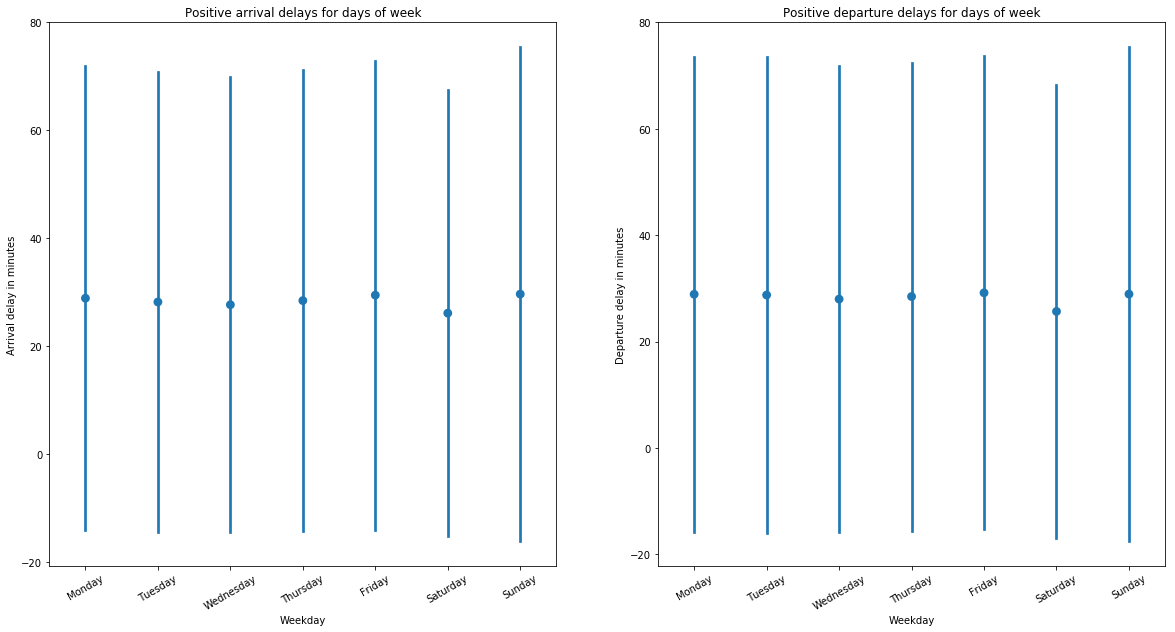

In [161]:
# create pointplots of arrival and departure delay for weekdays with real delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_posAD, x='Weekday', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay in minutes')
plt.title('Positive arrival delays for days of week')
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_posDD, x='Weekday', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay in minutes')
plt.xticks(rotation=30)
plt.title('Positive departure delays for days of week');

**Discussion**

**The positive delay data are similar to the box plot data including ontime and early arrival. Therefore a further investigation of high delays will not be necessary. In general I do not find a specific pattern for different days of the week for arrival and departure delays.**

### 18) Unique carrier and arrival and departure delay

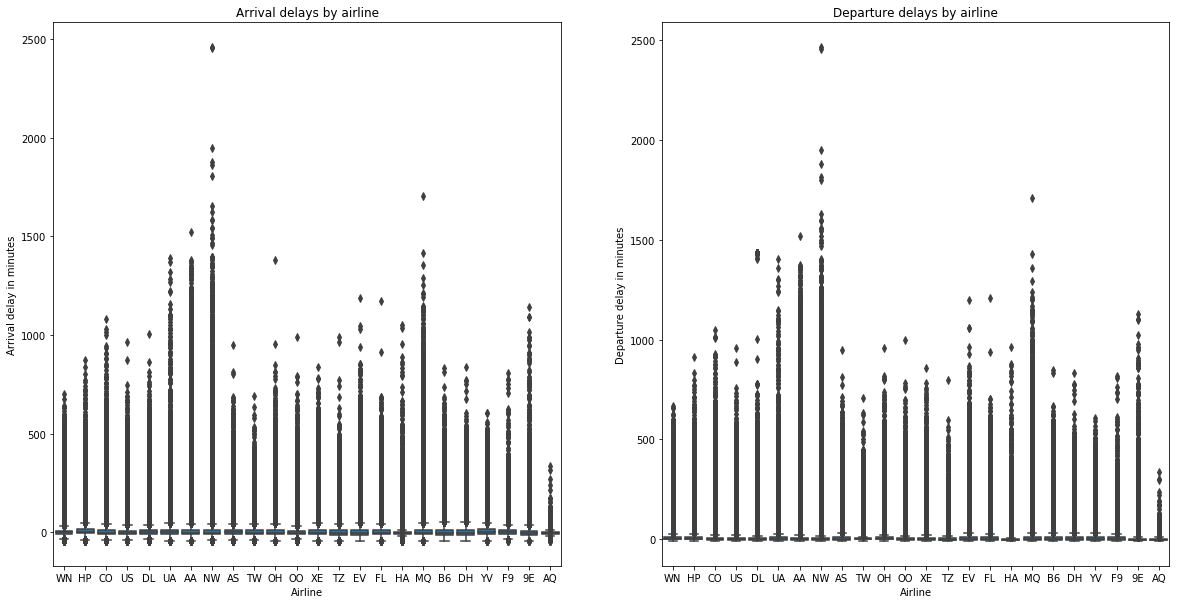

In [162]:
# boxplot for arrival delay and departure delay by airline
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.xlabel('Airline')
plt.title('Arrival delays by airline')
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays by airline')
plt.xlabel('Airline');

**Discussion**

**The highest delay data can be found for North West Airlines(NW), American Eagles Airlines(MQ), United Airlines (UA) and American Airlines(AA). Southwest Airlines(WN) which has the highest flight frequency does not have a tendency for big delays. In order to see more of the box plot I will restrict the y axis.**

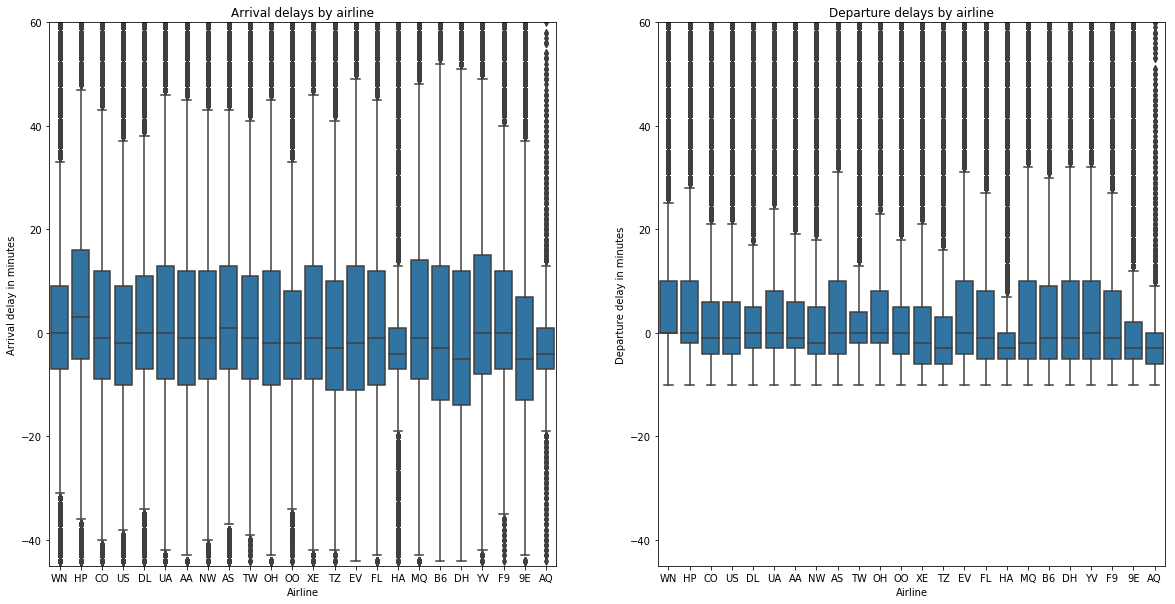

In [163]:
# boxplot for arrival delay and departure delay by airline with limited y axis
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays by airline')
plt.xlabel('Airline')
plt.ylim(-45, 60)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays by airline')
plt.xlabel('Airline')
plt.ylim(-45, 60);

**Discussion**

**Looking at the spread of the data 2 airlines stand out with a low variablity. These are Aloha Airlines(AQ) and Hawaian Airlines(HA)which have 99.3% of their data within +/- 20 minutes whereas the other airlines have it within +/- 30-40 minutes. If they only serve inner Hawaian  short destinations this may be an explanation but this has to be investigted further. Also South West Airlines(WN) has a lower variability than the other airlines though it has the highest flight frequency of all airlines. Now I will look into a pointplot with only real(=positive) delay data:**

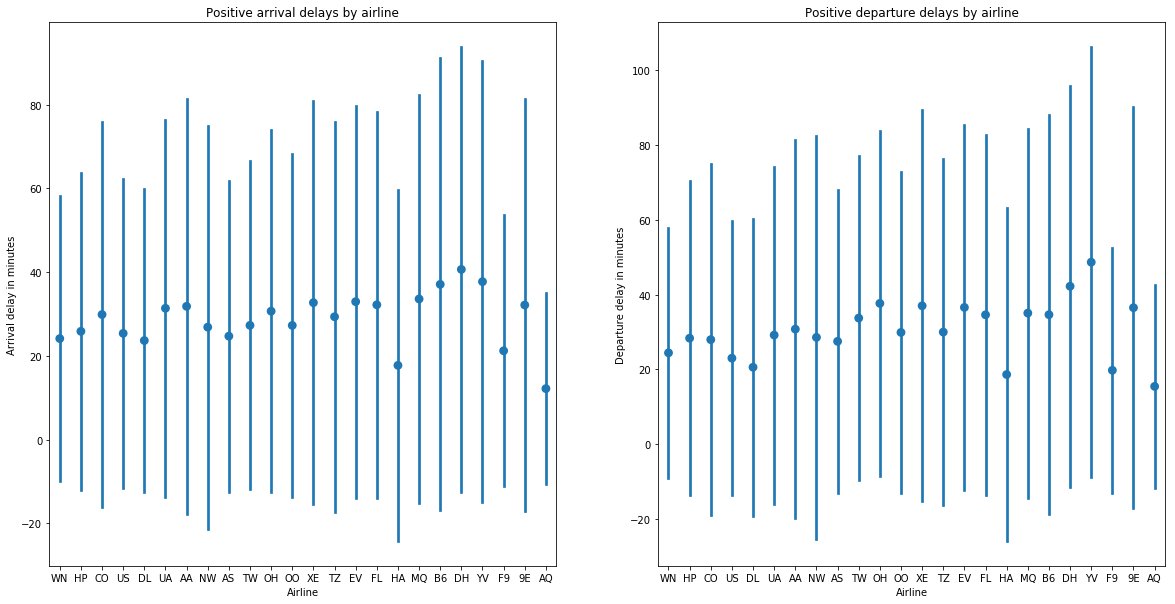

In [164]:
# create pointplots of arrival and departure delay by airline with real delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_posAD, x='UniqueCarrier', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay in minutes')
plt.title('Positive arrival delays by airline')
plt.xlabel('Airline')
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_posDD, x='UniqueCarrier', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay in minutes')
plt.title('Positive departure delays by airline')
plt.xlabel('Airline');

**Discussion**

**In addition to the boxplot's Hawaian and Aloha Airlines also Frontier Airlines(F9) has a low average delay. The data are not significantly different according to the plots. Some airlines seem to manage their delay times better than others independend of the frequency of flights.**

### 19) Origin and departure delay

**Discussion**

**There are too many airports to visualize the departure delays in an appropriate manner. But I will create a data frame with departure delays and flight frequency of the airports and plot those variables into a bivariate plot to see if there is some pattern to be found.**

In [165]:
# see which airports have the highest and lowest departure delays
df_grouped_origin_del = df_cct.groupby('Origin')['DepDelay'].mean()

In [166]:
# flight frequency of the airports
df_grouped_origin_count = df_cct.groupby('Origin')['DepDelay'].count()

In [167]:
# create data frame to join second variable
df = pd.DataFrame(df_grouped_origin_del)

In [168]:
# join data
df_group_master = df.join(df_grouped_origin_count, lsuffix='_', rsuffix='_NoOfFlights')

In [169]:
# inspect data
df_group_master.head()

,DepDelay_,DepDelay_NoOfFlights
Origin,,
ABE,6.109446,16684
ABI,5.120386,5391
ABQ,7.734624,112384
ABY,9.395464,2425
ACK,24.866873,646


In [170]:
# sort  values for departure delay in descending order
df_group_master.sort_values(by=['DepDelay_'], ascending=False, inplace=True)

In [171]:
# inspect data
df_group_master.head(50)

,DepDelay_,DepDelay_NoOfFlights
Origin,,
FMN,240.000000,1
OGD,188.500000,4
PUB,65.500000,4
ADK,34.974194,155
SPI,27.511247,978
ACK,24.866873,646
PIR,22.800000,5
OTH,21.656566,495
LMT,21.387931,464


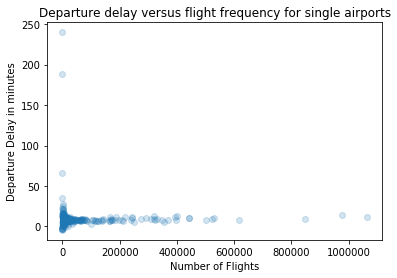

In [172]:
# scatterplot of DepDelay versus number of flights
sns.regplot(data=df_group_master, x='DepDelay_NoOfFlights', y='DepDelay_', scatter_kws={'alpha': 0.2}, fit_reg=False );
plt.xlabel('Number of Flights')
plt.ylabel('Departure Delay in minutes')
plt.title('Departure delay versus flight frequency for single airports');

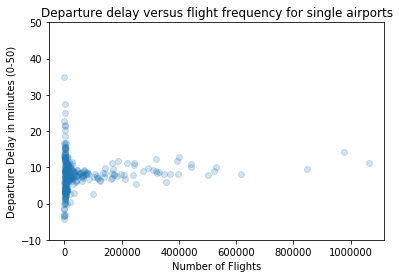

In [173]:
# scatterplot of DepDelay versus number of flights with restrictions on y axis
sns.regplot(data=df_group_master, x='DepDelay_NoOfFlights', y='DepDelay_', scatter_kws={'alpha': 0.2}, fit_reg=False )
plt.ylim(-10, 50);
plt.xlabel('Number of Flights')
plt.ylabel('Departure Delay in minutes (0-50)')
plt.title('Departure delay versus flight frequency for single airports');

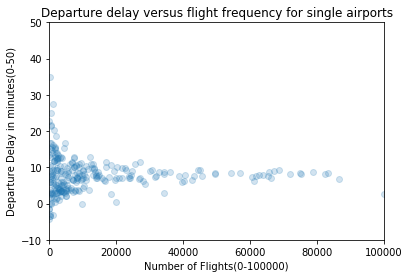

In [174]:
# scatterplot of DepDelay versus number of flights with restrictions on y and x axis
sns.regplot(data=df_group_master, x='DepDelay_NoOfFlights', y='DepDelay_', scatter_kws={'alpha': 0.2}, fit_reg=False )
plt.ylim(-10, 50)
plt.xlim(-10, 100000)
plt.xlabel('Number of Flights(0-100000)')
plt.ylabel('Departure Delay in minutes(0-50)')
plt.title('Departure delay versus flight frequency for single airports');

**Discussion**

**The airports with the highest departure delays are those with only a very low frequency of flights. Flight frequency of an airport does not seem to increase departure delays. Within airports that have similar flight frequencies however the difference in delay times is huge.**

### 20) Destination and arrival delay

**Discussion**

**Also here I will take the same approach as for the origin and departure delay data.**

In [175]:
# see which airports have the highest and lowest arrival delays
df_grouped_dest_del = df_cct.groupby('Dest')['ArrDelay'].mean()

In [176]:
# flight frequency of the dest airports
df_grouped_dest_count = df_cct.groupby('Dest')['ArrDelay'].count()

In [177]:
# create data frame to join second variable
df_1 = pd.DataFrame(df_grouped_dest_del)

In [178]:
# join data
df_group_master1 = df_1.join(df_grouped_dest_count, lsuffix='_', rsuffix='_NoOfFlights')

In [179]:
# inspect data
df_group_master1.head()

,ArrDelay_,ArrDelay_NoOfFlights
Dest,,
ABE,7.820890,17185
ABI,7.269477,5622
ABQ,6.695849,113299
ABY,6.663666,2444
ACK,19.596626,652


In [180]:
# sort  values for departure delay in descending order
df_group_master1.sort_values(by=['ArrDelay_'], ascending=False, inplace=True)

In [181]:
# inspect data
df_group_master1.head(50)

,ArrDelay_,ArrDelay_NoOfFlights
Dest,,
MQT,36.076056,1420
PVU,28.000000,2
OTH,26.792339,496
SPI,22.402052,1072
ACK,19.596626,652
YAK,16.797553,1798
CMI,16.579297,5574
LMT,16.343496,492
HHH,16.300000,790


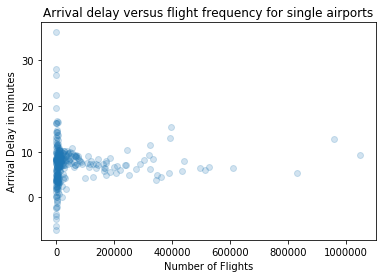

In [182]:
# scatterplot of ArrDelay versus number of flights
sns.regplot(data=df_group_master1, x='ArrDelay_NoOfFlights', y='ArrDelay_', scatter_kws={'alpha': 0.2}, fit_reg=False );
plt.xlabel('Number of Flights')
plt.ylabel('Arrival Delay in minutes')
plt.title('Arrival delay versus flight frequency for single airports');

**Discussion**

**The airports with the highest arrival delays are those with only a very low frequency of flights. Flight frequency of an airport does not seem to increase arrival delays. Also for arrival delays the difference between airports with similar flight frequencies is huge.**

### 21) Distance and arrival and departure delay

**Discussion**

**As distance is a continous quantitative variable I will create a range variable which summarizes distances according to the 5 number statistic.**

In [183]:
# statistic to get values for bin edges
df_cct['Distance'].describe()

count    1.883095e+07
mean     7.275627e+02
std      5.645938e+02
min      8.000000e+00
25%      3.230000e+02
50%      5.710000e+02
75%      9.540000e+02
max      4.962000e+03
Name: Distance, dtype: float64

In [184]:
# create bin edges and bin names
bin_edges = [8, 323, 571, 954, 4963]
bin_names = ['shortest_range', 'short_range', 'mid_range', 'long_range']

In [185]:
# create data for the range variable
df_cct['Range'] = pd.cut(df_cct['Distance'], bin_edges, labels=bin_names)

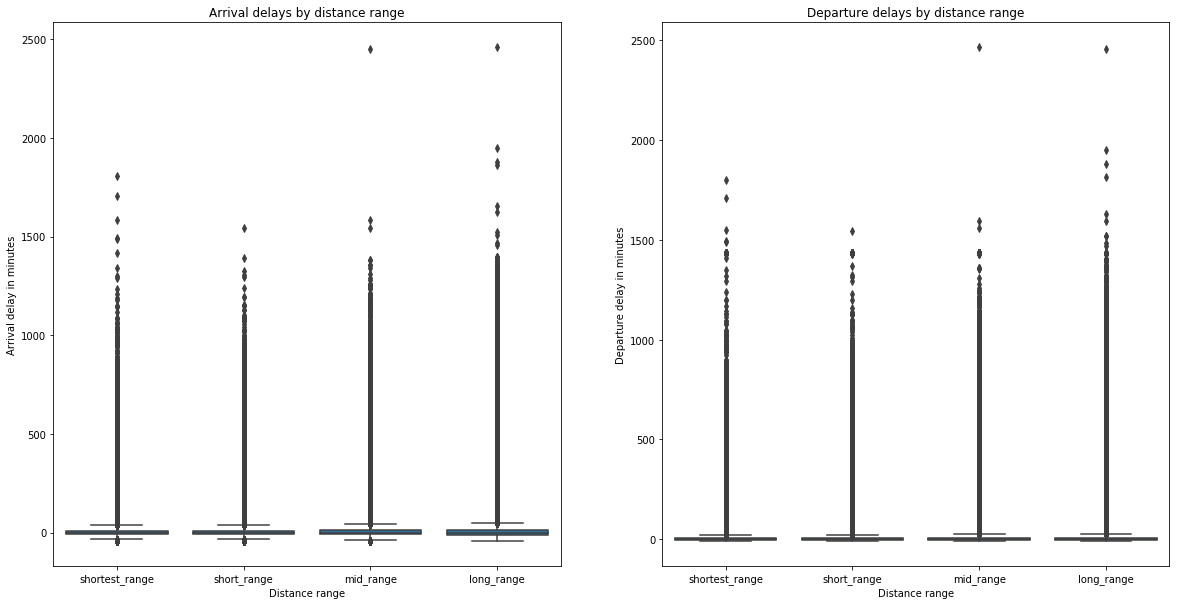

In [186]:
# boxplot for arrival delay and departure delay by distance range
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Range', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays by distance range')
plt.xlabel('Distance range')
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Range', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays by distance range')
plt.xlabel('Distance range');

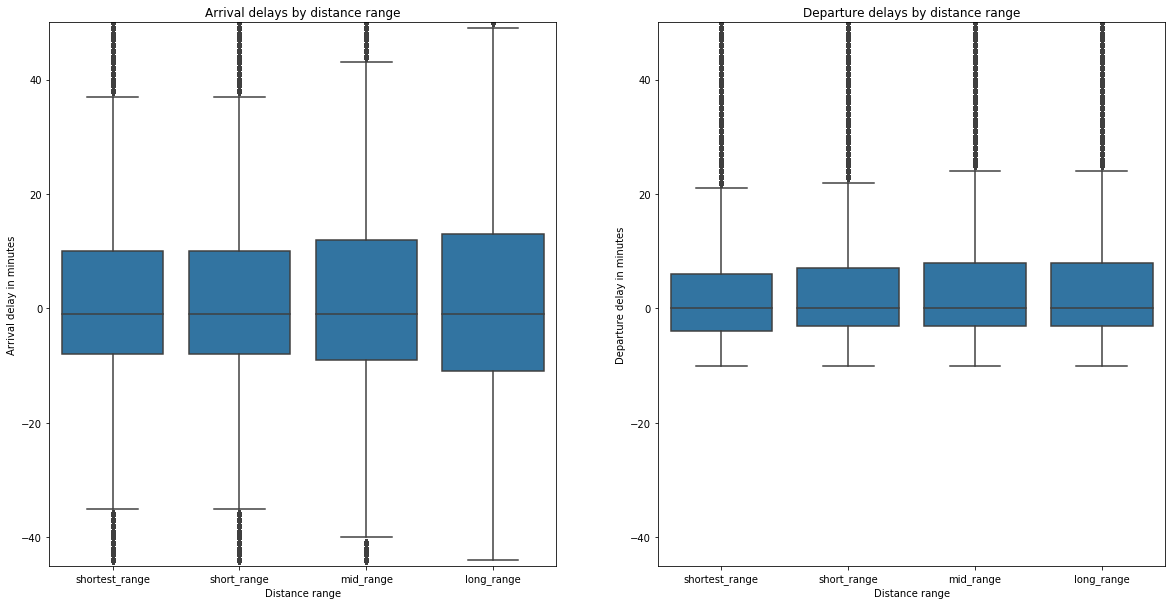

In [187]:
# boxplot for arrival delay and departure delay by distance range
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Range', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delays by distance range')
plt.xlabel('Distance range')
plt.ylim(-45, 50)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Range', y='DepDelay', color=base_color)
plt.ylabel('Departure delay in minutes')
plt.title('Departure delays by distance range')
plt.xlabel('Distance range')
plt.ylim(-45, 50);

In [188]:
# create real (= positive)  arrival delay data
df_cct_posAD = df_cct.query('ArrDelay > 0')

In [189]:
# create real (= positive) departure delay data
df_cct_posDD = df_cct.query('DepDelay > 0')

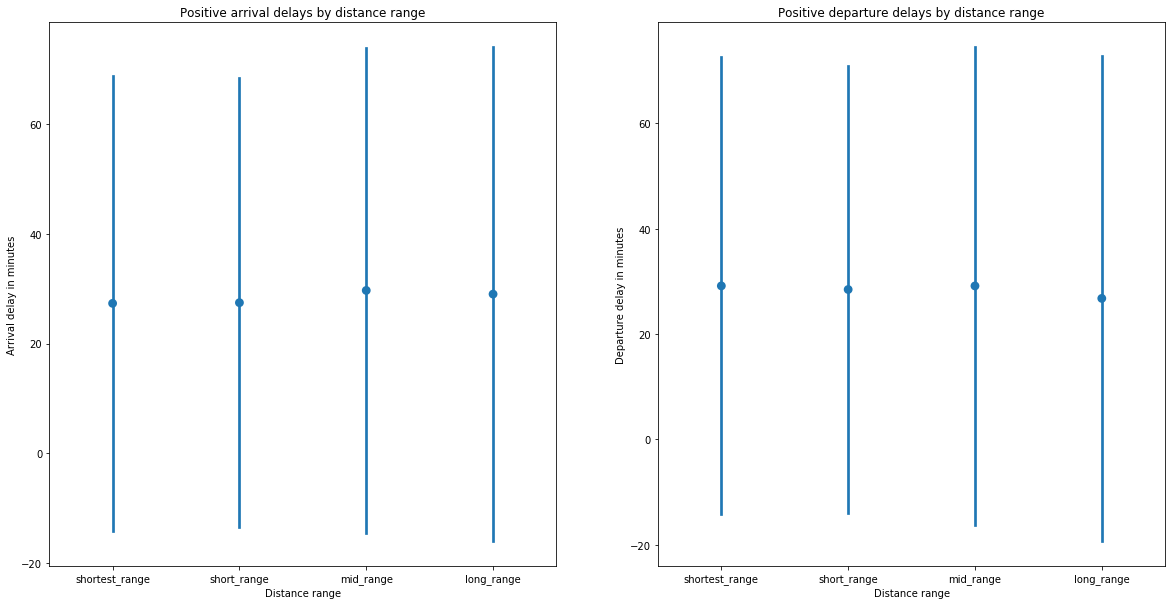

In [190]:
# create pointplots of arrival and departure delay by distance range with real (=positive) delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_posAD, x='Range', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay in minutes')
plt.title('Positive arrival delays by distance range')
plt.xlabel('Distance range')
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_posDD, x='Range', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay in minutes')
plt.title('Positive departure delays by distance range')
plt.xlabel('Distance range');

**Discussion**

**Also for different distance ranges there are no significant differences in arrival and departure delays. With increasing distances variability of the data gets higher IQR increases and therefore the probability of higher delays.**

### 22) Distance and unique carrier

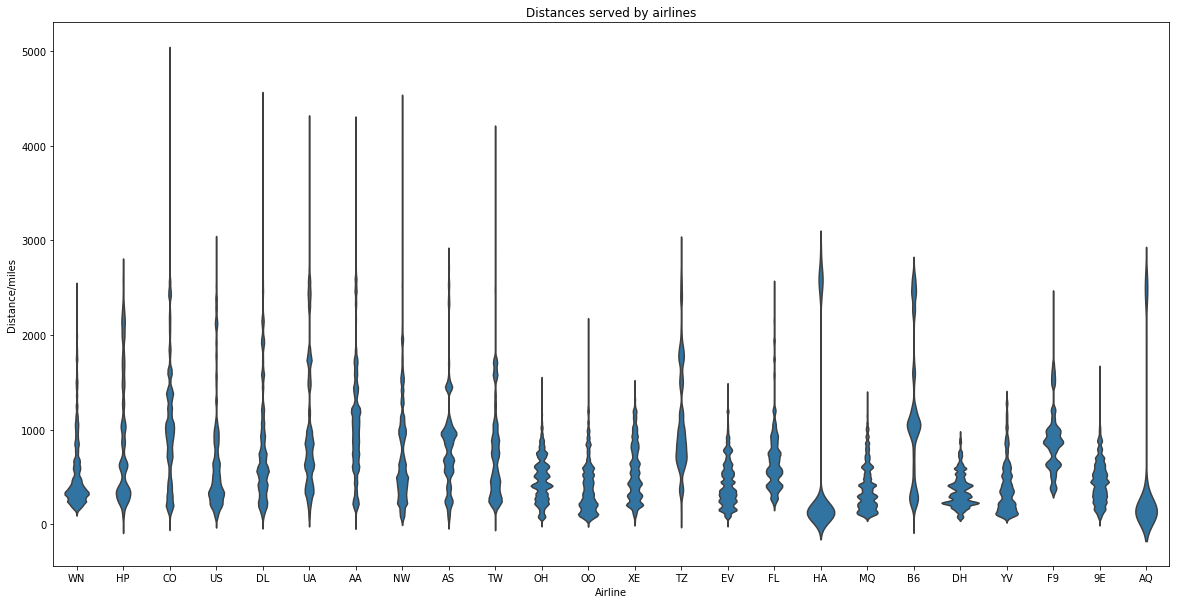

In [191]:
# create violinplot for visualizing which distances the single airlines serve predominantly
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.violinplot(data=df_cct, x='UniqueCarrier', y='Distance', inner=None, color=base_color)
plt.xlabel('Airline')
plt.ylabel('Distance/miles')
plt.title('Distances served by airlines');

**Discussion**

**Aloha and Hawaian Airlines do serve mostly shortest range distances but they do also have a substantial amount of long range flights. Nevertheless they seem to manage their delays quite well. Frontier airlines which has also a reasonable positive delay record serves predominantly mid to long range flights. Also this airline seems to manage the delays well. South West Airlines has flights in the shortest to mid range distance and according to the sheer number of flights in comparison to the other airlines also has a good grip on delays.**

### 23) Year and arrival and departure delays

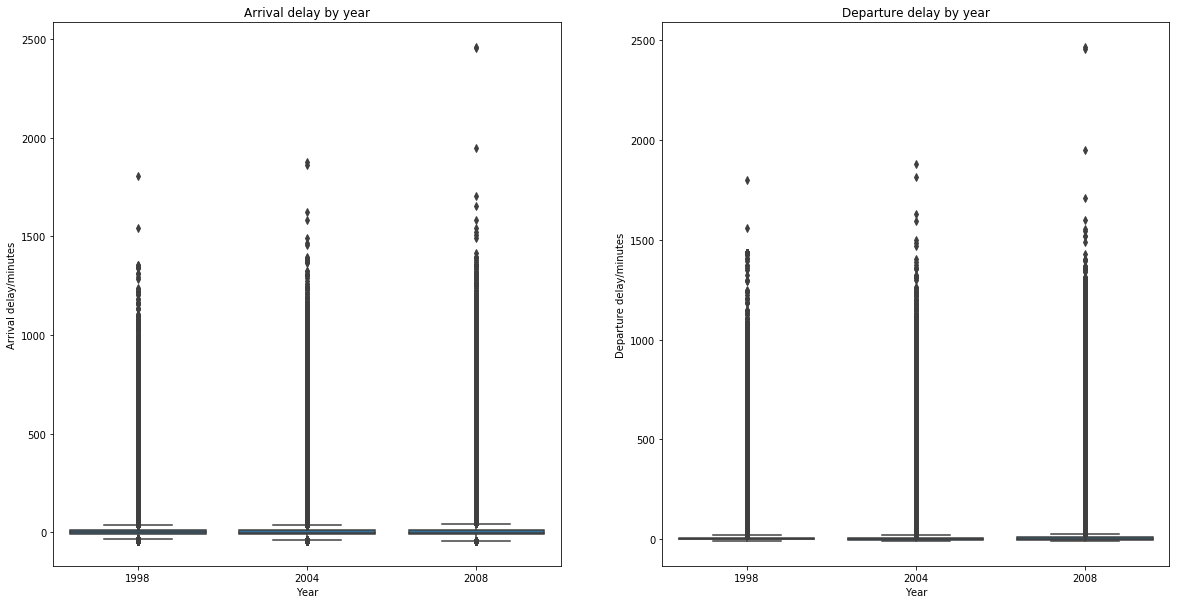

In [194]:
# boxplot for arrival delay and departure delay by year
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Year', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay/minutes')
plt.title('Arrival delay by year')
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Year', y='DepDelay', color=base_color)
plt.ylabel('Departure delay/minutes')
plt.title('Departure delay by year');

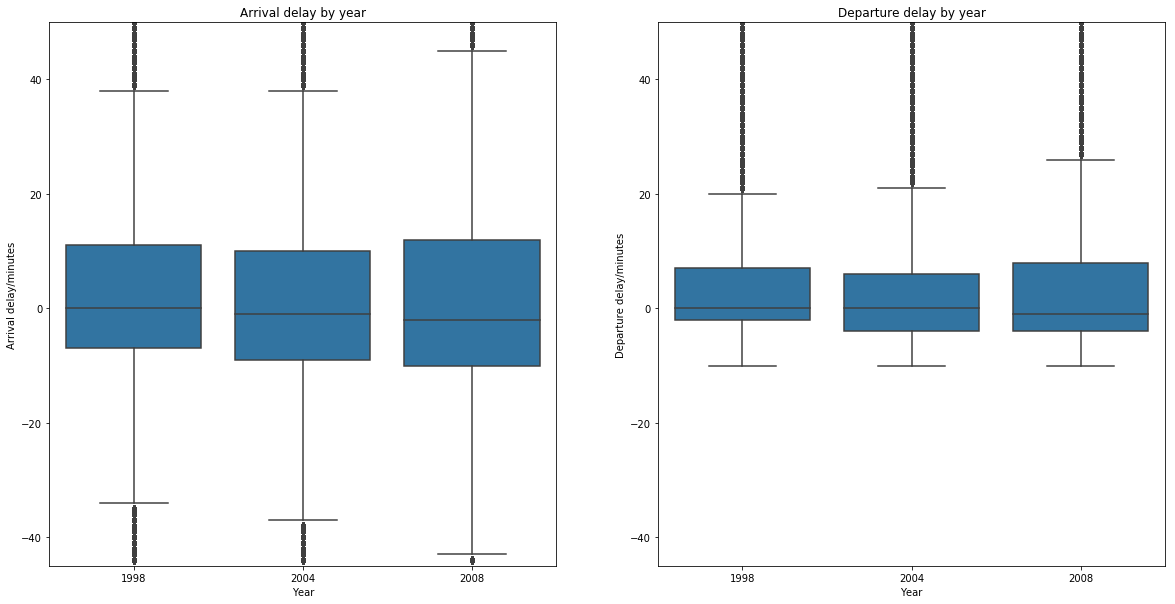

In [195]:
# boxplot for arrival delay and departure delay by year
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='Year', y='ArrDelay', color=base_color)
plt.ylabel('Arrival delay/minutes')
plt.title('Arrival delay by year')
plt.ylim(-45, 50)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='Year', y='DepDelay', color=base_color)
plt.ylabel('Departure delay/minutes')
plt.title('Departure delay by year')
plt.ylim(-45, 50);

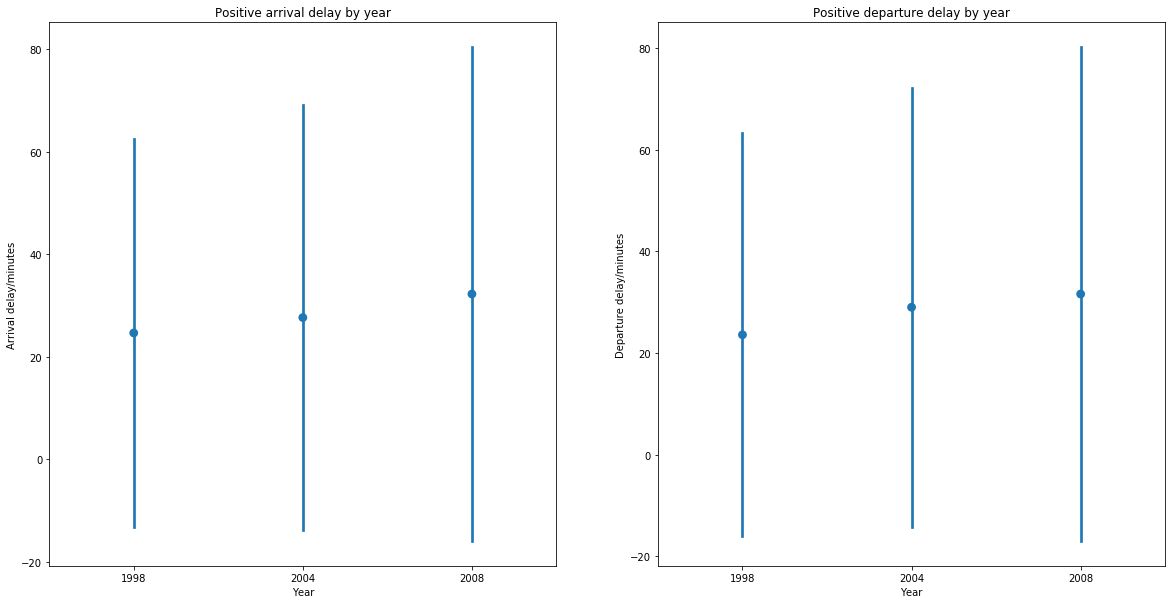

In [196]:
# create pointplots of arrival and departure delay by year with real (=positive) delay data only
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.pointplot(data=df_cct_posAD, x='Year', y='ArrDelay', ci='sd', linestyles='');
plt.ylabel('Arrival delay/minutes')
plt.title('Positive arrival delay by year')
plt.subplot(1,2,2)
sns.pointplot(data=df_cct_posDD, x='Year', y='DepDelay', ci='sd', linestyles='');
plt.ylabel('Departure delay/minutes')
plt.title('Positive departure delay by year');

In [197]:
# flight frequency of different years
df_grouped_year = df_cct.groupby('Year')['ArrDelay'].count()

In [198]:
# inspect data
df_grouped_year

Year
1998    5215660
2004    6892121
2008    6723171
Name: ArrDelay, dtype: int64

**Discussion**

**Real (=positive) delays seem to increase over the years although flight frequency does not. Only the number of flights does not explain delay records.** 

### 24) Year and carrier delay

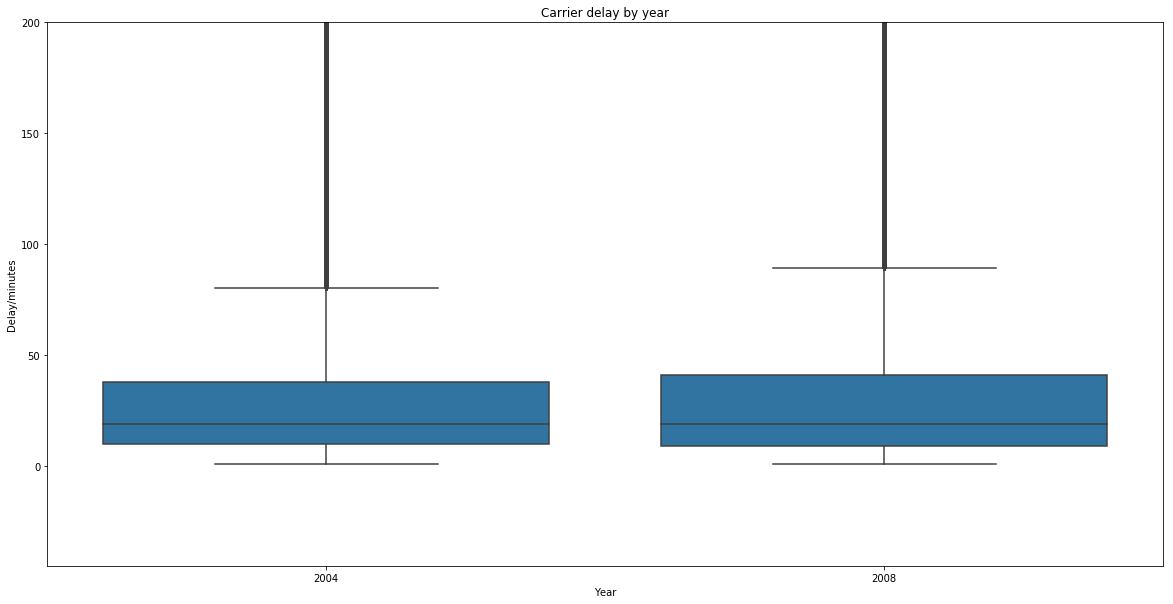

In [199]:
# boxplot for carrier delay by year
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_pos, x='Year', y='CarrierDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Carrier delay by year')
plt.ylim(-45, 200);

**Discussion**

**There seems to be no difference in carrier delay records for the given years.**

### 25) Year and late aircraft delay

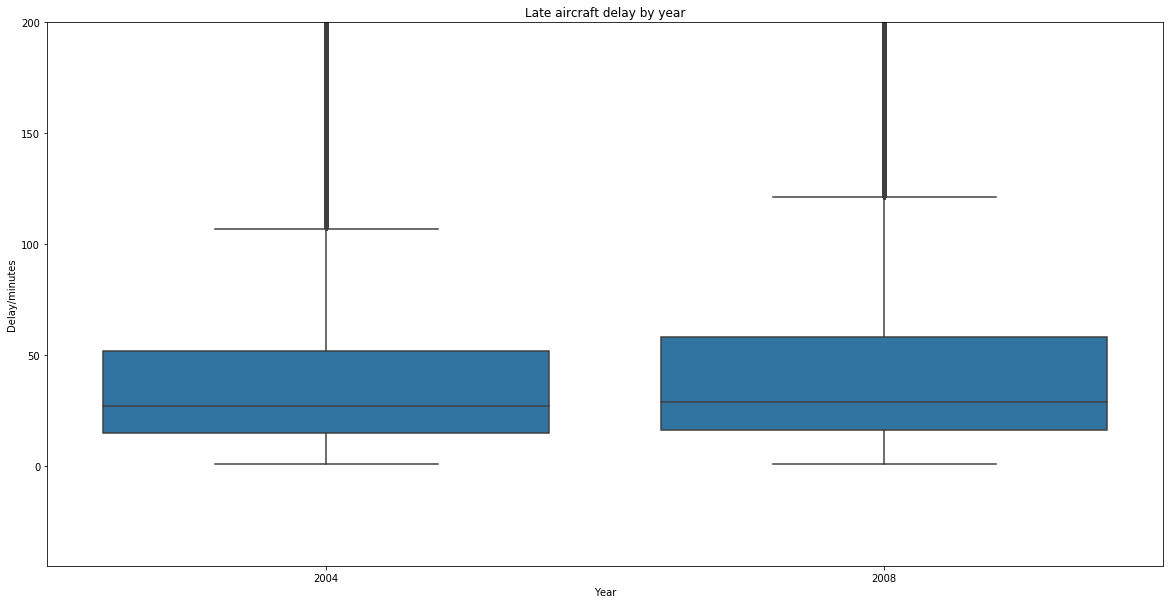

In [200]:
# boxplot for late aircraft delay by year
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_posa, x='Year', y='LateAircraftDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Late aircraft delay by year')
plt.ylim(-45, 200);

**Discussion**

**Late aircraft delays have increased slightly between the given years.**

### 26) Year and weather delay

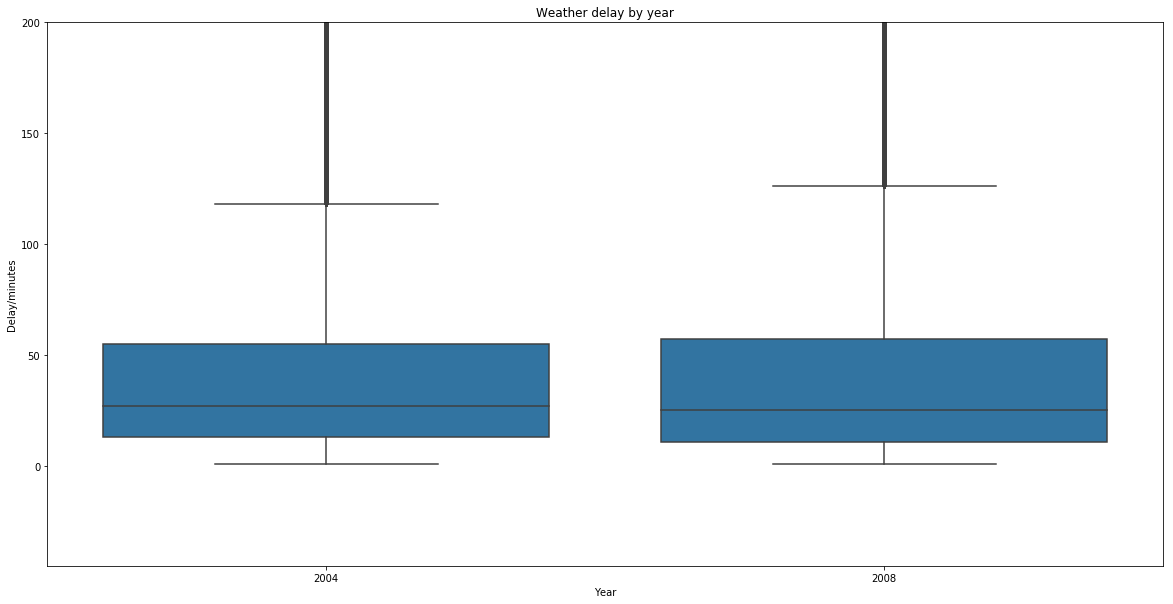

In [201]:
# boxplot for weather delay by year
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_posw, x='Year', y='WeatherDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Weather delay by year')
plt.ylim(-45, 200);

**Discussion**

**There seems to be no difference in carrier delay records for the given years.**

### 27) Unique carrier and carrier delay

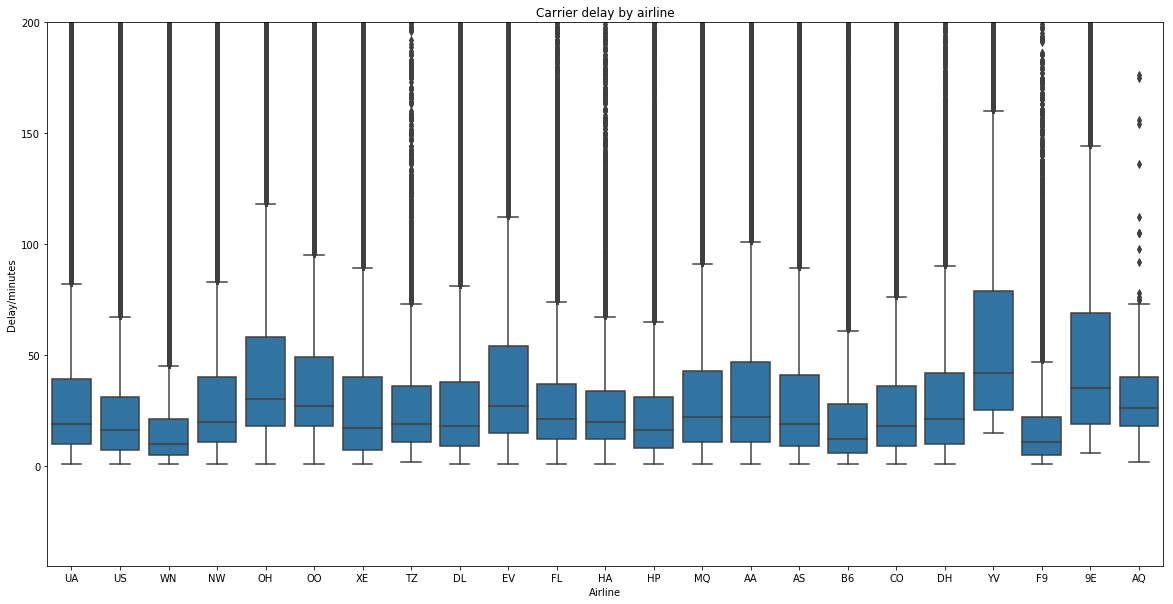

In [202]:
# boxplot for carrier delay by airline
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_pos, x='UniqueCarrier', y='CarrierDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Carrier delay by airline')
plt.xlabel('Airline')
plt.ylim(-45, 200);

**Discussion**

**Southwest Airline and Frontier Airline seem to manage carrier delay i.e. the kind of delay they can influence best. The airline doing the worst job is Mesa Airlines(YV).**

### 28) Unique carrier and late aircraft delay

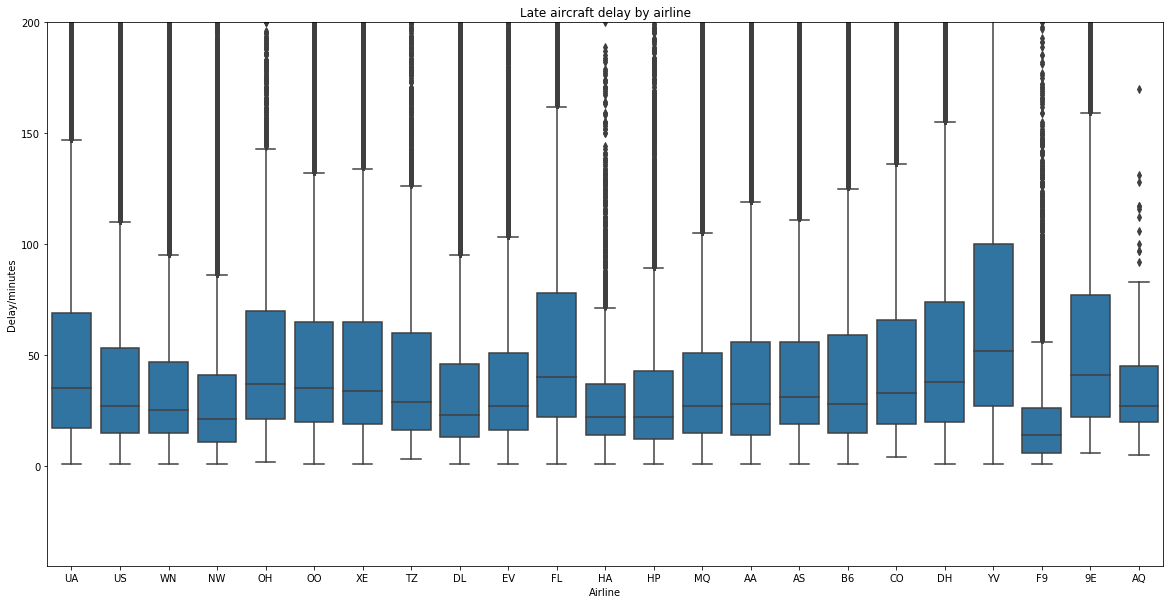

In [203]:
# boxplot for late aircraft delay by airline
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_posa, x='UniqueCarrier', y='LateAircraftDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Late aircraft delay by airline')
plt.xlabel('Airline')
plt.ylim(-45, 200);

**Discussion**

**The best performance for this variable is done by Hawaian, Aloha and Frontier Airline.**

### 29) Unique carrier and weather delay

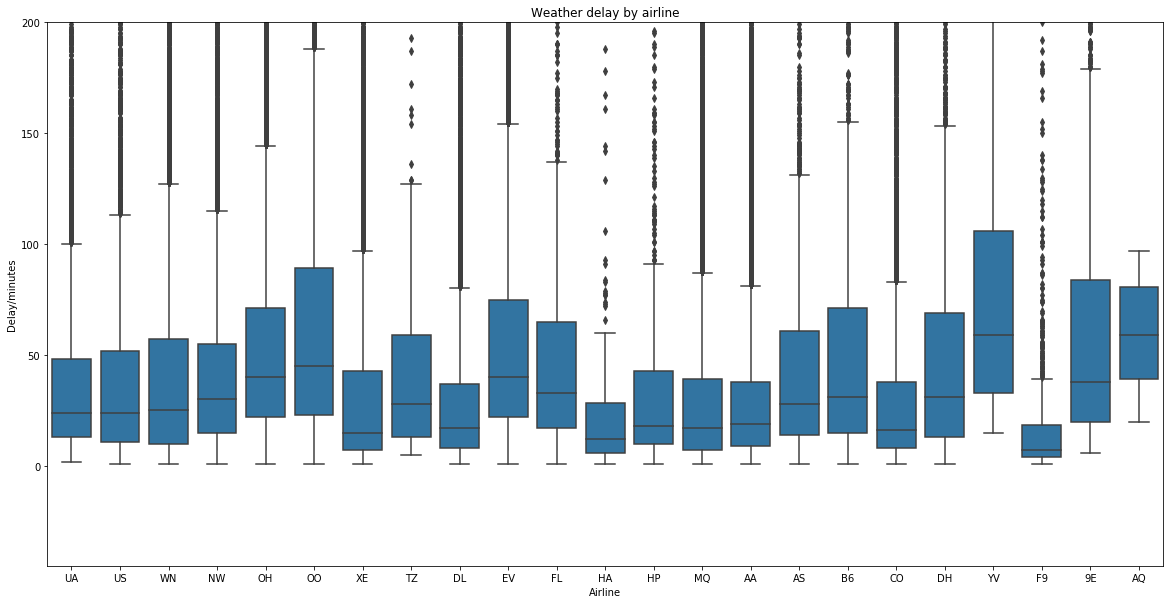

In [204]:
# boxplot for weather delay by airline
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_cct_0408_posw, x='UniqueCarrier', y='WeatherDelay', color=base_color)
plt.ylabel('Delay/minutes')
plt.title('Weather delay by airline')
plt.xlabel('Airline')
plt.ylim(-45, 200);

**Discussion**

**Weather delay data differ more than I would have expected. Frontier airlines and Hawaian Airlines report the least influence of weather on their flights.**

### 30) Unique carrier and percantage of flights delayed

In [205]:
# create an indicator column for  arrival delays
df_cct['Delayed'] = df_cct['ArrDelay'].apply(lambda x: x>0)

In [206]:
# inspect data
df_cct.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,...,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Weekday,Range,Delayed
0,1998,1,17,6,715,840,WN,76,N520,0.0,...,3,5,NaN,NaN,NaN,NaN,NaN,Saturday,mid_range,False
1,1998,1,18,7,715,840,WN,76,N302,-10.0,...,2,6,NaN,NaN,NaN,NaN,NaN,Sunday,mid_range,False
2,1998,1,19,1,715,840,WN,76,N315,-9.0,...,3,5,NaN,NaN,NaN,NaN,NaN,Monday,mid_range,False
3,1998,1,20,2,715,840,WN,76,N372,-4.0,...,3,12,NaN,NaN,NaN,NaN,NaN,Tuesday,mid_range,False
4,1998,1,21,3,715,840,WN,76,N367,-4.0,...,3,6,NaN,NaN,NaN,NaN,NaN,Wednesday,mid_range,False


In [207]:
# create dataframe with True and False columns
df_prop = df_cct.groupby(['UniqueCarrier', 'Delayed']).size().unstack()

In [208]:
# create Unique carrier column
df_prop.reset_index(inplace=True)

In [209]:
# create total number of flights column
df_prop['AllFlights'] = df_prop[False] + df_prop[True]

In [210]:
# inspect data
df_prop

Delayed,UniqueCarrier,False,True,AllFlights
0,WN,1710177,1258654,2968831
1,HP,165746,223678,389424
2,CO,515502,457832,973334
3,US,879851,639598,1519449
4,DL,1015191,981469,1996660
5,UA,897306,799137,1696443
6,AA,1042566,849251,1891817
7,NW,693469,607305,1300774
8,AS,210214,228880,439094
9,TW,145187,121155,266342


In [211]:
# create a column with percentage delay data
df_prop['PercDelay'] = (df_prop[True]/df_prop['AllFlights'])*100

In [213]:
# sort delay percentages in descending order
df_prop.sort_values('PercDelay', ascending=False)

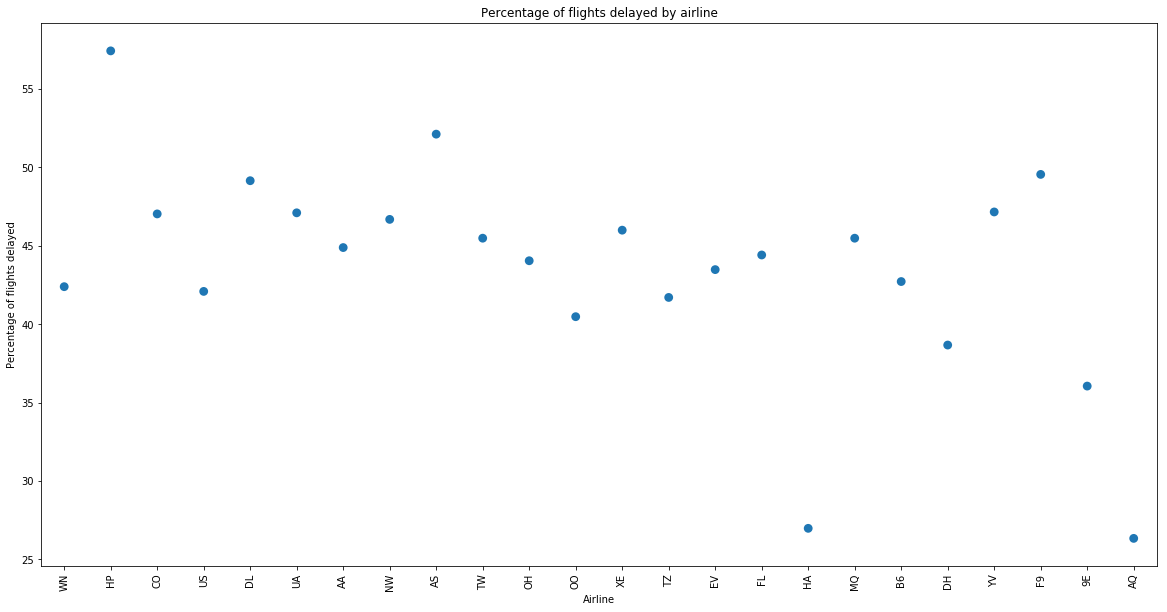

In [214]:
# create pointplots of percentage arrival delays by unique carrier
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.pointplot(data=df_prop, x='UniqueCarrier', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by airline')
plt.xlabel('Airline')
plt.xticks(rotation=90);

**Discussion**

**As there are big differences between the airlines I want to see if these differences might come from change over time so that I have to investigate the single airlines over the years. To do that I will just plot the percentage of delays over the years.**

In [306]:
# create dataframe with True and False columns
df_prop_year = df_cct.groupby(['Year', 'Delayed']).size().unstack()

In [307]:
# reset index
df_prop_year.reset_index(inplace=True)

In [308]:
# create column labels
new_labels1 = ['Year', 'Ontime', 'Delayed']

In [309]:
# change column names
df_prop_year.columns = new_labels1

In [310]:
# create total number of flights column
df_prop_year['AllFlights'] = df_prop_year['Ontime'] + df_prop_year['Delayed']

In [311]:
df_prop_year['PercDelay'] = (df_prop_year['Delayed']/df_prop_year['AllFlights'])*100

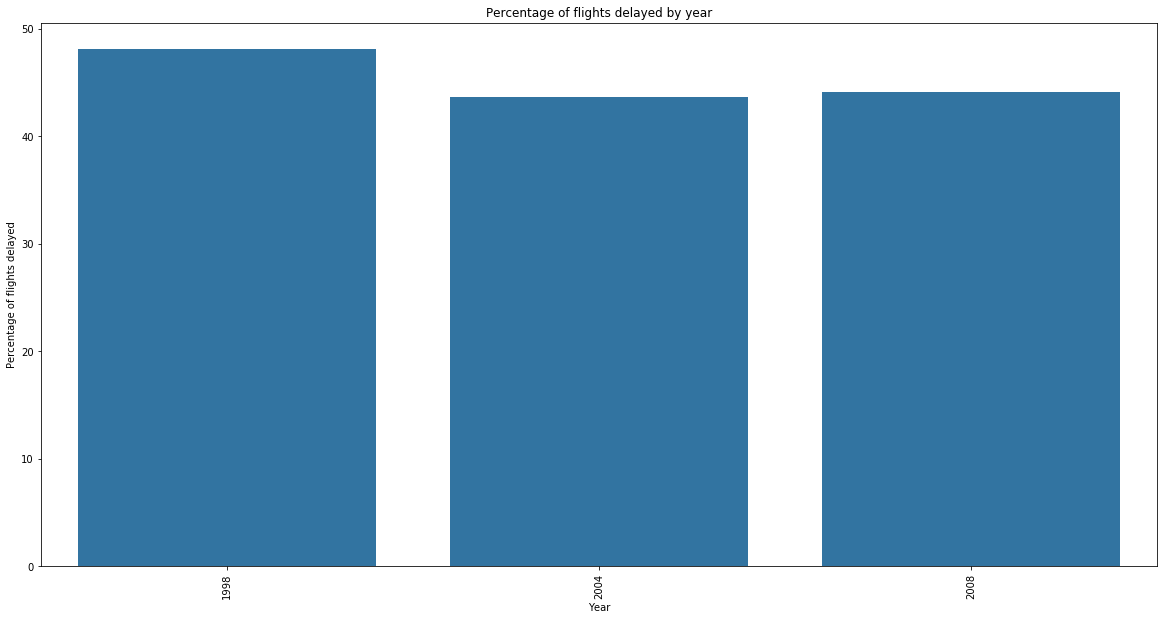

In [314]:
# create pointplots of percentage arrival delays by unique carrier
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.barplot(data=df_prop_year, x='Year', y='PercDelay', color=base_color);
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by year')
plt.xlabel('Year')
plt.xticks(rotation=90);

**Discussion**

**There is quite a variability in the percentage of flights delayed for the single airlines.Some airlines have double the flights delayed than others. This is an example that certain issues are not discovered by simply applying descriptive statistics like box plots. In the 5 number statistic we just see a summary of the given data which are the same no matter from how many different datapoints these data were derived. The difference in the percentage of delays between the years is rather small so that I will not investigate percentage of delays for single airlines over the years in more detail.**

**Now I want to test how these numbers change if we apply the 15 minutes rule.**

In [215]:
# create an indicator column for  arrival delays 15 minutes definition
df_cct['Delayed_15'] = df_cct['ArrDelay'].apply(lambda x: x>15)

In [216]:
# create dataframe with True and False columns
df_prop_15 = df_cct.groupby(['UniqueCarrier', 'Delayed_15']).size().unstack()

In [217]:
# create Unique carrier column
df_prop_15.reset_index(inplace=True)

In [218]:
# create total number of flights column
df_prop_15['AllFlights'] = df_prop_15[False] + df_prop_15[True]

In [219]:
# create a column with percentage delay data
df_prop_15['PercDelay'] = (df_prop_15[True]/df_prop_15['AllFlights'])*100

In [220]:
# sort delay percentages in descending order
df_prop_15.sort_values('PercDelay', ascending=False)

Delayed_15,UniqueCarrier,False,True,AllFlights,PercDelay
1,HP,291106,98318,389424,25.247032
20,YV,176148,56883,233031,24.410057
17,MQ,695382,216586,911968,23.749298
18,B6,212657,62415,275072,22.690423
19,DH,195110,56491,251601,22.452613
8,AS,340629,98465,439094,22.424583
12,XE,551214,158598,709812,22.343663
5,UA,1317741,378702,1696443,22.323296
14,EV,417799,119660,537459,22.264024
10,OH,425951,117672,543623,21.645883


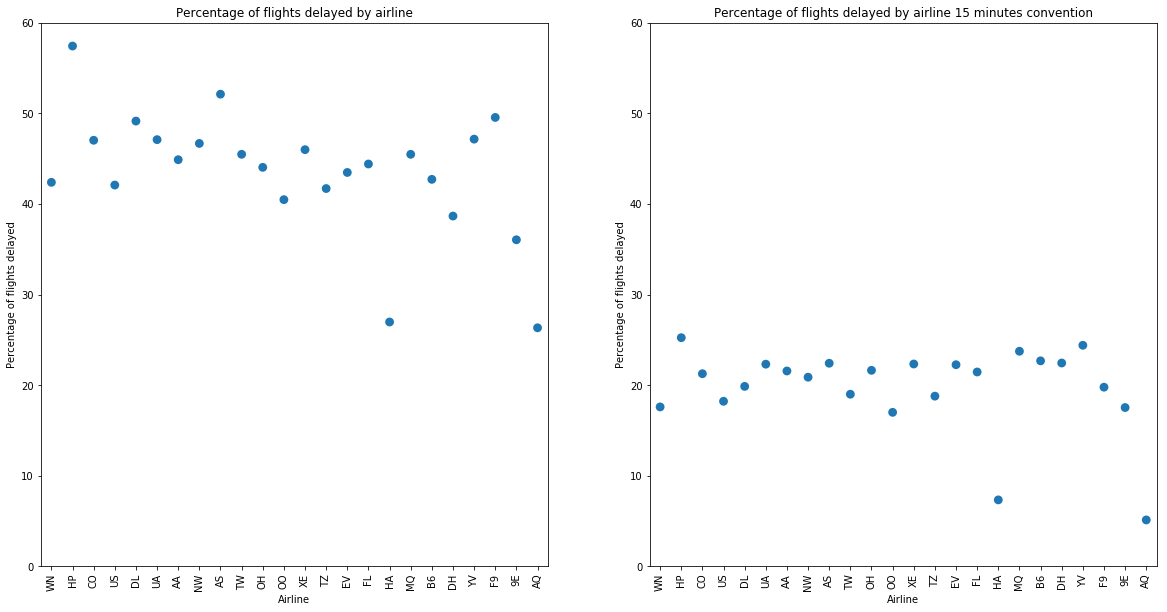

In [221]:
# create pointplots of percentage arrival delays by unique carrier
plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.pointplot(data=df_prop, x='UniqueCarrier', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by airline')
plt.xlabel('Airline')
plt.ylim(0, 60)
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.pointplot(data=df_prop_15, x='UniqueCarrier', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by airline 15 minutes convention')
plt.xlabel('Airline')
plt.ylim(0, 60)
plt.xticks(rotation=90);

**Discussion**

**Through the convention of regarding flights that are 15 minutes or less delayed as ontime the number that can be used for statistical evaluations can be reduced by a factor of more than 2.**

### 31) Origin airport and percentage of flights delayed

In [222]:
# create an indicator column for departure delays
df_cct['DepDel'] = df_cct['DepDelay'].apply(lambda x: x>0)

In [223]:
# create dataframe with True and False columns
df_prop_dep = df_cct.groupby(['Origin', 'DepDel']).size().unstack()

In [224]:
# create Origin column
df_prop_dep.reset_index(inplace=True)

In [225]:
# create total number of flights column
df_prop_dep['AllFlights'] = df_prop_dep[False] + df_prop_dep[True]

In [226]:
# inspect data
df_prop_dep

DepDel,Origin,False,True,AllFlights
0,ABE,12593.0,4091.0,16684.0
1,ABI,4316.0,1075.0,5391.0
2,ABQ,72210.0,40174.0,112384.0
3,ABY,1620.0,805.0,2425.0
4,ACK,313.0,333.0,646.0
5,ACT,4098.0,1010.0,5108.0
6,ACV,4546.0,2735.0,7281.0
7,ACY,863.0,256.0,1119.0
8,ADK,32.0,123.0,155.0
9,ADQ,905.0,919.0,1824.0


In [227]:
# create a column with percentage delay data
df_prop_dep['PercDelay'] = (df_prop_dep[True]/df_prop_dep['AllFlights'])*100

In [228]:
# sort delay percentages in descending order
df_prop_dep.sort_values('PercDelay', ascending=False, inplace=True)

In [229]:
# drop NaN values
df_prop_dep.dropna(inplace=True)

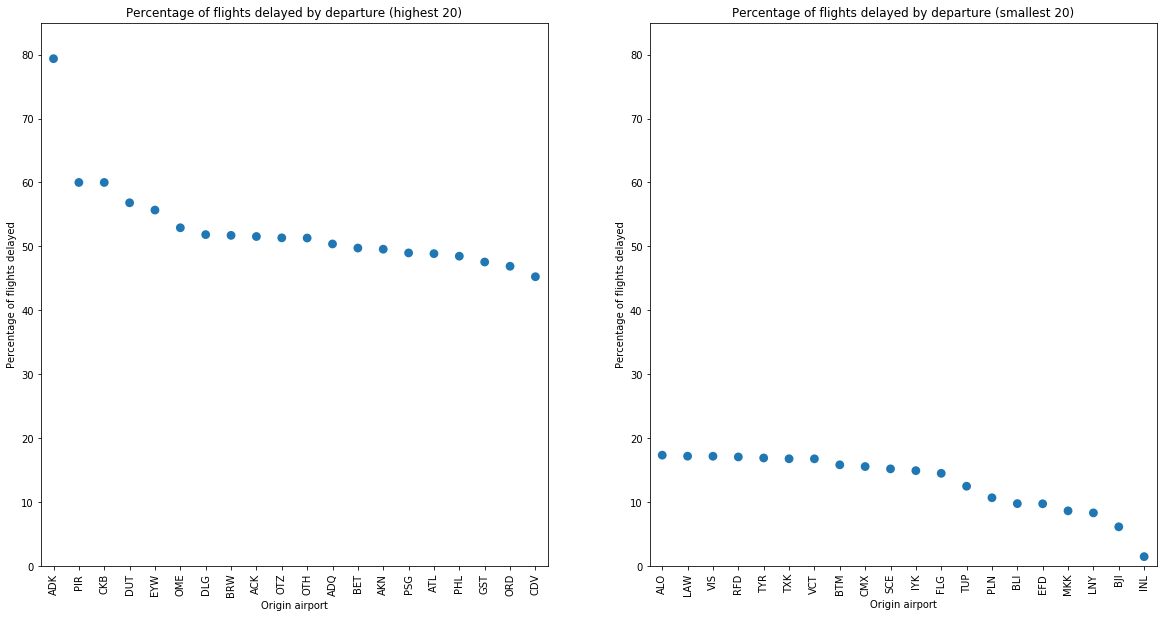

In [230]:
# create pointplots of percentage of departures delayed by airport
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.pointplot(data=df_prop_dep[:20], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure (highest 20)')
plt.xlabel('Origin airport')
plt.xticks(rotation=90)
plt.ylim(0, 85);
plt.subplot(1, 2, 2)
sns.pointplot(data=df_prop_dep[-20:], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure (smallest 20)')
plt.xticks(rotation=90)
plt.xlabel('Origin airport')
plt.ylim(0, 85);


**Discussion**

**There is a wide spread of delayed flights between airports. The worst working airport has almost 80 % delayed flights and the best working airport has almost no delays.**

**Now I am interested in how applying the 15 minutes rule changes the picture.**

In [231]:
# create an indicator column for departure delays
df_cct['DepDel_15'] = df_cct['DepDelay'].apply(lambda x: x>15)

In [232]:
# create dataframe with True and False columns
df_prop_dep_15 = df_cct.groupby(['Origin', 'DepDel_15']).size().unstack()

In [233]:
# create Origin column
df_prop_dep_15.reset_index(inplace=True)

In [234]:
# create total number of flights column
df_prop_dep_15['AllFlights'] = df_prop_dep_15[False] + df_prop_dep_15[True]

In [235]:
# create a column with percentage delay data
df_prop_dep_15['PercDelay'] = (df_prop_dep_15[True]/df_prop_dep_15['AllFlights'])*100

In [236]:
# sort delay percentages in descending order
df_prop_dep_15.sort_values('PercDelay', ascending=False, inplace=True)

In [237]:
# drop NaN values
df_prop_dep_15.dropna(inplace=True)

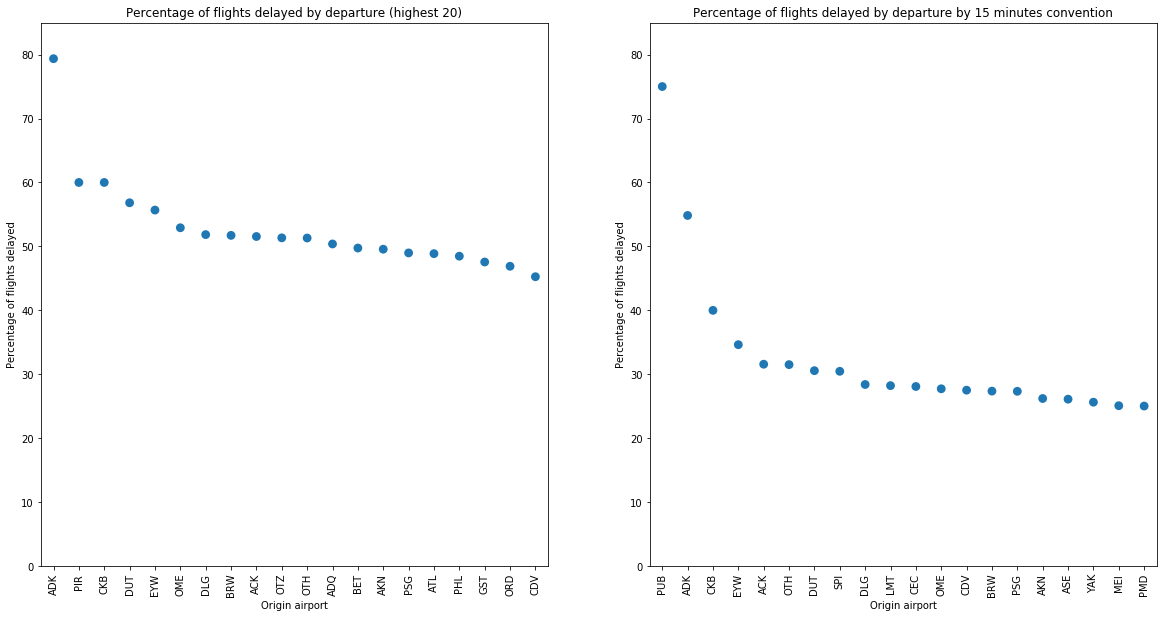

In [239]:
# create pointplots of percentage of departures delayed by airport
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.pointplot(data=df_prop_dep[:20], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure (highest 20)')
plt.xlabel('Origin airport')
plt.xticks(rotation=90)
plt.ylim(0, 85);
plt.subplot(1, 2, 2)
sns.pointplot(data=df_prop_dep_15[:20], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure by 15 minutes convention')
plt.xticks(rotation=90)
plt.xlabel('Origin airport')
plt.ylim(0, 85);


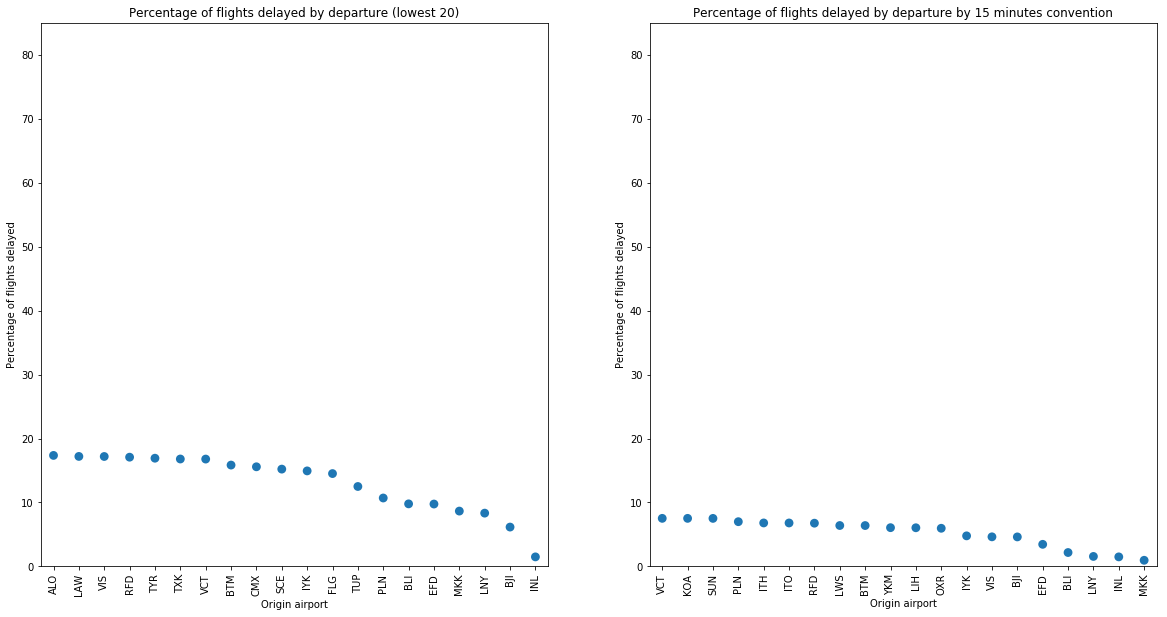

In [240]:
# create pointplots of percentage of departures delayed by airport
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.pointplot(data=df_prop_dep[-20:], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure (lowest 20)')
plt.xlabel('Origin airport')
plt.xticks(rotation=90)
plt.ylim(0, 85);
plt.subplot(1, 2, 2)
sns.pointplot(data=df_prop_dep_15[-20:], x='Origin', y='PercDelay', linestyles='');
plt.ylabel('Percentage of flights delayed')
plt.title('Percentage of flights delayed by departure by 15 minutes convention')
plt.xticks(rotation=90)
plt.xlabel('Origin airport')
plt.ylim(0, 85);


**Discussion**

**By applying the 15 minutes convention the effect is not as dramatic as with the airlines for some airports. For others it is pretty dramatic so that these are ranked lower and get better statistical evaluations regardsing delays. Others that were not in the top 20 are now among the airports with the largest delays. Applying the 15 minute rule changes the ranking in this case and not only the magnitude of percentage of delays.**

**PUB airport which I can find in my 15 minutes data is not present in the data for delays > 0 this is very strange and I cannot really explain this phenomenon but investigating this fact further is not within the scope of this project.**

### Multivariate Analysis

### 32) Unique carrier - origin - departure delay

**Create a dataframe with the mean delay time (positive or negative) for the flights of unique carriers at single airports that were intime or delayed.**

In [241]:
# create data frame with needed variables
df_prop1 = df_cct.groupby(['Origin','UniqueCarrier', 'DepDel'])['DepDelay'].mean().unstack()

In [242]:
# inspect data
df_prop1.head()

DepDel                   False      True 
Origin UniqueCarrier                     
ABE    US            -4.136913  27.747954
       DL            -4.013460  24.193359
       UA            -2.880000  31.282353
       NW            -4.220998  39.261905
       OH            -4.232359  46.320726

In [243]:
# reset index
df_prop1.reset_index(level='UniqueCarrier', inplace=True)

In [244]:
# inspect data proportion of departure delays
df_prop_dep.head()

DepDel,Origin,False,True,AllFlights,PercDelay
8,ADK,32.0,123.0,155.0,79.354839
234,PIR,2.0,3.0,5.0,60.000000
61,CKB,2.0,3.0,5.0,60.000000
90,DUT,250.0,329.0,579.0,56.822107
101,EYW,659.0,828.0,1487.0,55.682582


In [245]:
# create list with 20 airports with highest percentage of departure delays
df_hf_origin_list = df_prop_dep['Origin'][:20].tolist()

In [246]:
# inspect data
df_hf_origin_list

['ADK',
 'PIR',
 'CKB',
 'DUT',
 'EYW',
 'OME',
 'DLG',
 'BRW',
 'ACK',
 'OTZ',
 'OTH',
 'ADQ',
 'BET',
 'AKN',
 'PSG',
 'ATL',
 'PHL',
 'GST',
 'ORD',
 'CDV']

In [247]:
# create data frame that contain data from the airports with the highest departure delays
df_prop1_hf_origin = df_prop1[df_prop1.index.isin(df_hf_origin_list)]

In [248]:
# reset index
df_prop1_hf_origin.reset_index(inplace=True)

In [249]:
# inspect data
df_prop1_hf_origin.head()

DepDel,Origin,UniqueCarrier,False,True
0,ACK,CO,-3.181818,63.555556
1,ACK,OH,-1.276596,56.470588
2,ACK,XE,-4.306220,46.051163
3,ACK,B6,-5.086957,67.931034
4,ADK,AS,-4.750000,45.308943


In [250]:
# rename columns step 1
new_labels = ['Origin', 'UniqueCarrier', 'InTime', 'Delayed']

In [251]:
# rename columns step 2
df_prop1_hf_origin.columns = new_labels

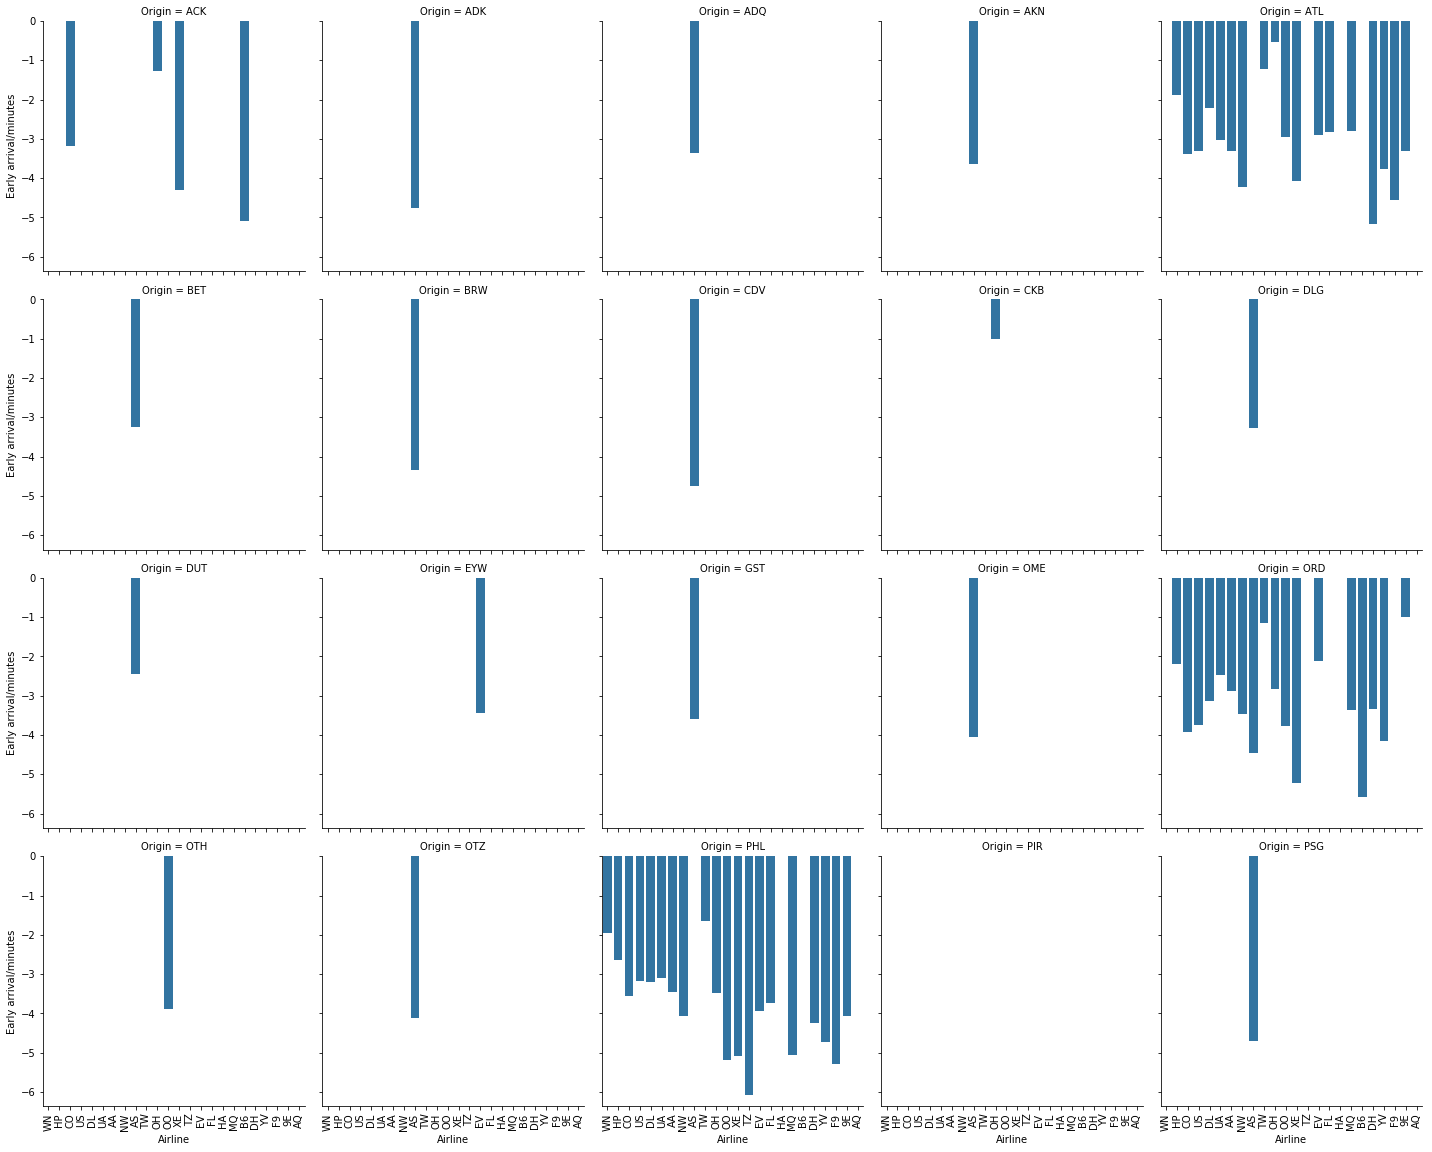

In [284]:
# create multi variate plot for ontime departures with highest percentage of delays
g = sns.FacetGrid(data = df_prop1_hf_origin, col='Origin', size = 4, col_wrap=5)
g.map(sns.barplot, 'UniqueCarrier', 'InTime')
g.set_xlabels('Airline')
g.set_ylabels('Early arrival/minutes')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

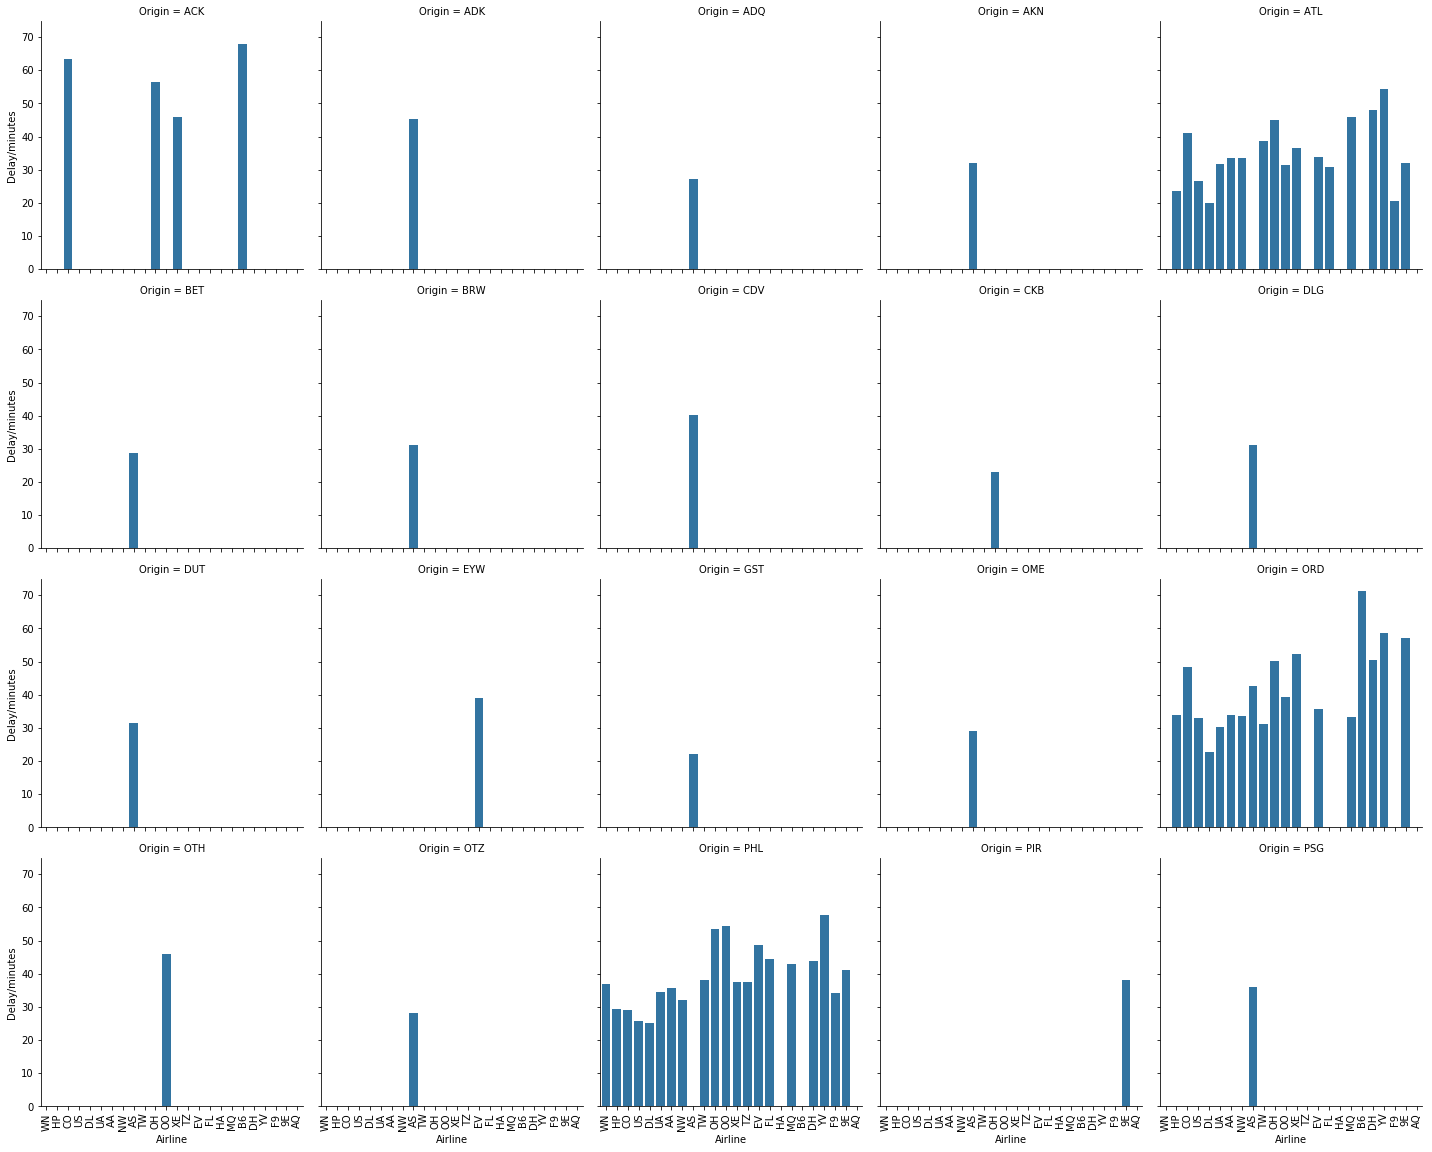

In [283]:
# create multi variate plot for delayed departures with highest percentage of delays
g = sns.FacetGrid(data = df_prop1_hf_origin, col='Origin', size = 4, col_wrap=5)
g.map(sns.barplot, 'UniqueCarrier', 'Delayed')
g.set_xlabels('Airline')
g.set_ylabels('Delay/minutes')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

In [261]:
# create list for the 20 airports with the smallest departure delays
df_lf_origin_list = df_prop_dep['Origin'][-20:].tolist()

In [262]:
# create dataframe containing the data of the 20 airports with the smallest departure delays
df_prop1_lf_origin = df_prop1[df_prop1.index.isin(df_lf_origin_list)]

In [263]:
# inspect data
df_prop1_lf_origin.head()

DepDel,UniqueCarrier,False,True
Origin,,,
ALO,9E,-3.726027,56.021739
BJI,9E,-5.032787,53.000000
BLI,OO,-5.722892,18.000000
BTM,OO,-2.850596,23.860000
CMX,9E,-4.472103,92.232558


In [264]:
# reset index
df_prop1_lf_origin.reset_index(inplace=True)

In [265]:
# inspect data
df_prop1_lf_origin.head()

DepDel,Origin,UniqueCarrier,False,True
0,ALO,9E,-3.726027,56.021739
1,BJI,9E,-5.032787,53.000000
2,BLI,OO,-5.722892,18.000000
3,BTM,OO,-2.850596,23.860000
4,CMX,9E,-4.472103,92.232558


In [266]:
# rename columns
df_prop1_lf_origin.columns = new_labels

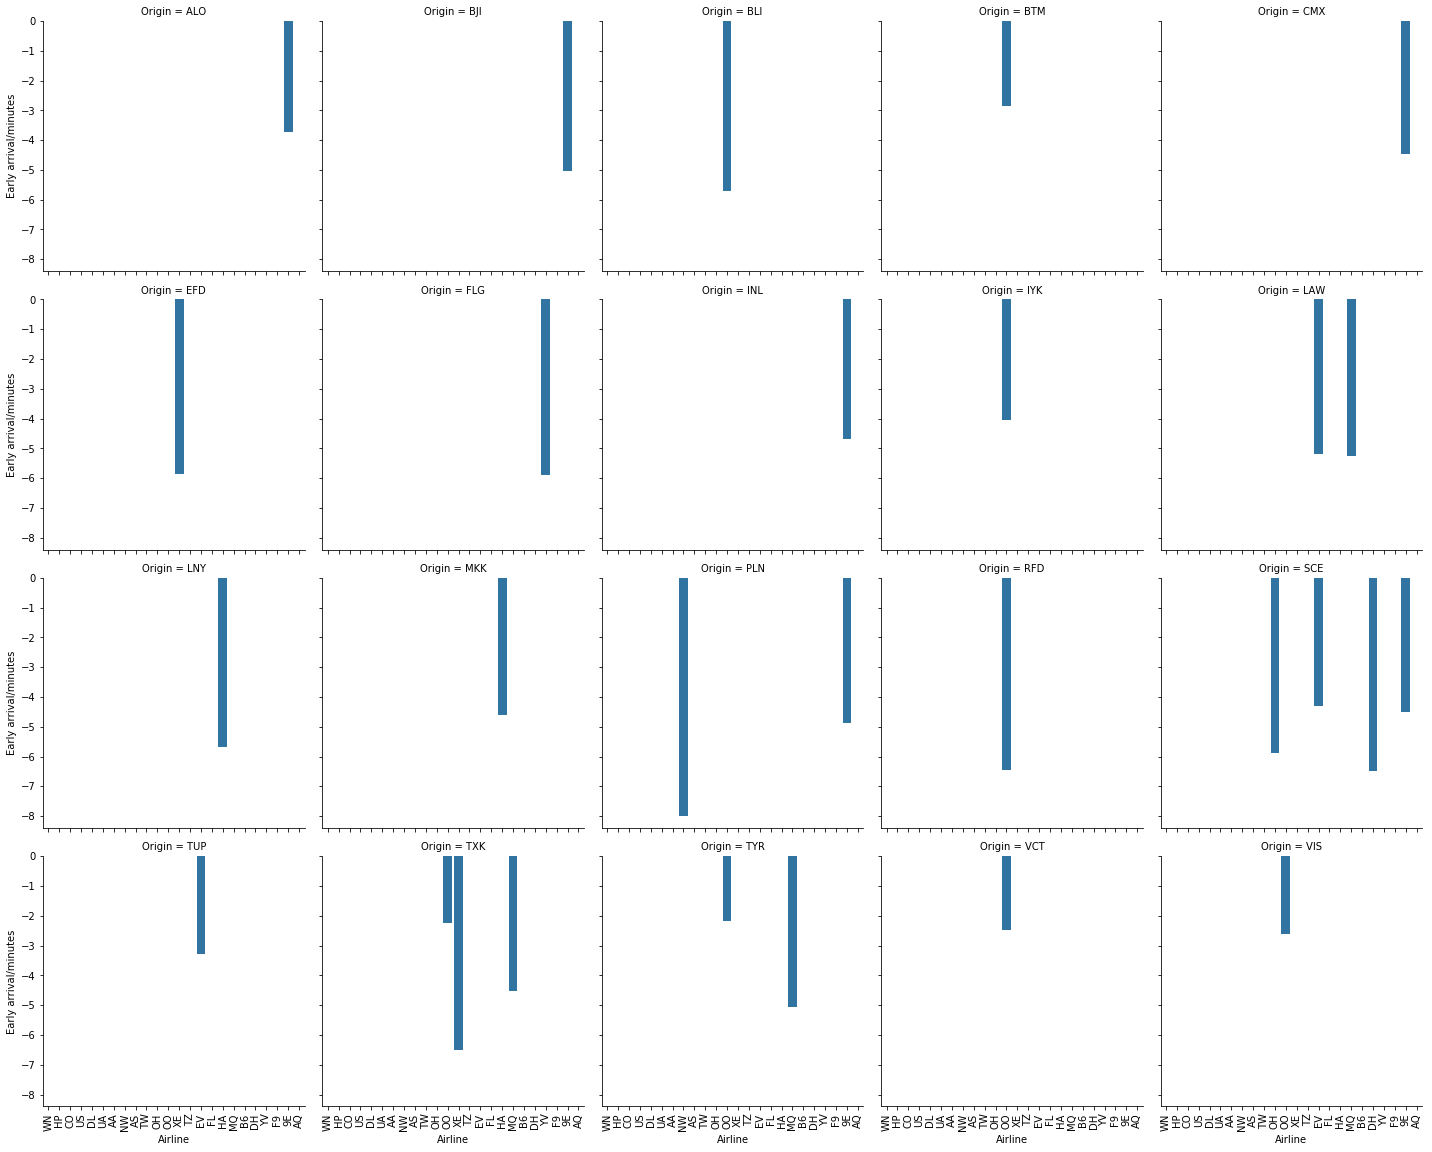

In [282]:
# create multi variate plot for ontime departures with smallest percentage of delays
g = sns.FacetGrid(data = df_prop1_lf_origin, col='Origin', size = 4, col_wrap=5)
g.map(sns.barplot, 'UniqueCarrier', 'InTime')
g.set_ylabels('Early arrival/minutes')
g.set_xlabels('Airline')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

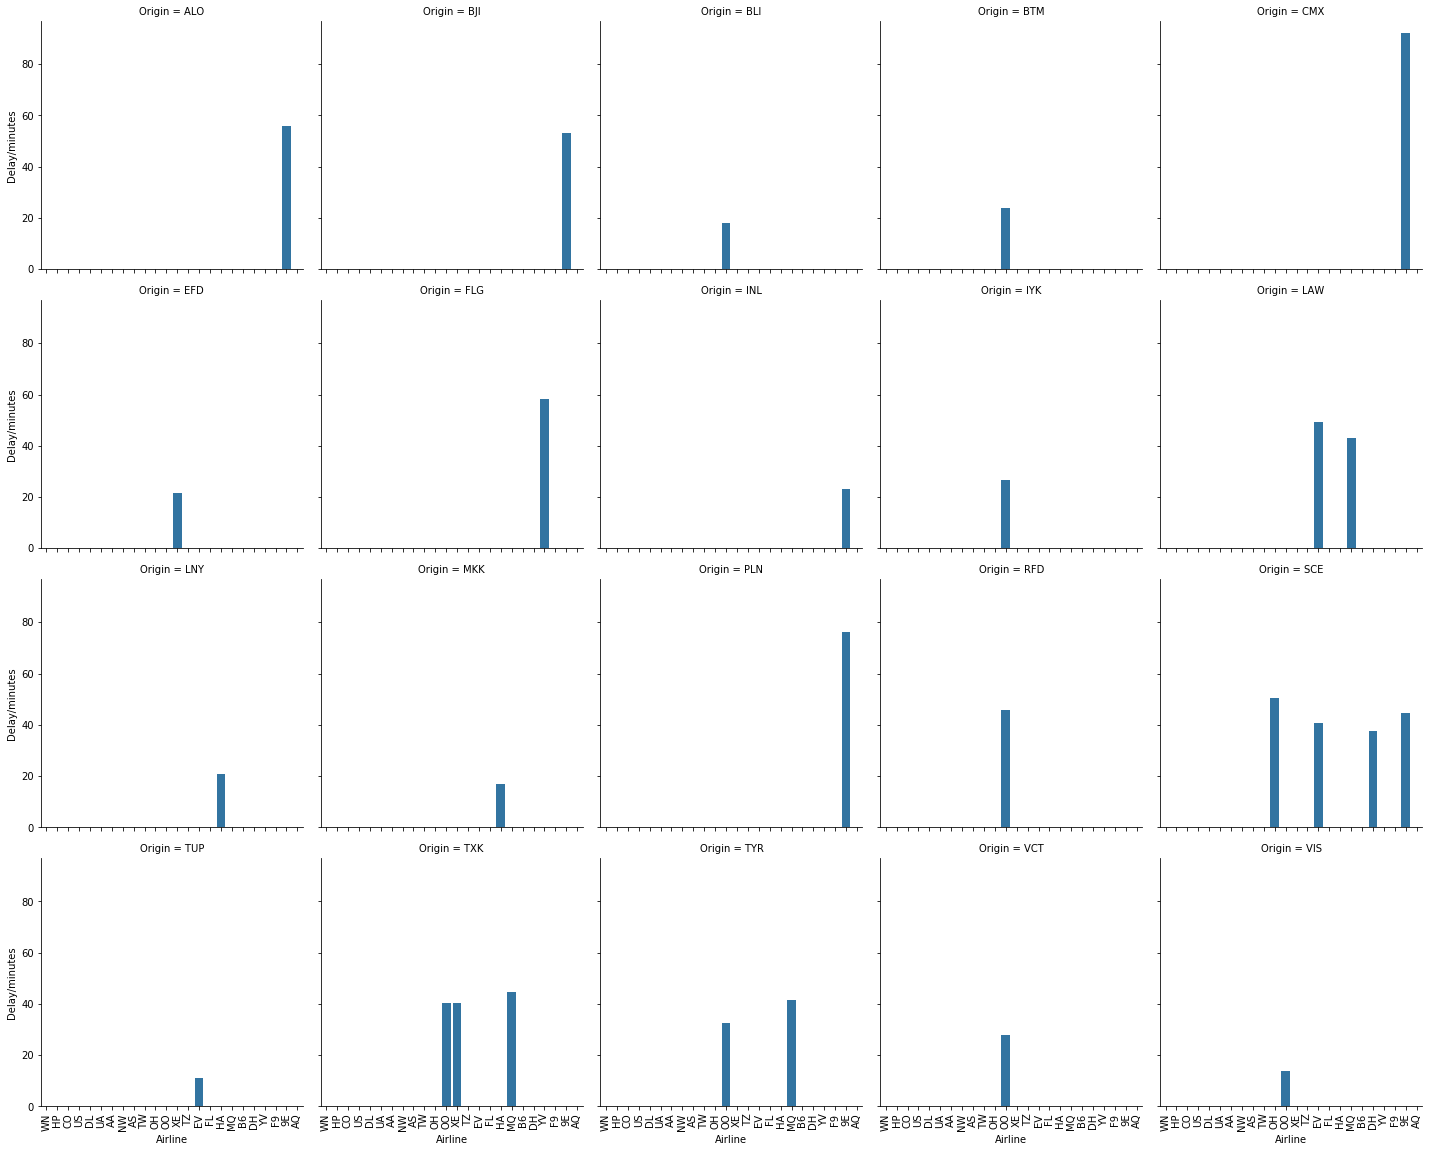

In [281]:
# create multi variate plot for delayed departures for airports with smallest percentage of delays
g = sns.FacetGrid(data = df_prop1_lf_origin, col='Origin', size = 4, col_wrap=5)
g.map(sns.barplot, 'UniqueCarrier', 'Delayed')
g.set_xlabels('Airline')
g.set_ylabels('Delay/minutes')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

**Discussion**

**Most of the airports with the highest departure delay percentage are small airports serving only single carriers. Also those airports with the smallest percentage of delays serve only single carriers. Single airlines do not differ in the mean times for on time flights. Also between airports the on time means are consitent within a small range. For delayed flights however times differ between airports. The mean departure delay times differ from around twenty to seventy minutes between airports. Also within single airports the mean delay times differ between airlines e.g. Chicago O Hare (ORD) between 20 and 70 minutes.**

### 33) Unique carrier - distance range - arrival delay

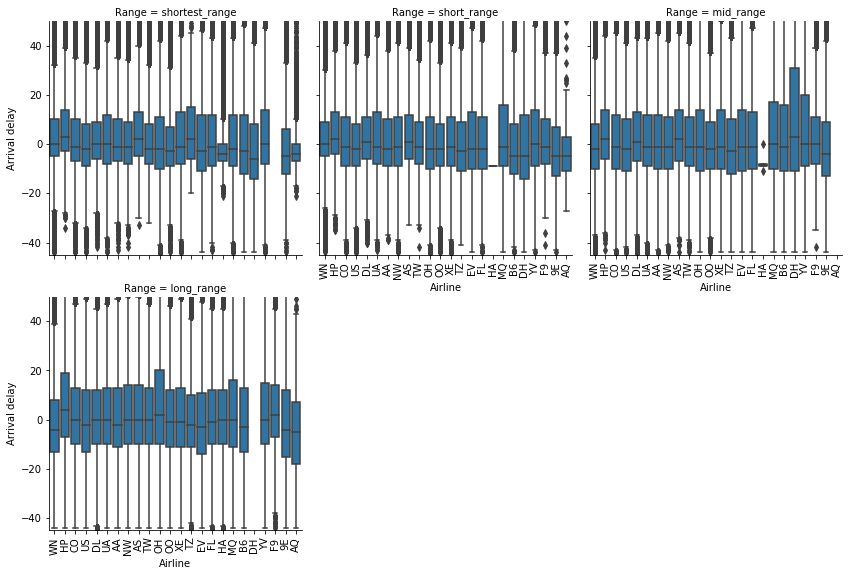

In [280]:
# create multivariate plot to show arrival delay data for single airlines for different flight distances
base_color = sns.color_palette()[0]
g = sns.FacetGrid(data = df_cct, col = 'Range', size = 4, col_wrap=3)
g.map(sns.boxplot, 'UniqueCarrier', 'ArrDelay', color=base_color)
g.set_ylabels('Arrival delay')
g.set_xlabels('Airline')
for ax in g.axes.flat:
    ax.set_ylim(-45, 50)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

**Discussion**

**For airlines managing delays well like Hawaian, Frontier or South West it can be seen that flights for shorter distances have a lower spread of delay times and delays for long term flights are more pronounced. Other Airlines like American Eagle(MQ) do not show a better performance for short distance flights.**

### 34) Unique carrier - flight frequency - arrival delay

In [270]:
# get mean arrival delay for single airlines
df_grouped_ucar_del = df_cct.groupby('UniqueCarrier')['ArrDelay'].mean()

In [271]:
# get number of flights for single airlines
df_grouped_ucar_count = df_cct.groupby('UniqueCarrier')['ArrDelay'].count()

In [272]:
# create data frame to join second variable
df_2 = pd.DataFrame(df_grouped_ucar_del)

In [273]:
# join data
df_group_master_2 = df_2.join(df_grouped_ucar_count, lsuffix='_', rsuffix='_NoOfFlights')

In [274]:
# reset index
df_group_master_2.reset_index(inplace=True)

In [275]:
# inspect data
df_group_master_2.head(1)

,UniqueCarrier,ArrDelay_,ArrDelay_NoOfFlights
0,WN,6.137036,2968831


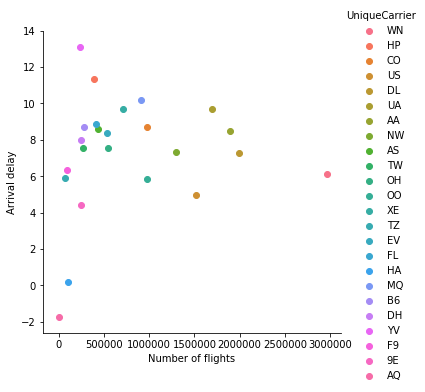

In [278]:
# create multi variate plot of arrival delay versus number of flights for single airlines
g = sns.FacetGrid(data = df_group_master_2, hue='UniqueCarrier', size = 5)
g.map(plt.scatter,  'ArrDelay_NoOfFlights', 'ArrDelay_')
g.set_ylabels('Arrival delay')
g.set_xlabels('Number of flights')
g.add_legend();

**Discussion**

**The number of flights does not influence the mean arrival delay. The biggest average delays are within airlines with just small flight frequencies. Mean average arrival delays are not incrasing with increasing flight frequencies.**

### 35) Unique carrier - delayed - arrival delay

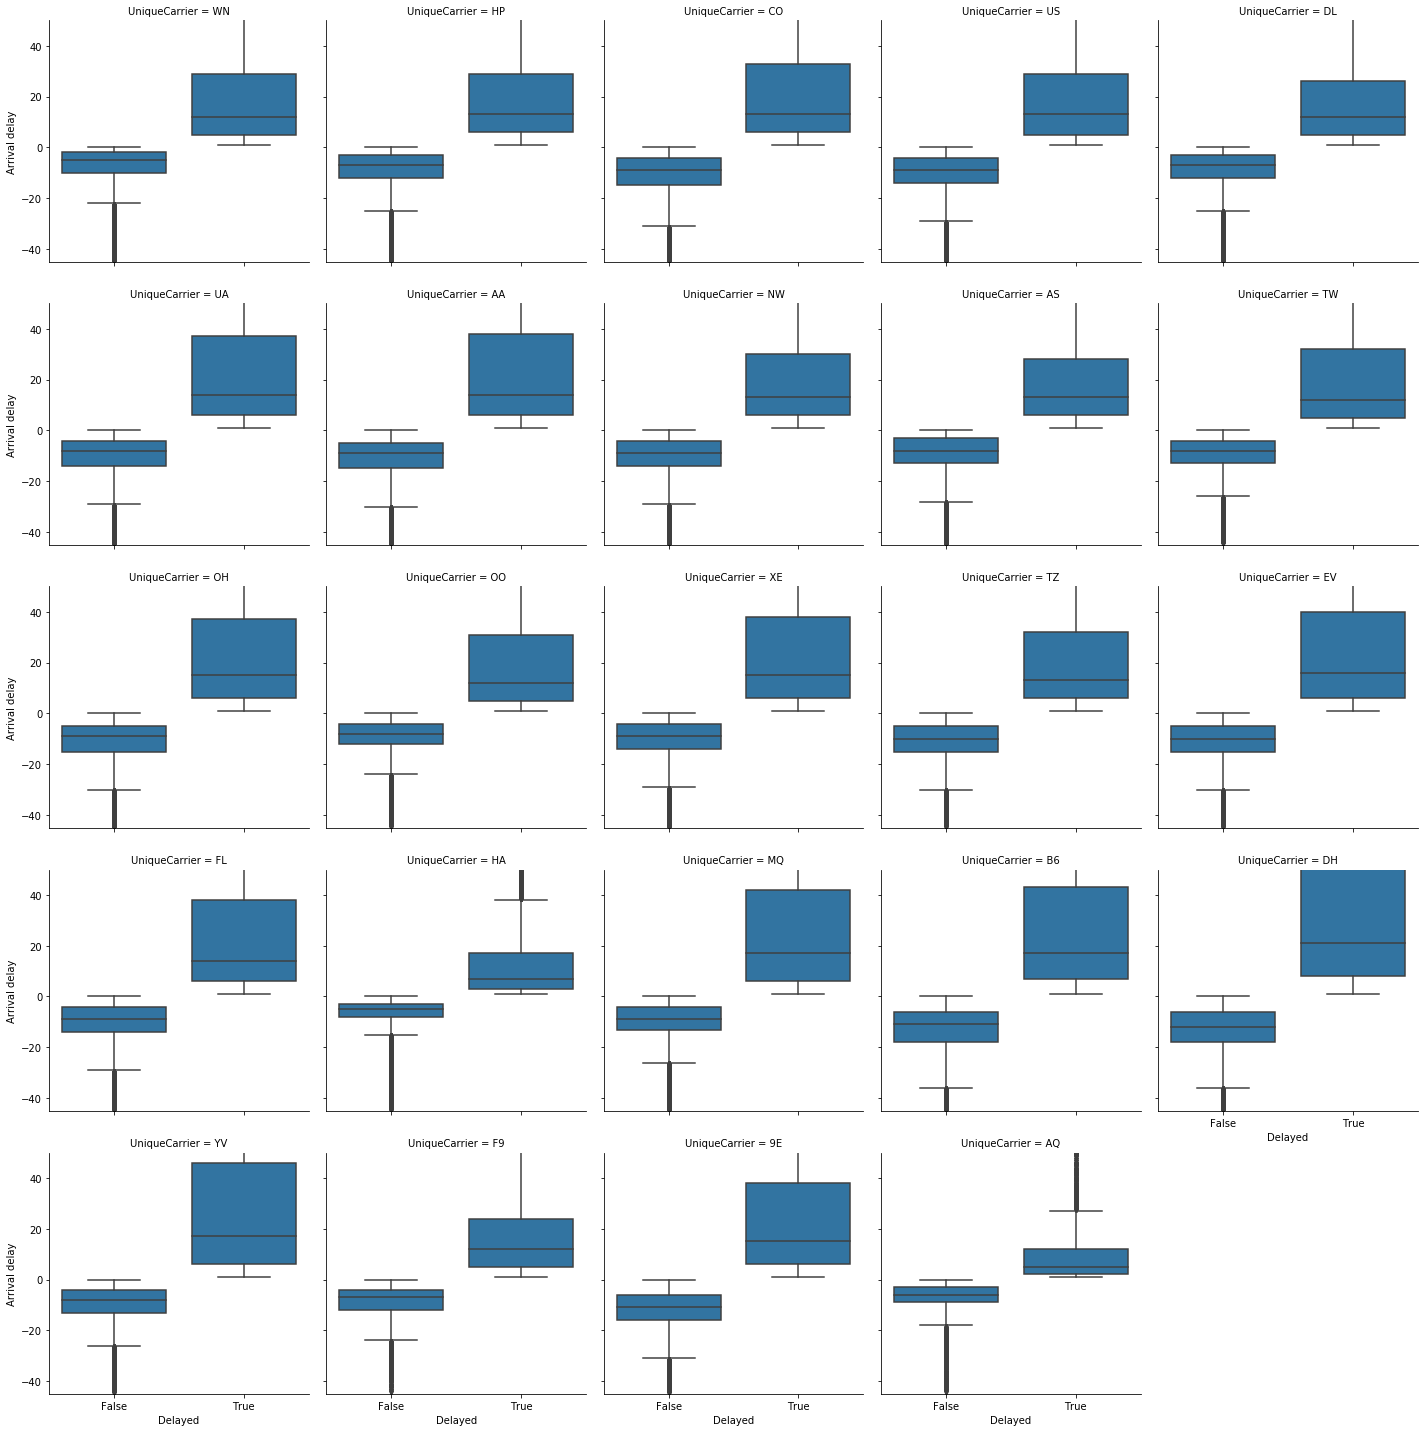

In [279]:
# create multi variate plot of arrival delay statistic for on time and delayed flights for unique carriers
g = sns.FacetGrid(data = df_cct, col = 'UniqueCarrier', size = 4, col_wrap=5)
g.map(sns.boxplot, 'Delayed', 'ArrDelay')
g.set_ylabels('Arrival delay')
for ax in g.axes.flat:
    ax.set_ylim(-45, 50);

**Discussion EDA**

**Insights into delay data**

**Flight frequencies differ a lot between airlines and airports. Flight frequencies do not differ a lot between weekdays and months. The causality columns for delays were introduced in 2003 therefore to compare these data only data from the years 2004 and 2008 were used. Only a fraction of the data with positive delays do have entries in the causality columns. The distributions in histogramms of different causalities are very similar. I am not sure whether this is believable as weather, late aircraft etc. to my opinion should have different distributions. Maybe airlines are not very eager to report exact data and all available data. Departure delays and arrival delays are highly correlated and the delay causalities columns show also a good correlation to arrival and departure delays. There are no relevant differences of delays between months or weekdays. Although there are no significant difference regarding delays for single airlines the plots show that some airlines seem to be better in managing their delays. Boxplots show that the spread of some airlines is much less than for others. Regarding departure and arrival delays for single airports I can tell that flight frequency of an airport is not correlated with delay. There are however huge differences in delay data (minutes) between airports with similar flight frequencies. For different distance ranges there are no relevant differences in delay data. Airlines differ in distance ranges they serve. For the 3 time periods I used (1998, 2004, 2008) time of delays do not differ very much. In 2008 however it seems that the spread of the delay data increased although the number of flights did not increase but decreased a little bit in comparison to 2004.Airlines have different box plot distributions regarding causality of delay data. Within the different causality data the pattern between airlines are very similar. Also here I am not sure if these are reliable data as I do not think that weather delay data and carrier delay data should show the same patterns between airlines but maybe this is due to the reporting system. So far I used only original data and there were only minor differences. When I started to manipulate the data to create new variables and to aggregate data differences started to show. Airlines for instance have a big spread in the percentage of their flights that are delayed. The difference is 2 fold although there is no big difference in time of delay. If we take the 15 minutes rule into account i.e. all flights up to 15 minutes are regarded as ontime then the percentage of delays is around 20 base points less than for the all flights with positive delay data. This is good for airline image. The reduction factor is around two. When I looked into the departure delay percentages of origin airports the interairport differences were enormous. 80% delays for the worst airport down to below 5% for the best airport. Upon looking into the 15 minutes rule we get a different picture than before. Some airports improve their statistic obviously and are not listed within the worst 20 and new airports show up in this category. The same holds true for the best 20 airports. When I look into the airports with the highest departure delay percentages I find among them lots of small airports serving only single carriers. This is however also true for the airports with the smallest delay percentages. The time of delay differs within these groups as much as between these groups meaning that a small percentage of delays is not associated with a shorter average delay. The difference between airports in the single groups differ between 20 and 70(and even 80 ) minutes. Within a single airport the mean time of flight delays differs also between 20 and 70 minutes for different airlines. For various distances some airlines seem to manage delay times for short distances better than others and in general a bigger spread can be seen for long distance flights. The flight frequency does not seem to be a predictor of average delay time as airlines with a low number of flights have on average a higher delay time than airlines with a high number of flights. For delayed flights there seems to be no relevant difference between airlines. However the chance  to have a delay of more than 40 minutes is lower for Hawaian and Aloha Airlines than for the other airlines.**

**What do I want to show in the slide show**

- Introduction to the data set
- Arrival delays
- Departure delays
- Arrival and departure delays by airline
- Percentage of delays by airline
- Distances served by airline
- Percentage of delays by airport
- Mean delays per carrier per airport
- Influence of 15 minutes rule on statistic for airlines

### Explanatory Visualizations

**Introduction to the data set**

- Arrival and departure delays records for the years 1998, 2004 and 2008
- US flights data
- Negative numbers are early departure or arrival
- 0 departure or arrival ontime
- Positive numbers delay in departure or arrival
- 15 minutes rule: departure or arrival within 15 minutes of schedule = ontime


**The first slide shows the distribution of the arrival delay data of U/S flights. 50 % of the data left of the red line. 75 % of the data left of yellow line. Around 80 % of flights are regarded as in time according to 15 minutes rule. 20 % are delayed with sometimes very high delays.**

In [315]:
df_cct['ArrDelay'].describe()

count    1.883095e+07
mean     7.684761e+00
std      3.485524e+01
min     -4.400000e+01
25%     -9.000000e+00
50%     -1.000000e+00
75%      1.100000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [316]:
cbrt_trans(df_cct['ArrDelay'].describe())

count    266.046424
mean       1.973377
std        3.266551
min       -3.530348
25%       -2.080084
50%       -1.000000
75%        2.223980
max       13.501143
Name: ArrDelay, dtype: float64

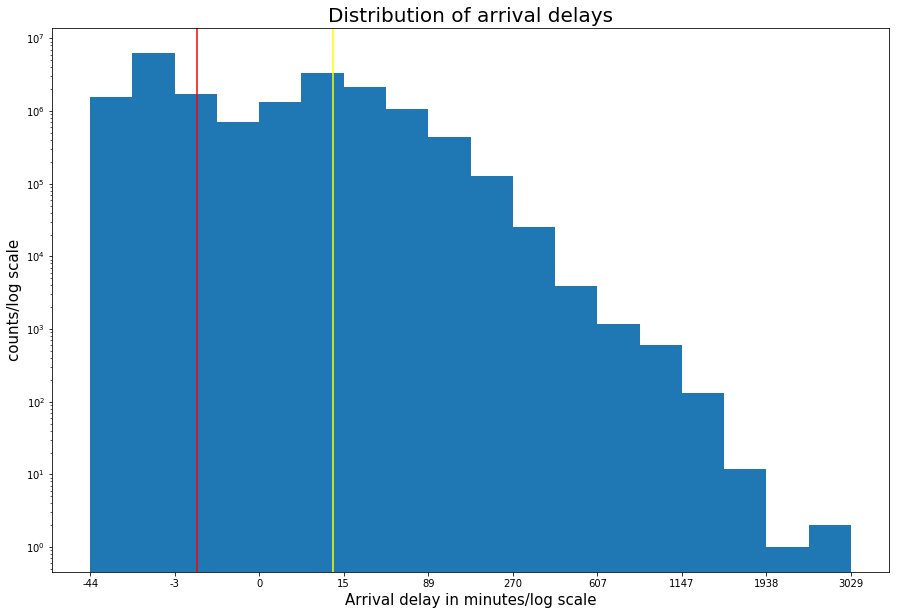

In [317]:
# create histogram to show distribution of arrival delays
plt.figure(figsize=[15, 10])
bin_edges = np.arange(cbrt_trans(df_cct['ArrDelay'].min()),cbrt_trans(df_cct['ArrDelay'].max())+1, 1)
plt.hist(df_cct['ArrDelay'].apply(cbrt_trans), bins=bin_edges)
tic_locs = np.arange(cbrt_trans(df_cct['ArrDelay'].min()), cbrt_trans(df_cct['ArrDelay'].max())+2, 2)
plt.xticks(tic_locs, cbrt_trans(tic_locs, inverse=True).astype(int))
plt.yscale('log')
plt.ylabel('counts/log scale', fontsize=15)
plt.xlabel('Arrival delay in minutes/log scale', fontsize=15)
plt.title('Distribution of arrival delays', fontsize=20)
plt.axvline(x=-1, color='red')
plt.axvline(x=2.22, color='yellow');

**The next slide shows the distribution of departure delay data for U/S flights. 50 % of the data left of the red line. 75 % of the data left of the yellow line. Also for departure delays the majority of the flights is on time.
Departure delay data and arrival delay data have an correlation coefficient of 0.91 and are therefore highly correlated and can be used interchangeably for conveying messages about delay data.**

In [318]:
df_cct['DepDelay'].describe()

count    1.883095e+07
mean     9.153001e+00
std      3.167764e+01
min     -1.000000e+01
25%     -3.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      2.467000e+03
Name: DepDelay, dtype: float64

In [319]:
cbrt_trans(df_cct['DepDelay'].describe())

count    266.046424
mean       2.091805
std        3.164105
min       -2.154435
25%       -1.442250
50%        0.000000
75%        1.912931
max       13.512106
Name: DepDelay, dtype: float64

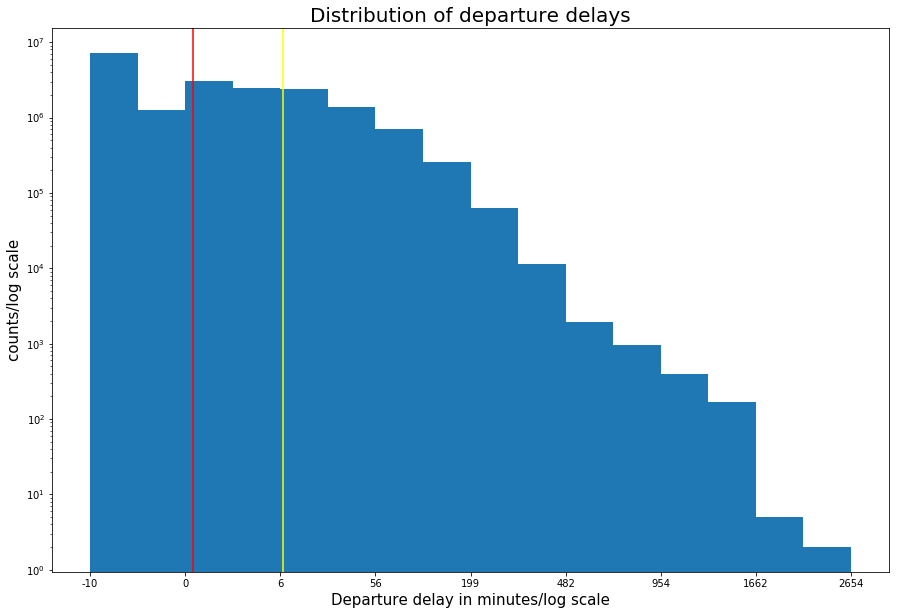

In [320]:
# create histogram to show distribution of departure delays
plt.figure(figsize=[15,10])
bin_edges = np.arange(cbrt_trans(df_cct['DepDelay'].min()),cbrt_trans(df_cct['DepDelay'].max())+1, 1)
plt.hist(df_cct['DepDelay'].apply(cbrt_trans), bins=bin_edges)
tic_locs = np.arange(cbrt_trans(df_cct['DepDelay'].min()), cbrt_trans(df_cct['DepDelay'].max())+2, 2)
plt.xticks(tic_locs, cbrt_trans(tic_locs, inverse=True).astype(int))
plt.ylabel('counts/log scale', fontsize=15)
plt.xlabel('Departure delay in minutes/log scale', fontsize=15)
plt.title('Distribution of departure delays', fontsize=20)
plt.yscale('log')
plt.axvline(x=0, color='red')
plt.axvline(x=1.91, color='yellow');

**Are there differences between airlines? The next slide shows that there are no major differences between delay times of airlines. Spread is huge. Some airlines seem to manage delays more consistent than others. Only important airlines are labeled.**

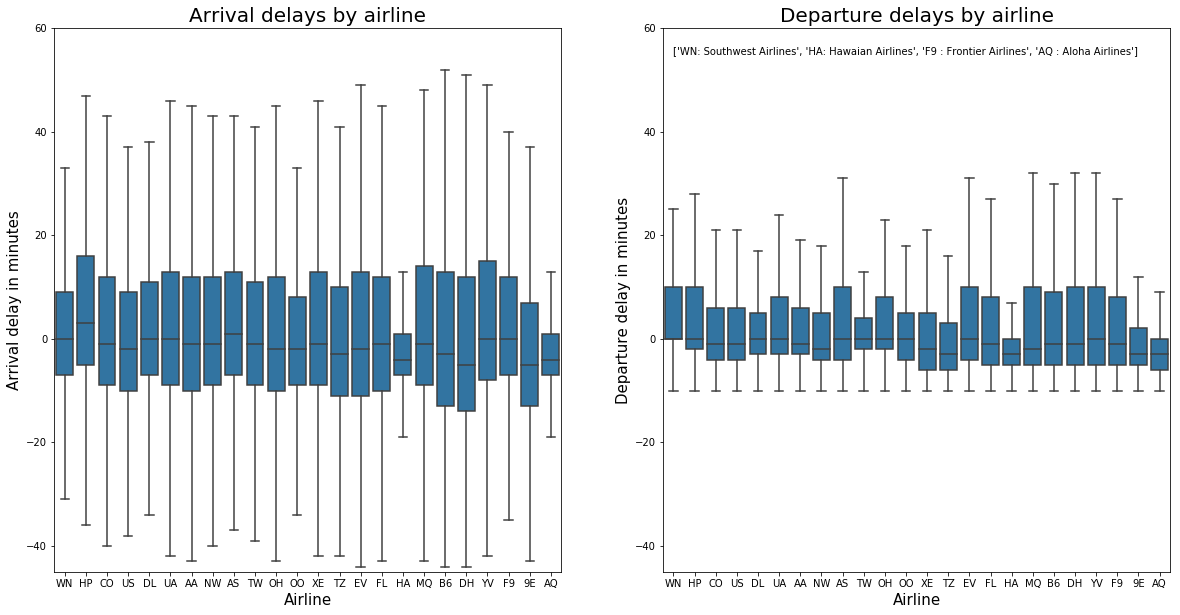

In [321]:
# create boxplot to show differences between arrival and departure delays for airlines
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1,2,1)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='ArrDelay', color=base_color, showfliers=False)
plt.ylabel('Arrival delay in minutes', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.title('Arrival delays by airline', fontsize=20)
plt.ylim(-45, 60)
plt.subplot(1,2,2)
sns.boxplot(data=df_cct, x='UniqueCarrier', y='DepDelay', color=base_color, showfliers=False)
plt.ylabel('Departure delay in minutes', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.title('Departure delays by airline', fontsize=20)
plt.ylim(-45, 60)
plt.text(x=0, y=55,s=['WN: Southwest Airlines', 'HA: Hawaian Airlines', 'F9 : Frontier Airlines', 'AQ : Aloha Airlines']);


**Does this mean that all airlines are equal? Not quite the next slide shows the difference in the percentage of delayed flights. This means that there are differences in the probability that one is delayed with a specific airline between 27 and 57%. But once you are delayed the time of delay does not differ between airlines. Only relevant airlines are listed.**

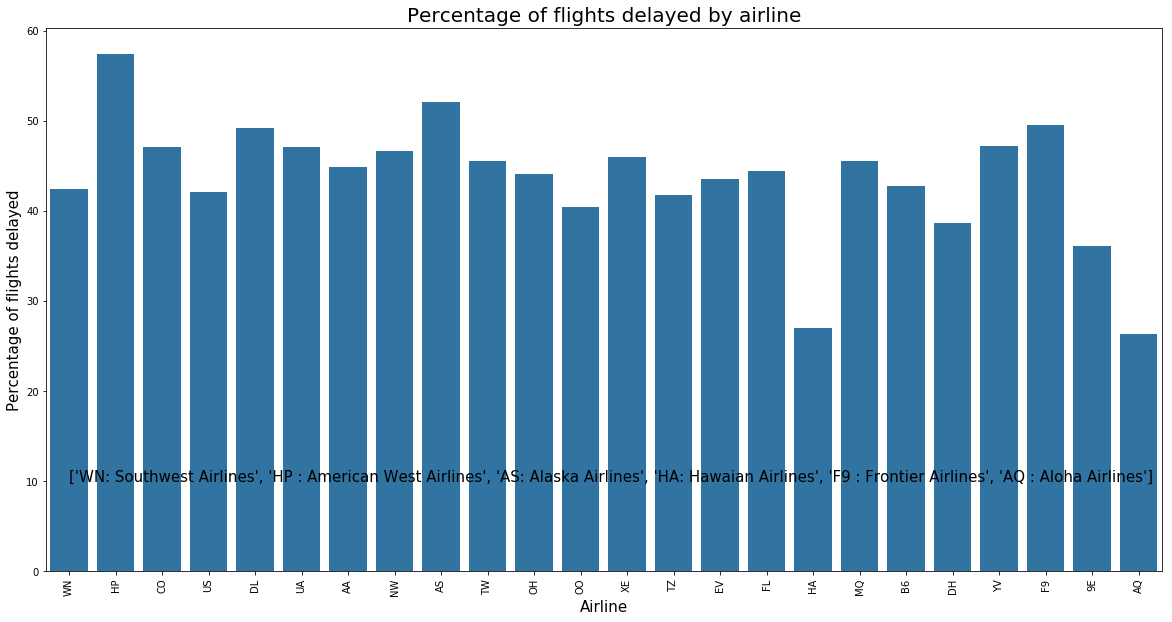

In [322]:
# create barplot to show differences in percentages of flight delays
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.barplot(data=df_prop, x='UniqueCarrier', y='PercDelay',color=base_color );
plt.ylabel('Percentage of flights delayed', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.title('Percentage of flights delayed by airline', fontsize=20)
plt.xticks(rotation=90)
plt.text(x=0, y=10,s=['WN: Southwest Airlines','HP : American West Airlines', 'AS: Alaska Airlines', 'HA: Hawaian Airlines', 'F9 : Frontier Airlines', 'AQ : Aloha Airlines'], fontsize=15);

**Does the distribution of distances served maybe play a role for the delayed flights? Distance was not correlated with arrival delay and departure delay in the original data. Also here the percentage of flights delayed does not correlate with the percentage of delays as can be seen for e.g. American West Airline and Frontier Airline**

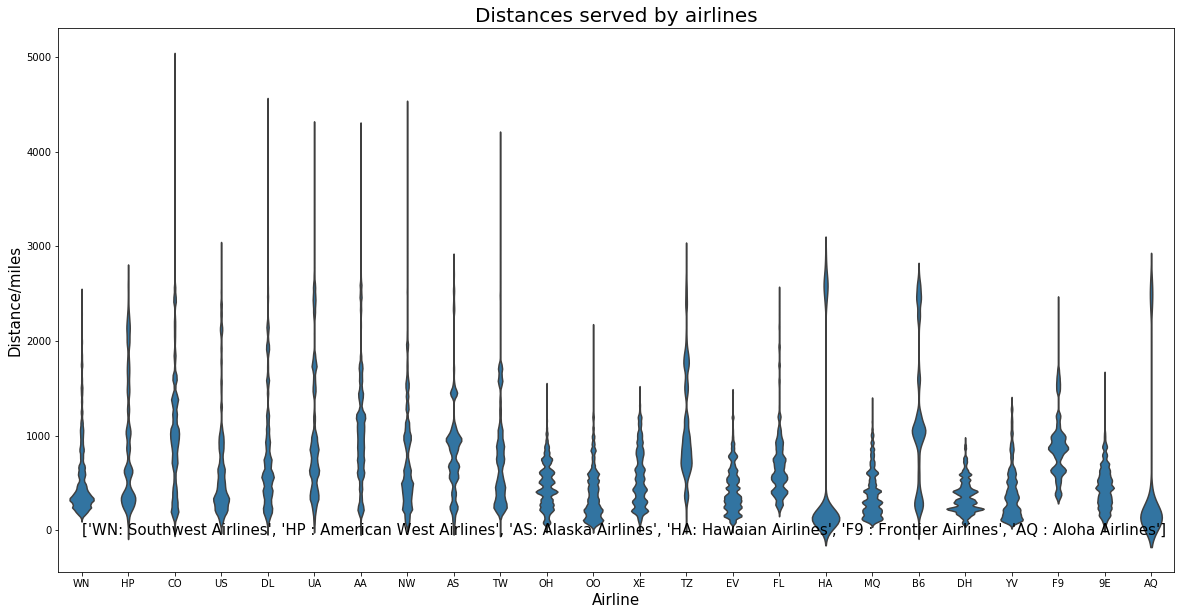

In [326]:
# create violinplot to show distance distribution
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.violinplot(data=df_cct, x='UniqueCarrier', y='Distance', inner=None, color=base_color)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Distance/miles', fontsize=15)
plt.title('Distances served by airlines', fontsize=20)
plt.text(x=0, y=-50,s=['WN: Southwest Airlines','HP : American West Airlines', 'AS: Alaska Airlines', 'HA: Hawaian Airlines', 'F9 : Frontier Airlines', 'AQ : Aloha Airlines'], fontsize=15);

**Now what about airports? The next slide shows the percentage of delays of the 20 airports with the most delays. So you have to choose the airport and the airline wisely if you have a chance to do so.**

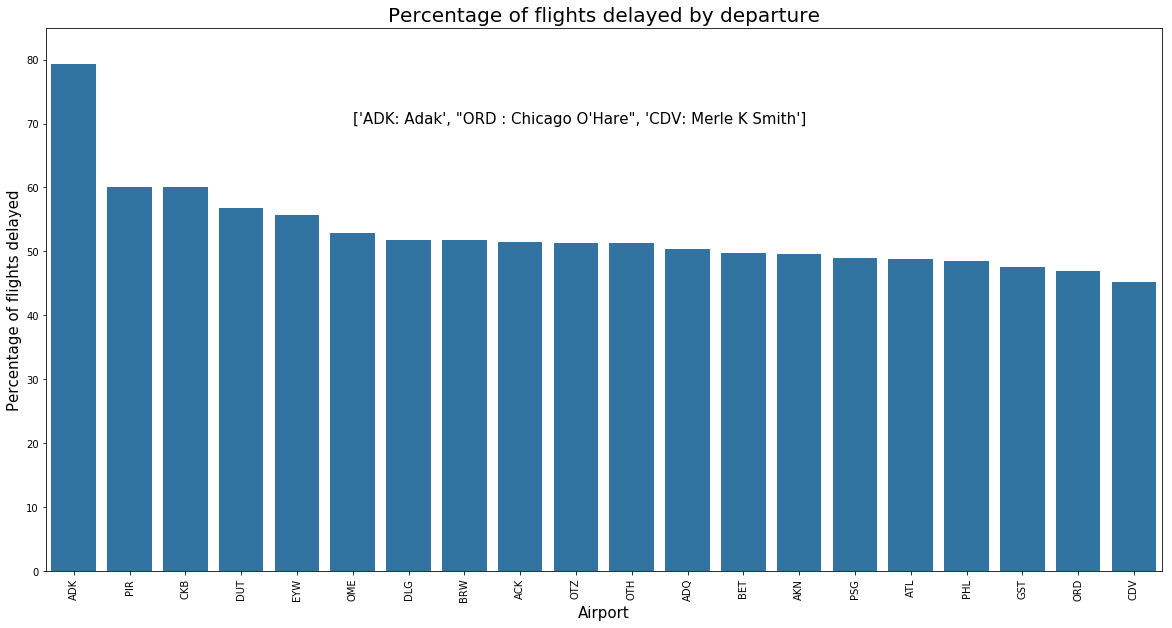

In [327]:
# create barplot to show differences in percentage of departure delays for airports
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
sns.barplot(data=df_prop_dep[:20], x='Origin', y='PercDelay', color=base_color);
plt.ylabel('Percentage of flights delayed', fontsize=15)
plt.xlabel('Airport', fontsize=15)
plt.title('Percentage of flights delayed by departure', fontsize=20)
plt.xticks(rotation=90)
plt.ylim(0, 85)
plt.text(x=5, y=70,s=['ADK: Adak',"ORD : Chicago O'Hare", 'CDV: Merle K Smith'], fontsize=15);

**Do airports with high frequency of delays differ in their average delay time? And do airlines in those airports have all the same delay times? Airports differ in the average delay times from 20 to 70 minutes. And even within airports different airlines have different average delay times. Also remarkable is that small airports often serving only 1 airline have a high share in the top 20 airports regarding percentage of delays.**

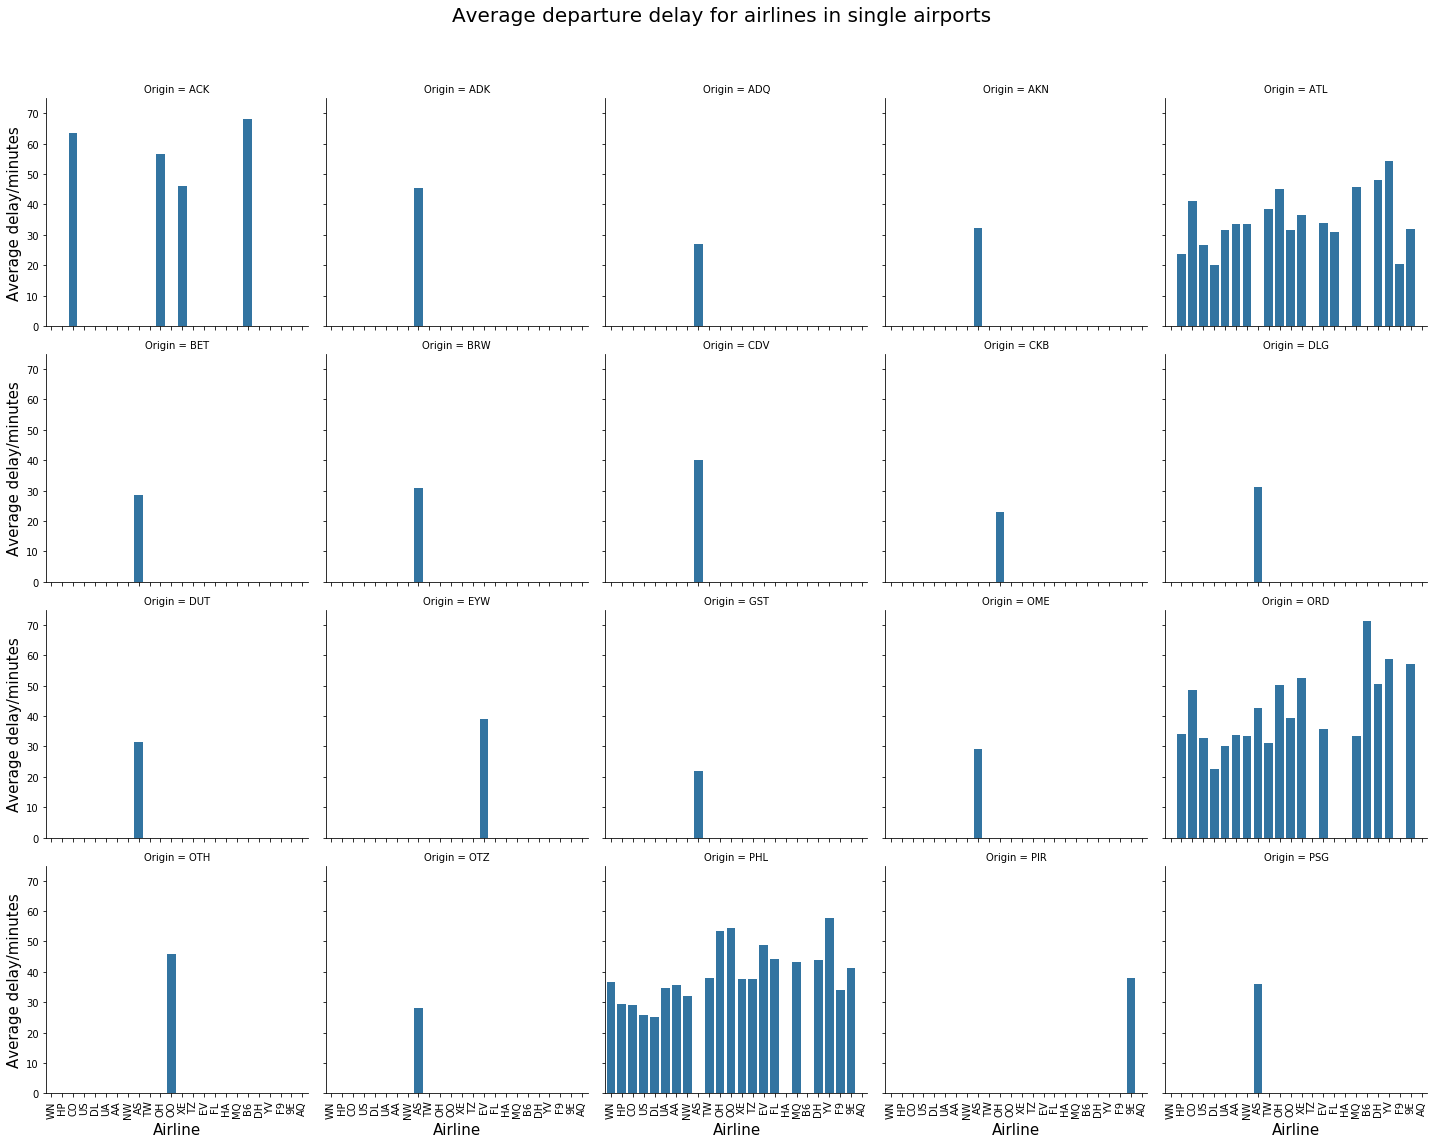

In [328]:
# create barplots to show delay differences of airlines in different airports
g = sns.FacetGrid(data = df_prop1_hf_origin, col='Origin', size = 4, col_wrap=5)
g.map(sns.barplot, 'UniqueCarrier', 'Delayed')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average departure delay for airlines in single airports', fontsize=20)
g.set_ylabels('Average delay/minutes', fontsize=15)
g.set_xlabels('Airline', fontsize=15)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);



**Is a delay a delay? Not quite in aviation. If you consider a delay as an event of leaving or arriving after the scheduled time regardless of the amount of time you have a lot of delays. In aviation however a delay is counted as a delay not until the delay is more than 15 minutes. This is the way airlines can claim 80% punctuallity. This neat little trick lowers the percentage of delayed flights by around 20 base points.**

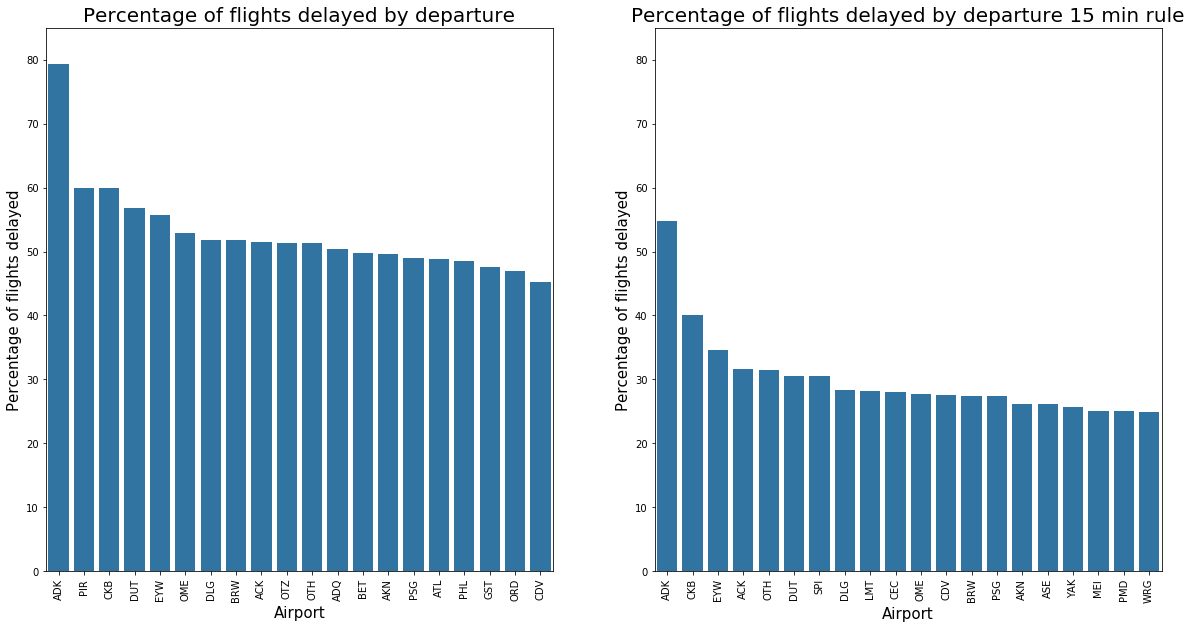

In [329]:
# create barplot to show the difference between normal delay and 15 minutes rule
plt.figure(figsize=[20, 10])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
sns.barplot(data=df_prop_dep[:20], x='Origin', y='PercDelay', color=base_color);
plt.ylabel('Percentage of flights delayed', fontsize=15)
plt.xlabel('Airport', fontsize=15)
plt.title('Percentage of flights delayed by departure', fontsize=20)
plt.xticks(rotation=90)
plt.ylim(0, 85);
plt.subplot(1, 2, 2)
sns.barplot(data=df_prop_dep_15[1:21], x='Origin', y='PercDelay', color=base_color);
plt.ylabel('Percentage of flights delayed', fontsize=15)
plt.xlabel('Airport', fontsize=15)
plt.title('Percentage of flights delayed by departure 15 min rule', fontsize=20)
plt.xticks(rotation=90)
plt.ylim(0, 85);


**Where to go from here**

**I did not do in depth analysis of reasons for delays. Why there is a similar value distribution for all of the different  reasons for delays and why single airlines show a similar pattern for all of the delay reasons is intuitively not clear for me. I would expect a more uniform distribution of weather delays for airlines or at least statistics that are not synchronized with the statistics for late aircraft delay, carrier delay etc..I did not explore were the PUB airport suddenly appeared from etc.. Furthermore I did not dig deeper for many of the variables which I also could have used for multivariate analyses but I do think the scope of the project is fulfilled with the available data.**